## Notebook para el análisis explotario de datos de vuelos

&nbsp;&nbsp;<font size="4" color="blue">Para ejecutar el notebook seguir los siguientes pasos:</font><br><br>
&nbsp;&nbsp;1- <b>Ejecutar únicamente las dos celdas a continuación</b><br>
&nbsp;&nbsp;2- Pulsar el botón generado <font color="red">"Run initial operations"</font><br>
&nbsp;&nbsp;3- Seleccionar los valores deseados<br>
&nbsp;&nbsp;4- Pulsar el botón <font  color="red">"Run all operations"</font><br>

In [ ]:
#Para instalar ipywidgets hay que ejecutar el siguiente comando en el terminal:
#!pip install ipywidgets

In [9]:
from IPython.display import Javascript, display
from ipywidgets import widgets

#Creamos un botón con el cual empezarán a ejecutarse las operaciones iniciales del notebook
def run_init(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, 10)'))

button_init = widgets.Button(description="Run initial operations")
button_init.on_click(run_init)
display(button_init)

Button(description='Run initial operations', style=ButtonStyle())

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import numpy as np


import seaborn as sns

## Apertura de ficheros

In [3]:
#Definimos la variable ruta donde estarán los datasets a analizar
ruta = "/Users/moncholv/Documents/Proyecto AIr/datasets/On-timedata/renombrados/"


In [4]:
#Creamos un combo con el que elegir el año a analizar de los que disponemos de datos 1996-2018
dd = widgets.Dropdown(
    options = list(map(str, range(1996,2019))), 
    value = '1996',
    description = '* Year:',
)

dd.layout.width = '155px'
display(dd)

Dropdown(description='* Year:', layout=Layout(width='155px'), options=('1996', '1997', '1998', '1999', '2000',…

In [5]:
#Creamos un checkbox para indicar si en la ejecución queremos generar los ficheros una vez tratados los datos
cb = widgets.Checkbox(
    value=False,
    description='Generate processed files',
    disabled=False
)
display(cb)

Checkbox(value=False, description='Generate processed files')

In [6]:
#Creamos un botón con el cual empezarán a ejecutarse el resto de operaciones
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Run all operations")
button.on_click(run_all)
display(button)

Button(description='Run all operations', style=ButtonStyle())

In [7]:
load_progress = widgets.IntProgress(
    value=0,
    min=0,
    max=13,
    step=1,
    description='Loading...',
    bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

In [8]:
#Cargamos todos los ficheros del año (mes a mes)
year = dd.value
dataframes = []
i = 1

display(load_progress)

for file in os.listdir(ruta + year):
    if file.endswith(".csv"):
        load_progress.value = i
        print("Reading file " + file)
        datos_vuelos = pd.read_csv(os.path.join(ruta + year, file), 
                                   encoding="ISO-8859-1", 
                                   low_memory=False, 
                                   error_bad_lines=False, 
                                   dtype={'CancellationCode': str})
        
        i = i + 1
        dataframes.append(datos_vuelos)

load_progress.value = i + 1
print()
print("All files loaded <--")

dataframes= sorted(dataframes, key=lambda x:x["Month"].max(axis=0))

#concatenamos todos para tener un DF anual
dfanual = pd.concat(dataframes)

IntProgress(value=0, bar_style='info', description='Loading...', max=13)

Reading file 2017-08.csv
Reading file 2017-09.csv
Reading file 2017-01.csv
Reading file 2017-02.csv
Reading file 2017-03.csv
Reading file 2017-07.csv
Reading file 2017-06.csv
Reading file 2017-12.csv
Reading file 2017-04.csv
Reading file 2017-10.csv
Reading file 2017-11.csv
Reading file 2017-05.csv

All files loaded <--


In [9]:
dataframes[0].head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2017        1      1           1          7  2017-01-01                AA   
1  2017        1      1           2          1  2017-01-02                AA   
2  2017        1      1           3          2  2017-01-03                AA   
3  2017        1      1           4          3  2017-01-04                AA   
4  2017        1      1           5          4  2017-01-05                AA   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     19805                          AA      N787AA  ...   
1                     19805                          AA      N788AA  ...   
2                     19805                          AA      N783AA  ...   
3                     19805                          AA      N799AA  ...   
4                     19805                          AA      N788AA  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  

[5 rows x 110 columns]

In [10]:
#Miramos el tamaño del total
dfanual.shape

(5674621, 110)

In [11]:
#Miramos el tamaño de cada mes
for df in dataframes:
    print(df["Month"][1],df.shape)

1 (450017, 110)
2 (410517, 110)
3 (488597, 110)
4 (468329, 110)
5 (486483, 110)
6 (494266, 110)
7 (509070, 110)
8 (510451, 110)
9 (458727, 110)
10 (479797, 110)
11 (454162, 110)
12 (464205, 110)


## 1. Análisis Exploratorio

## 1.1 Aerolíneas

In [12]:
#para sacar las compañías que operan
#Cogemos las que hay en el primer mes y en el concatenado. Si son las mismas, tiramos. 
#Si no, miramos a ver en qué mes cambió
aerolineas_01 = dataframes[0]['IATA_CODE_Reporting_Airline'].unique()
aerolineas_anual = dfanual['IATA_CODE_Reporting_Airline'].unique()

if aerolineas_01.all() == aerolineas_anual.all():
    print(aerolineas_anual)
else:
    print(aerolineas_01)
    print(aerolineas_anual)

['AA' 'AS' 'B6' 'DL' 'EV' 'F9' 'HA' 'NK' 'OO' 'UA' 'VX' 'WN']


In [13]:

dfanual['Reporting_Airline'].unique()

array(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'UA', 'VX',
       'WN'], dtype=object)

## 1.2 Vuelos, aeropuertos y rutas.

## 1.2.1 Vuelos

In [14]:
#en teoría son números de vuelos único, pero no es verdad, parece que comparten numeración así que luego concatenaremos
len(dfanual['Flight_Number_Reporting_Airline'].unique())

7076

In [15]:
#hago el número de vuelo como es de verdad, concatenando código de compañía y vuelo
dfanual['Flight_Code'] = dfanual['IATA_CODE_Reporting_Airline'] + dfanual['Flight_Number_Reporting_Airline'].astype(str)

In [16]:
#Sacamos el número real de vuelos diferentes que hay
len((dfanual['Flight_Code']).unique())

22661

In [17]:
#códigos únicos de vuelos por mes
for df in dataframes:
    df['Flight_Code'] = df['IATA_CODE_Reporting_Airline'] + df['Flight_Number_Reporting_Airline'].astype(str)
    print(df["Month"][1],len((df['Flight_Code']).unique()))

1 17631
2 17949
3 18269
4 18041
5 17200
6 17970
7 17754
8 18537
9 17810
10 17584
11 19485
12 18756


## 1.2.1 Aeropuertos

In [18]:
#para sacar los aeropuertos hacemos como con las compañías
#Cogemos las que hay en el primer mes y en el concatenado. Si son los mismos, tiramos. Si no, miramos a ver en qué mes cambió
aeropuertos_01 = dataframes[0]['Origin'].unique()
aeropuertos_anual = dfanual['Origin'].unique()

if aeropuertos_01.all() == aeropuertos_anual.all():
    print(aeropuertos_anual)
else:
    print(aeropuertos_01)
    print(aeropuertos_anual)

['JFK' 'LAX' 'DFW' 'OKC' 'OGG' 'HNL' 'SFO' 'MIA' 'ORD' 'IAH' 'BOS' 'DTW'
 'SEA' 'MSP' 'STL' 'MCO' 'KOA' 'LAS' 'MEM' 'PDX' 'DCA' 'SAN' 'TUS' 'CLT'
 'SJC' 'PHX' 'SNA' 'LGA' 'ATL' 'COS' 'RDU' 'AUS' 'PHL' 'MCI' 'LIH' 'DEN'
 'SJU' 'ORF' 'FLL' 'PBI' 'EWR' 'ONT' 'IND' 'SAT' 'IAD' 'STT' 'BWI' 'SMF'
 'DSM' 'EGE' 'DAY' 'SLC' 'TPA' 'BNA' 'BDL' 'FAT' 'MFE' 'RSW' 'RNO' 'SDF'
 'PIT' 'TUL' 'MSY' 'ABQ' 'RIC' 'BUF' 'CHS' 'PVD' 'ROC' 'JAX' 'ALB' 'PWM'
 'CLE' 'SYR' 'OAK' 'ILM' 'MDT' 'STX' 'FAI' 'ANC' 'OME' 'OTZ' 'JNU' 'PSP'
 'BUR' 'BLI' 'GEG' 'OMA' 'ADQ' 'BET' 'BRW' 'SCC' 'KTN' 'CDV' 'YAK' 'SIT'
 'WRG' 'PSG' 'ADK' 'LGB' 'HPN' 'SWF' 'DAB' 'HOU' 'PSE' 'HSV' 'BZN' 'LEX'
 'CMH' 'SRQ' 'CVG' 'ICT' 'MKE' 'LIT' 'VPS' 'JAC' 'CHA' 'MSN' 'EVV' 'FSD'
 'MTJ' 'BIL' 'EYW' 'TYS' 'BHM' 'GSO' 'GNV' 'GRR' 'ECP' 'CID' 'TVC' 'MDW'
 'FNT' 'CAE' 'MYR' 'PNS' 'CAK' 'CHO' 'GSP' 'GPT' 'FAR' 'DAL' 'HDN' 'ROA'
 'FAY' 'ATW' 'TLH' 'SAV' 'MHT' 'AVP' 'MSO' 'LFT' 'BIS' 'SGF' 'ELP' 'JAN'
 'MLB' 'AVL' 'XNA' 'BOI' 'BTR' 'MOB' 'AGS' 'PHF' 'T

In [19]:
#número de aeropuertos únicos en origen
len(aeropuertos_anual)

320

In [20]:
#número de aeropuertos únicos en destino
len(dfanual['Dest'].unique())

320

In [21]:
#CÓDIGOS DE AEROPUERTOS ÚNICOS DE DESTINO
dfanual['Dest'].unique()

array(['LAX', 'JFK', 'HNL', 'DFW', 'OGG', 'SFO', 'MIA', 'LAS', 'BOS',
       'MCO', 'ORD', 'DTW', 'SEA', 'STL', 'DCA', 'TPA', 'KOA', 'MEM',
       'DEN', 'PDX', 'LGA', 'SLC', 'SAN', 'IAH', 'CLT', 'SJC', 'PHX',
       'EWR', 'IAD', 'RDU', 'AUS', 'SAT', 'BWI', 'PHL', 'ATL', 'MSP',
       'LIH', 'ORF', 'TUL', 'BNA', 'PBI', 'ELP', 'SJU', 'STT', 'SNA',
       'MCI', 'IND', 'TUS', 'BDL', 'RSW', 'DAY', 'MSY', 'RNO', 'MFE',
       'SMF', 'FLL', 'MKE', 'ONT', 'SDF', 'PIT', 'RIC', 'ROC', 'CLE',
       'BUF', 'PVD', 'JAX', 'ALB', 'ILM', 'CHS', 'STX', 'ANC', 'FAI',
       'OME', 'OTZ', 'JNU', 'PSP', 'OAK', 'BUR', 'GEG', 'BLI', 'OMA',
       'ABQ', 'BET', 'ADQ', 'SCC', 'BRW', 'YAK', 'CDV', 'SIT', 'KTN',
       'WRG', 'PSG', 'ADK', 'LGB', 'PWM', 'SYR', 'DAB', 'HPN', 'SWF',
       'HOU', 'PSE', 'SRQ', 'LEX', 'GSO', 'ICT', 'MDW', 'MDT', 'OKC',
       'VPS', 'FAR', 'JAN', 'CVG', 'ATW', 'LFT', 'XNA', 'EVV', 'TYS',
       'MTJ', 'LIT', 'SGF', 'EYW', 'JAC', 'PNS', 'GNV', 'GRR', 'ECP',
       'BZN', 'HSV',

## 1.2.3 Rutas

In [22]:
#ahora miramos las rutas que hay, al año y mensualmente
dfanual['Route'] = dfanual['Origin'] + "-" + dfanual['Dest'] 

In [23]:
len((dfanual['Route']).unique())

4780

In [24]:
#rutas únicas por mes
for df in dataframes:
    df['Route'] = df['Origin'] + "-" + df['Dest']
    print(df["Month"][1],len((df['Route']).unique()))

1 4042
2 4004
3 4074
4 4078
5 3968
6 4174
7 4121
8 4191
9 4026
10 3966
11 4037
12 4162


## 1.3 Retrasos, adelantos y cancelaciones

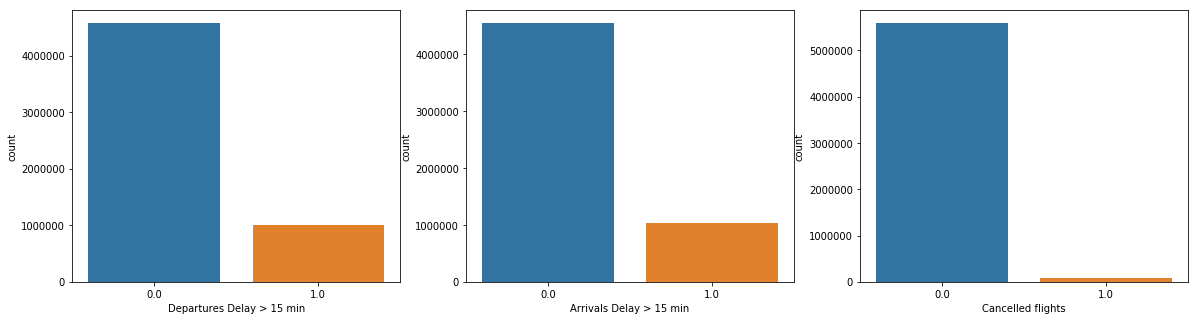

In [25]:
# Gráficas anuales
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.countplot(dfanual['DepDel15'], label='Frecuencia')
plt.xlabel('Departures Delay > 15 min')

plt.subplot(1,3,2)
sns.countplot(dfanual['ArrDel15'], label='Frecuencia')
plt.xlabel('Arrivals Delay > 15 min')

plt.subplot(1,3,3)
sns.countplot(dfanual['Cancelled'], label='Frecuencia')
plt.xlabel('Cancelled flights')


plt.show()

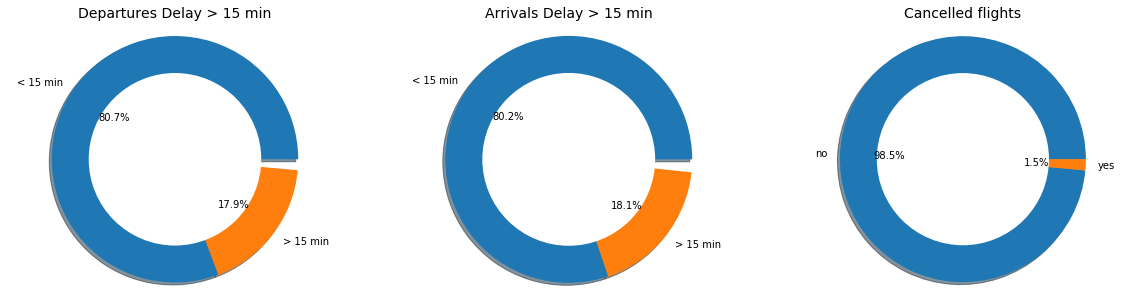

In [26]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(20, 5))
etiquetas_1 = ['< 15 min', '> 15 min']
etiquetas_2 = ['no', 'yes']
fracs_dep = [len(dfanual[dfanual['DepDel15'] == 0])/len(dfanual['DepDel15']),
             len(dfanual[dfanual['DepDel15'] ==1])/len(dfanual['DepDel15'])]
fracs_arr = [len(dfanual[dfanual['ArrDel15'] == 0])/len(dfanual['ArrDel15'])
             , len(dfanual[dfanual['ArrDel15'] == 1])/len(dfanual['ArrDel15'])]
fracs_canc = [len(dfanual[dfanual['Cancelled'] == 0])/len(dfanual['Cancelled']),
              len(dfanual[dfanual['Cancelled'] == 1])/len(dfanual['Cancelled'])]

the_grid = GridSpec(1, 3)

plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(fracs_dep, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Departures Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(fracs_arr, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_2 = plt.Circle((0, 0), 0.7, fc='white')
fig_2 = plt.gcf()
fig_2.gca().add_artist(centre_circle_2)
plt.axis('equal')
plt.title('Arrivals Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 2], aspect=1)
plt.pie(fracs_canc, labels=etiquetas_2, autopct='%1.1f%%', shadow=True)
centre_circle_3 = plt.Circle((0, 0), 0.7, fc='white')
fig_3 = plt.gcf()
fig_3.gca().add_artist(centre_circle_3)
plt.axis('equal')
plt.title('Cancelled flights', fontsize=14)

plt.show()

## 1.3.1 Adelantos en Salidas de Vuelos

In [27]:
#vuelos que se han adelantado de la hora prevista en salidas
adelantos = (dfanual[dfanual['DepDelay'] < 0])
adelantos = adelantos['DepDelay']
adelantos.shape

(3361248,)

In [28]:
adelantos.describe()

count    3.361248e+06
mean    -5.161160e+00
std      3.245721e+00
min     -2.340000e+02
25%     -7.000000e+00
50%     -5.000000e+00
75%     -3.000000e+00
max     -1.000000e+00
Name: DepDelay, dtype: float64

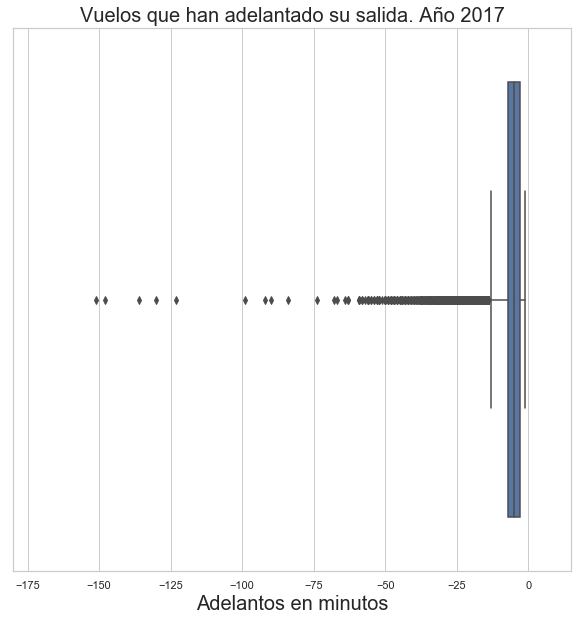

In [29]:
#Vuelos que han adelantado su salida

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-180,15)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

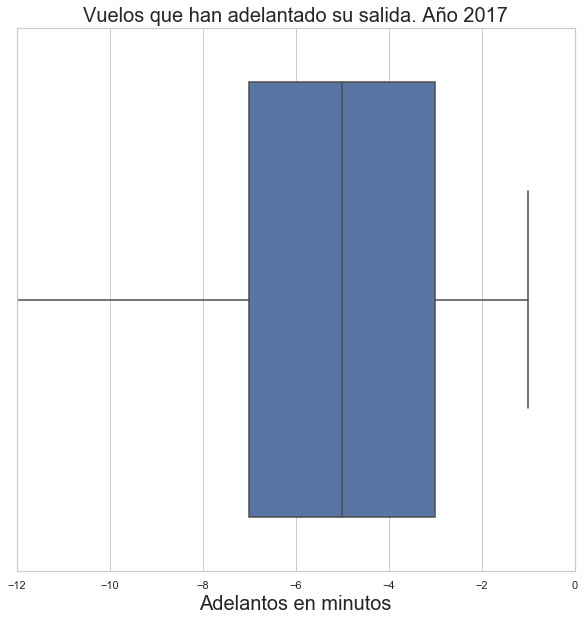

In [30]:
#vamos a reducir la escala para al menos ver la parte principal
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-12,0)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

Los adelantos en salida mayores a 10 minutos son cancelaciones, por lo que no nos eliminamos

In [31]:
len(dfanual[dfanual['DepDelay'] < -15])

29301

## 1.3.2 Retrasos en salidas distribuidos por aerolíneas

In [32]:
retrasosSalidasPorAerolinea = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])

retrasosSalidasPorAerolinea = pd.DataFrame(retrasosSalidasPorAerolinea[['DepDelay', 'IATA_CODE_Reporting_Airline']])
retrasosSalidasPorAerolinea.head(5)

DepDelay IATA_CODE_Reporting_Airline
0       31.0                          AA
8      169.0                          AA
19      47.0                          AA
28      34.0                          AA
39      45.0                          AA

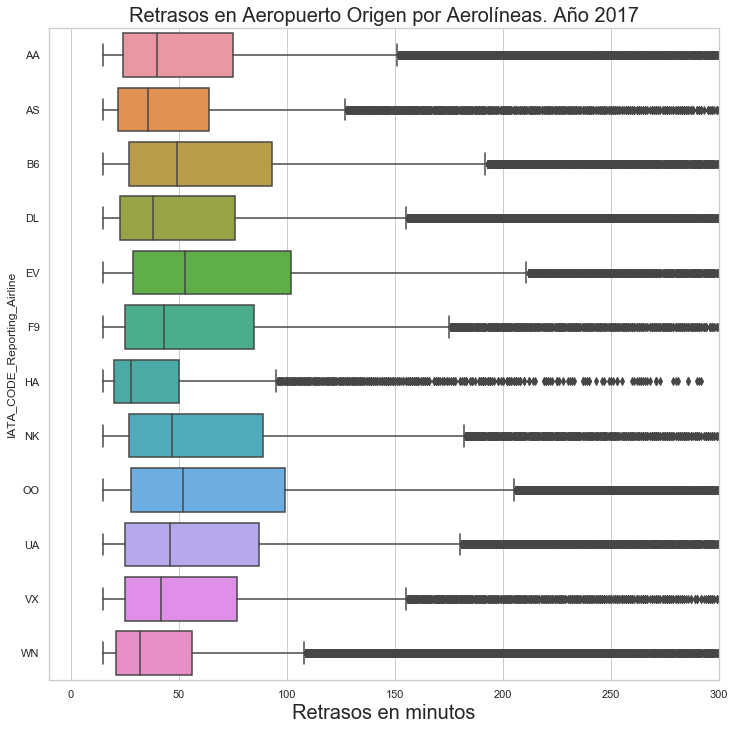

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

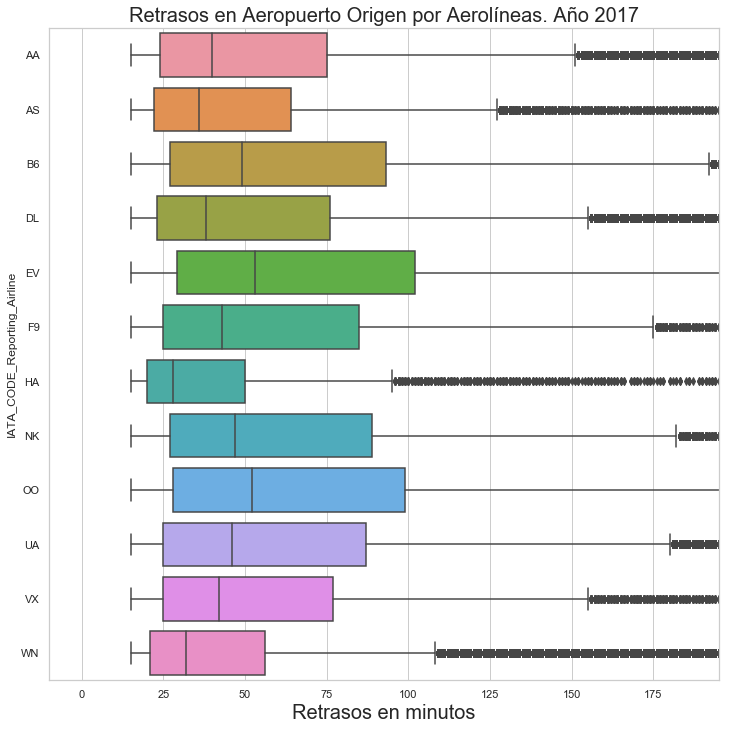

In [34]:
#vamos a limitar un poco más eje x
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,195)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

## 1.3.3 Retrasos en Aeropuerto de Origen

#### Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no en la llegada en el destino)

In [35]:
#Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no
#en la llegada en el destino)
len(dfanual[dfanual['DepDel15'] == 1])

1013845

In [36]:
#retrasos por mes en salidas

vuelosTotalesRetrasadosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosPorMes = vuelosTotalesRetrasadosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1)])}, ignore_index=True)


#sin meter en un pandas, sólo para mostrarlos por print
#for df in dataframes:
#    print(df["Month"][1],len(df[df['DepDel15'] == 1]))

In [37]:
vuelosTotalesRetrasadosPorMes

mes  vuelos
0    1   93072
1    2   62027
2    3   85183
3    4   89608
4    5   94725
5    6  109687
6    7  109913
7    8  102773
8    9   58902
9   10   68630
10  11   53422
11  12   85903

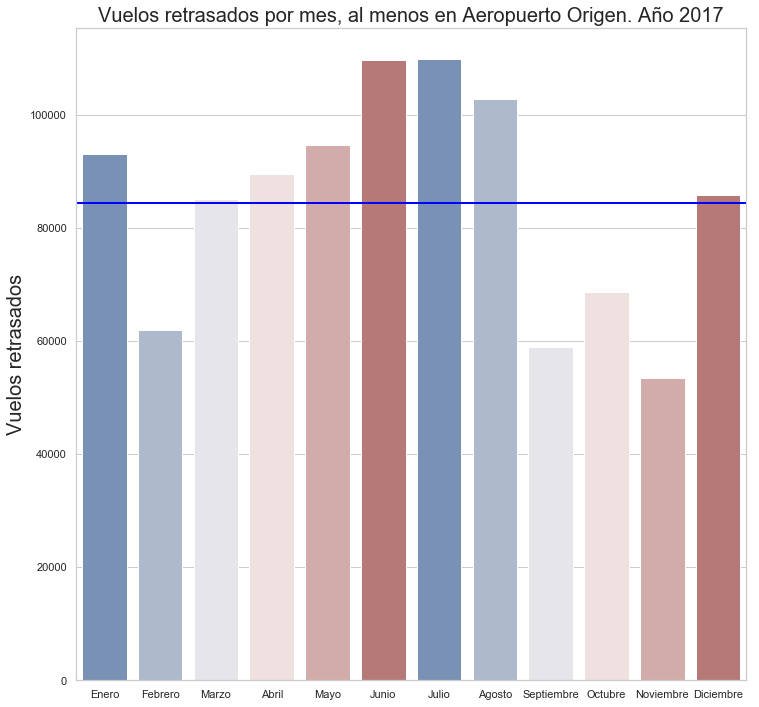

In [38]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, al menos en Aeropuerto Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

#### Retrasados sólo en salidas y no en llegadas, es decir, recuperan el tiempo durante el vuelo. Esto significa que no se marca el retraso por ningún motivo, ya que el retraso se marca en destino por lo que los vuelos con retrasos en salidas sólo se registro el tiempo de retraso.

In [39]:
len(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDel15'] == 0)])

204205

In [40]:
vuelosRestrasadosSoloEnSalidas = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnSalidas = vuelosRestrasadosSoloEnSalidas.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1) & (df['ArrDel15'] == 0)])}, ignore_index=True)


In [41]:
vuelosRestrasadosSoloEnSalidas

mes vuelos
0    1  17841
1    2  13811
2    3  16883
3    4  15745
4    5  17751
5    6  19833
6    7  19800
7    8  18841
8    9  13340
9   10  15311
10  11  14698
11  12  20351

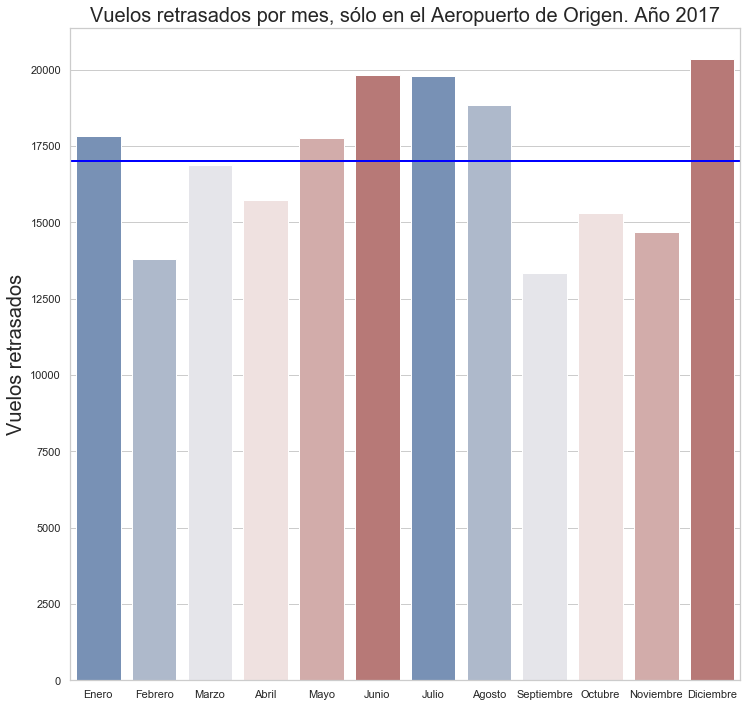

In [42]:
#Vuelos retrasados por mes sólo en salidas (no tenemos los motivos de los retrasos en este caso, al llegar en hora a destino)

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnSalidas['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnSalidas['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

Nos vamos a quedar sólo con los retrasados en salidas (tanto si recuperaron el tiempo a la llegado como si no)
para ver la media y cuartiles, así como los posibles outliers

In [43]:
retrasosSalidas = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
retrasosSalidas.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0   2017        1      1           1          7  2017-01-01                AA   
8   2017        1      1           9          1  2017-01-09                AA   
19  2017        1      1          22          7  2017-01-22                AA   
28  2017        1      1           1          7  2017-01-01                AA   
39  2017        1      1          12          4  2017-01-12                AA   

    DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                      19805                          AA      N787AA  ...   
8                      19805                          AA      N784AA  ...   
19                     19805                          AA      N793AA  ...   
28                     19805                          AA      N783AA  ...   
39                     19805                          AA      N790AA  ...   

    Div5AirportID  Div5AirportSeqID  Div5WheelsOn  Div5TotalGTime  \
0             NaN               NaN           NaN             NaN   
8             NaN               NaN           NaN             NaN   
19            NaN               NaN           NaN             NaN   
28            NaN               NaN           NaN             NaN   
39            NaN               NaN           NaN             NaN   

   Div5LongestGTime Div5WheelsOff Div5TailNum  Unnamed: 109 Flight_Code  \
0               NaN           NaN         NaN           NaN         AA1   
8               NaN           NaN         NaN           NaN         AA1   
19              NaN           NaN         NaN           NaN         AA1   
28              NaN           NaN         NaN           NaN         AA2   
39              NaN           NaN         NaN           NaN         AA2   

      Route  
0   JFK-LAX  
8   JFK-LAX  
19  JFK-LAX  
28  LAX-JFK  
39  LAX-JFK  

[5 rows x 112 columns]

In [44]:
retrasosSalidas = pd.DataFrame(retrasosSalidas['DepDelay'])

retrasosSalidas.head(5)

DepDelay
0       31.0
8      169.0
19      47.0
28      34.0
39      45.0

In [45]:
retrasosSalidas.describe().T

count       mean        std   min   25%   50%   75%     max
DepDelay  1013845.0  65.285155  81.895644  15.0  24.0  40.0  76.0  2755.0

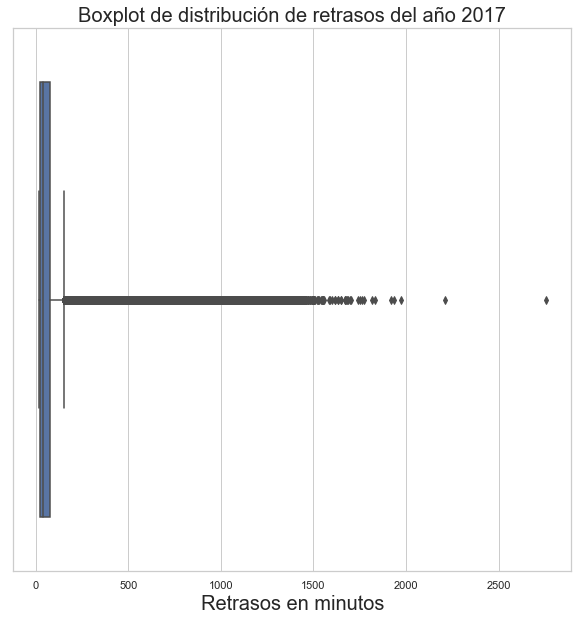

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

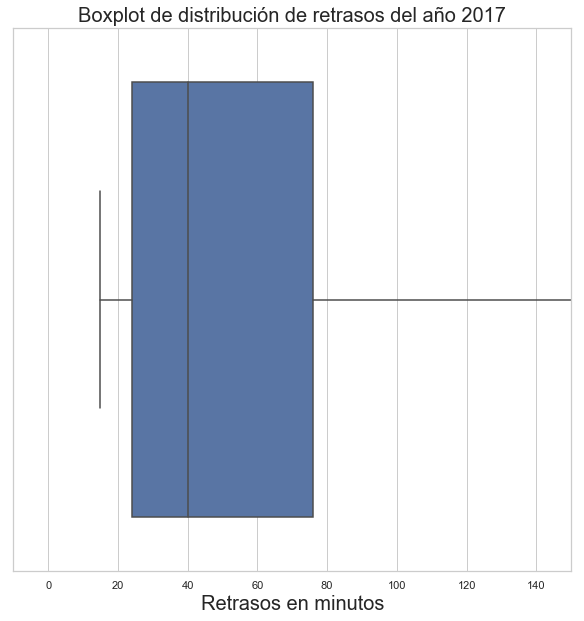

In [47]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-10,150)
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

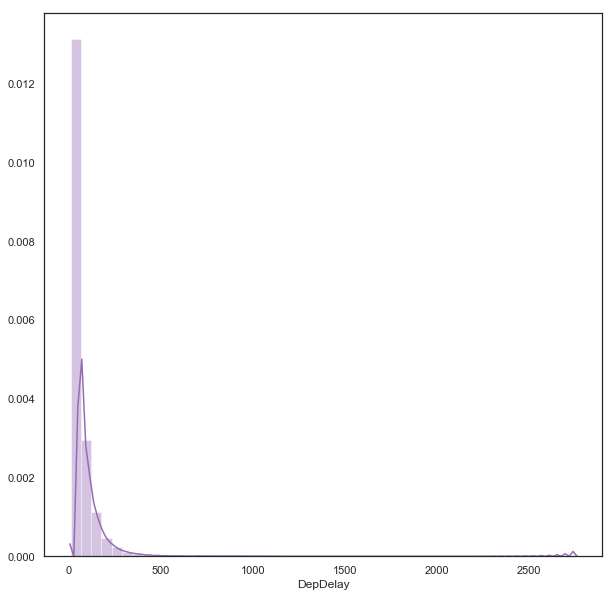

In [48]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSalidas["DepDelay"], color="m")

plt.show()

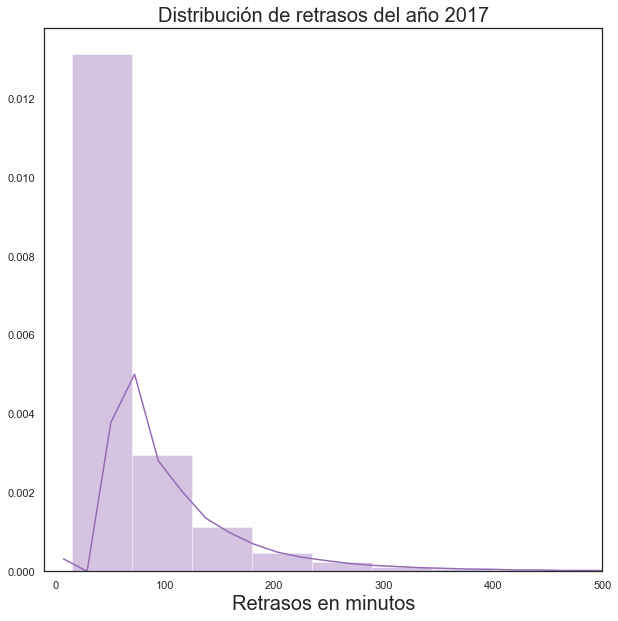

In [49]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSalidas["DepDelay"], color="m")
plt.xlim(-10,500)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 250 minutos de retraso

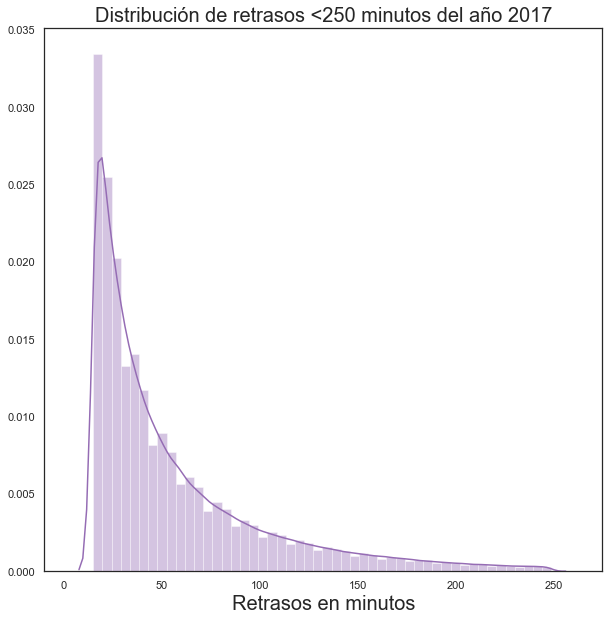

In [50]:
corte250Min = pd.DataFrame(retrasosSalidas[retrasosSalidas["DepDelay"]<250])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte250Min["DepDelay"], color="m")
plt.xlim(-10,275)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <250 minutos del año ' + year, fontsize=20)


plt.show()

### 1.3.3.1 Ranking de aeropuertos en Retrasos en salidas

In [51]:
dfanual[dfanual['DepDel15'] == 1].Origin.value_counts(sort=True).head(15)

ATL    64570
ORD    50536
LAX    49707
SFO    40548
DEN    40158
DFW    33879
LAS    32235
EWR    27900
MCO    26567
BOS    25714
PHX    25150
SEA    22101
JFK    21012
FLL    20414
DTW    19899
Name: Origin, dtype: int64

In [52]:
#primero cogemos los 45 aeropuertos (de origen) con mayor número de retrasos
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDelay'] == 1].Origin.value_counts(sort=True)).head(45)

In [53]:
#retrasos totales de esos 45 aeropuerto
retrasosSalidaEnAeropuertos.sum()

Origin    115635
dtype: int64

In [54]:
#el 85% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80Aeropuertos = ((retrasosSalidaEnAeropuertos.sum() / (len(dfanual[dfanual['DepDel15'] == 1])))) *100

In [55]:
pct80Aeropuertos = (pct80Aeropuertos -100) * (-1)

In [56]:
print('45 aeropuertos concentran el %.2f' %pct80Aeropuertos + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 88.59% de los retrasos del año 2017


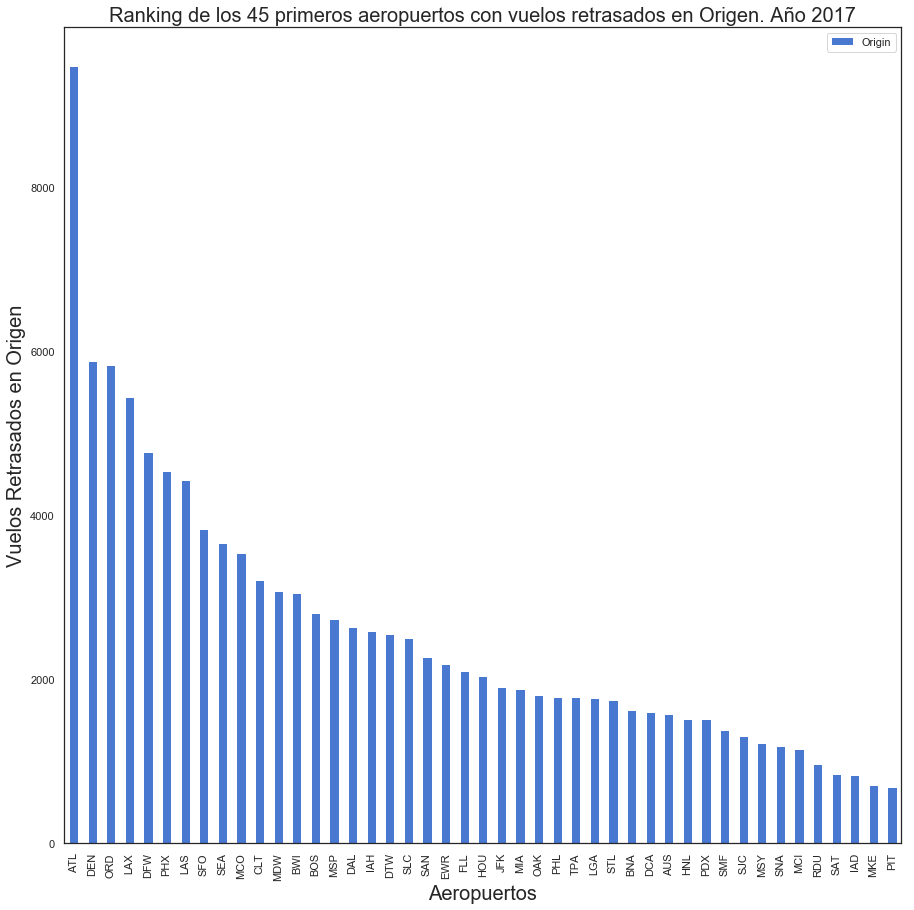

In [57]:
ax = retrasosSalidaEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados en Origen", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), DFW (Dallas) y IAH(Houston) y  concentran más del 20% de los retrasos

In [58]:
retrasosSalidaEnAeropuertos = retrasosSalidaEnAeropuertos.reset_index()
retrasosSalidaEnAeropuertos.columns = ['Origin','DepDelay']

In [59]:
retrasosSalidaEnAeropuertos.head(45)

Origin  DepDelay
0     ATL      9470
1     DEN      5879
2     ORD      5824
3     LAX      5435
4     DFW      4766
5     PHX      4529
6     LAS      4417
7     SFO      3828
8     SEA      3654
9     MCO      3531
10    CLT      3199
11    MDW      3071
12    BWI      3044
13    BOS      2799
14    MSP      2726
15    DAL      2634
16    IAH      2586
17    DTW      2542
18    SLC      2497
19    SAN      2265
20    EWR      2179
21    FLL      2090
22    HOU      2032
23    JFK      1898
24    MIA      1869
25    OAK      1798
26    PHL      1774
27    TPA      1771
28    LGA      1764
29    STL      1740
30    BNA      1624
31    DCA      1596
32    AUS      1567
33    HNL      1512
34    PDX      1506
35    SMF      1379
36    SJC      1296
37    MSY      1218
38    SNA      1181
39    MCI      1146
40    RDU       964
41    SAT       834
42    IAD       821
43    MKE       704
44    PIT       676

In [60]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSalidaEnAeropuertos["Origin"].values.tolist()

In [61]:
#nos quedamos con los datos de esos aeropuertos
retrasosSalidaEnAeropuertos = dfanual.loc[(dfanual["Origin"].isin(aeropuertos))]

In [62]:
retrasosSalidaEnAeropuertos

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2017        1      1           1          7  2017-01-01   
1       2017        1      1           2          1  2017-01-02   
2       2017        1      1           3          2  2017-01-03   
3       2017        1      1           4          3  2017-01-04   
4       2017        1      1           5          4  2017-01-05   
5       2017        1      1           6          5  2017-01-06   
6       2017        1      1           7          6  2017-01-07   
7       2017        1      1           8          7  2017-01-08   
8       2017        1      1           9          1  2017-01-09   
9       2017        1      1          10          2  2017-01-10   
10      2017        1      1          11          3  2017-01-11   
11      2017        1      1          12          4  2017-01-12   
12      2017        1      1          13          5  2017-01-13   
13      2017        1      1          15          7  2017-01-15   
14      2017        1      1          16          1  2017-01-16   
15      2017        1      1          17          2  2017-01-17   
16      2017        1      1          18          3  2017-01-18   
17      2017        1      1          19          4  2017-01-19   
18      2017        1      1          20          5  2017-01-20   
19      2017        1      1          22          7  2017-01-22   
20      2017        1      1          23          1  2017-01-23   
21      2017        1      1          24          2  2017-01-24   
22      2017        1      1          25          3  2017-01-25   
23      2017        1      1          26          4  2017-01-26   
24      2017        1      1          27          5  2017-01-27   
25      2017        1      1          29          7  2017-01-29   
26      2017        1      1          30          1  2017-01-30   
27      2017        1      1          31          2  2017-01-31   
28      2017        1      1           1          7  2017-01-01   
29      2017        1      1           2          1  2017-01-02   
...      ...      ...    ...         ...        ...         ...   
464174  2017        4     12          17          7  2017-12-17   
464175  2017        4     12          17          7  2017-12-17   
464176  2017        4     12          17          7  2017-12-17   
464177  2017        4     12          17          7  2017-12-17   
464178  2017        4     12          17          7  2017-12-17   
464179  2017        4     12          17          7  2017-12-17   
464180  2017        4     12          17          7  2017-12-17   
464181  2017        4     12          17          7  2017-12-17   
464182  2017        4     12          17          7  2017-12-17   
464183  2017        4     12          17          7  2017-12-17   
464184  2017        4     12          17          7  2017-12-17   
464185  2017        4     12          17          7  2017-12-17   
464186  2017        4     12          17          7  2017-12-17   
464187  2017        4     12          17          7  2017-12-17   
464188  2017        4     12          17          7  2017-12-17   
464189  2017        4     12          17          7  2017-12-17   
464190  2017        4     12          17          7  2017-12-17   
464191  2017        4     12          17          7  2017-12-17   
464192  2017        4     12          17          7  2017-12-17   
464194  2017        4     12          17          7  2017-12-17   
464195  2017        4     12          17          7  2017-12-17   
464196  2017        4     12          17          7  2017-12-17   
464197  2017        4     12          17          7  2017-12-17   
464198  2017        4     12          17          7  2017-12-17   
464199  2017        4     12          17          7  2017-12-17   
464200  2017        4     12          17          7  2017-12-17   
464201  2017        4     12          17          7  2017-12-17   
464202  2017        4     12          17          7  20

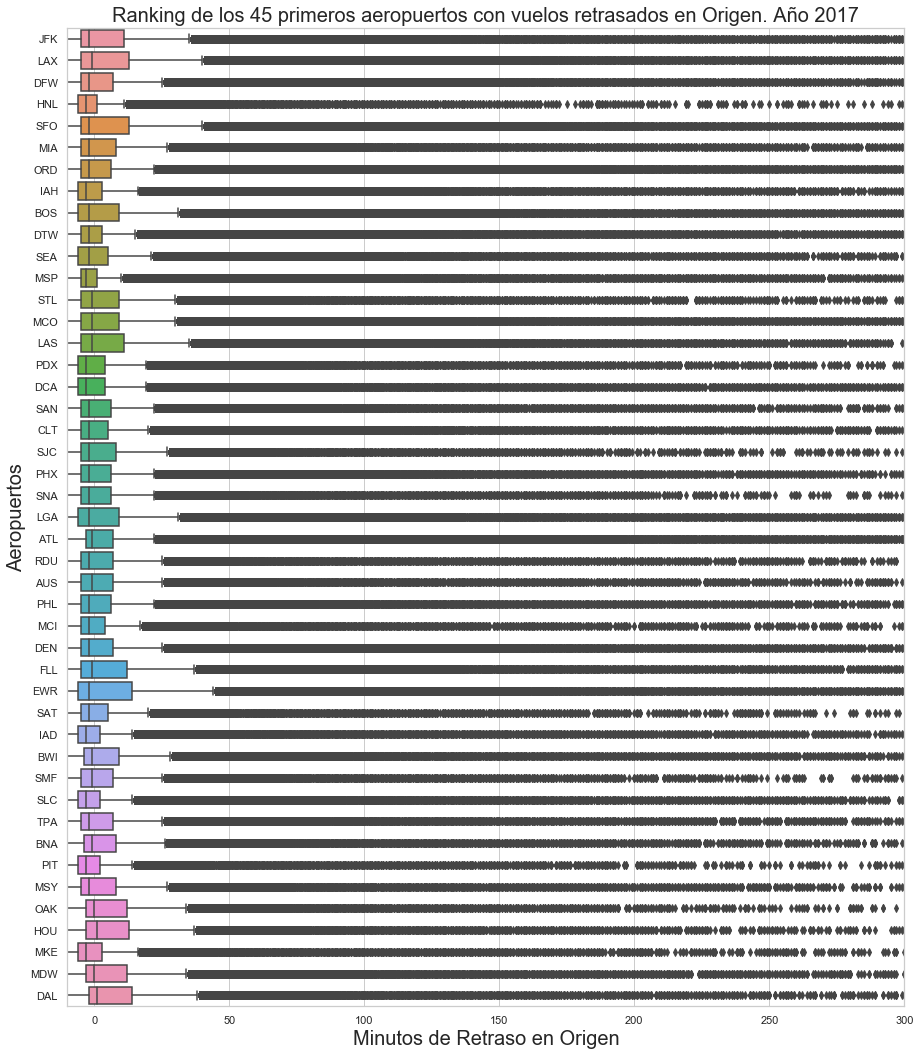

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

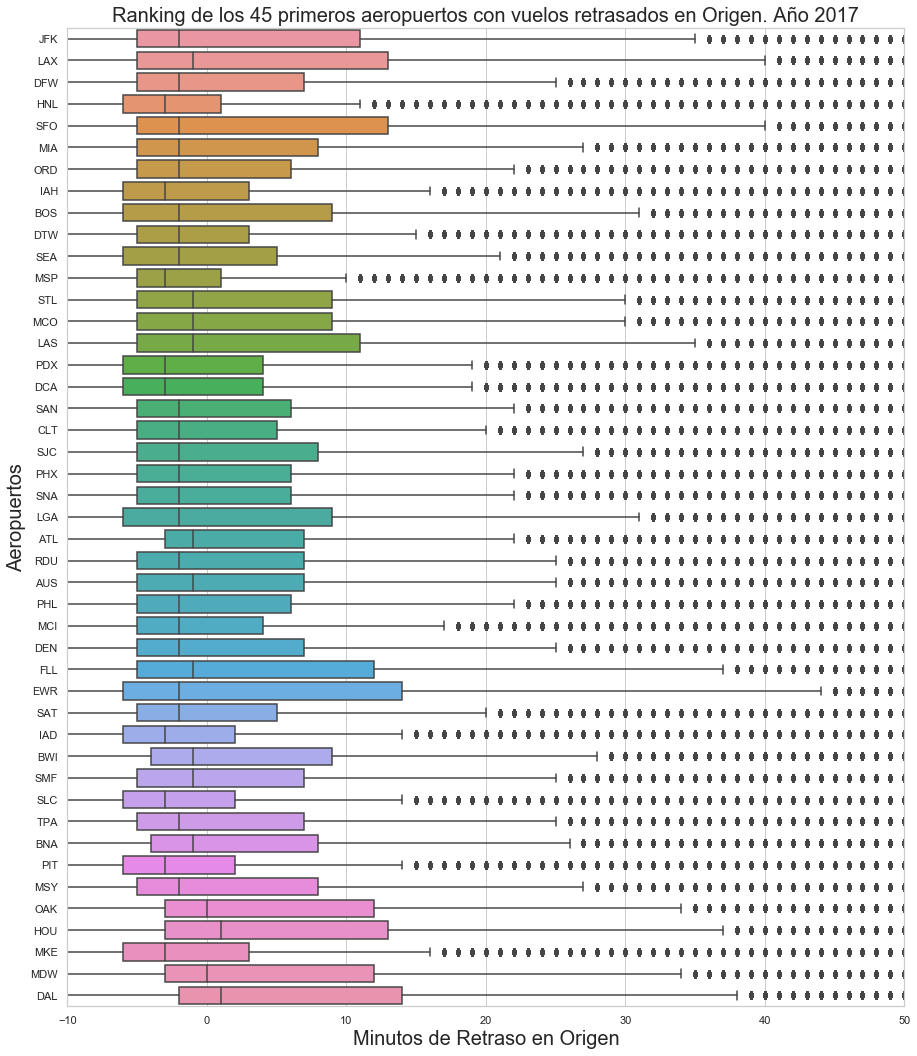

In [64]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,50)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

In [65]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en salidas
vuelosTotalesPorAeropuerto = retrasosSalidaEnAeropuertos.groupby('Origin').aggregate({'Origin': 'count', 'DepDel15':'sum'})

In [66]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Origin': 'VuelosTotales', 'DepDel15': 'VuelosRetrasados'})

In [67]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados de salida en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [68]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de salida en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

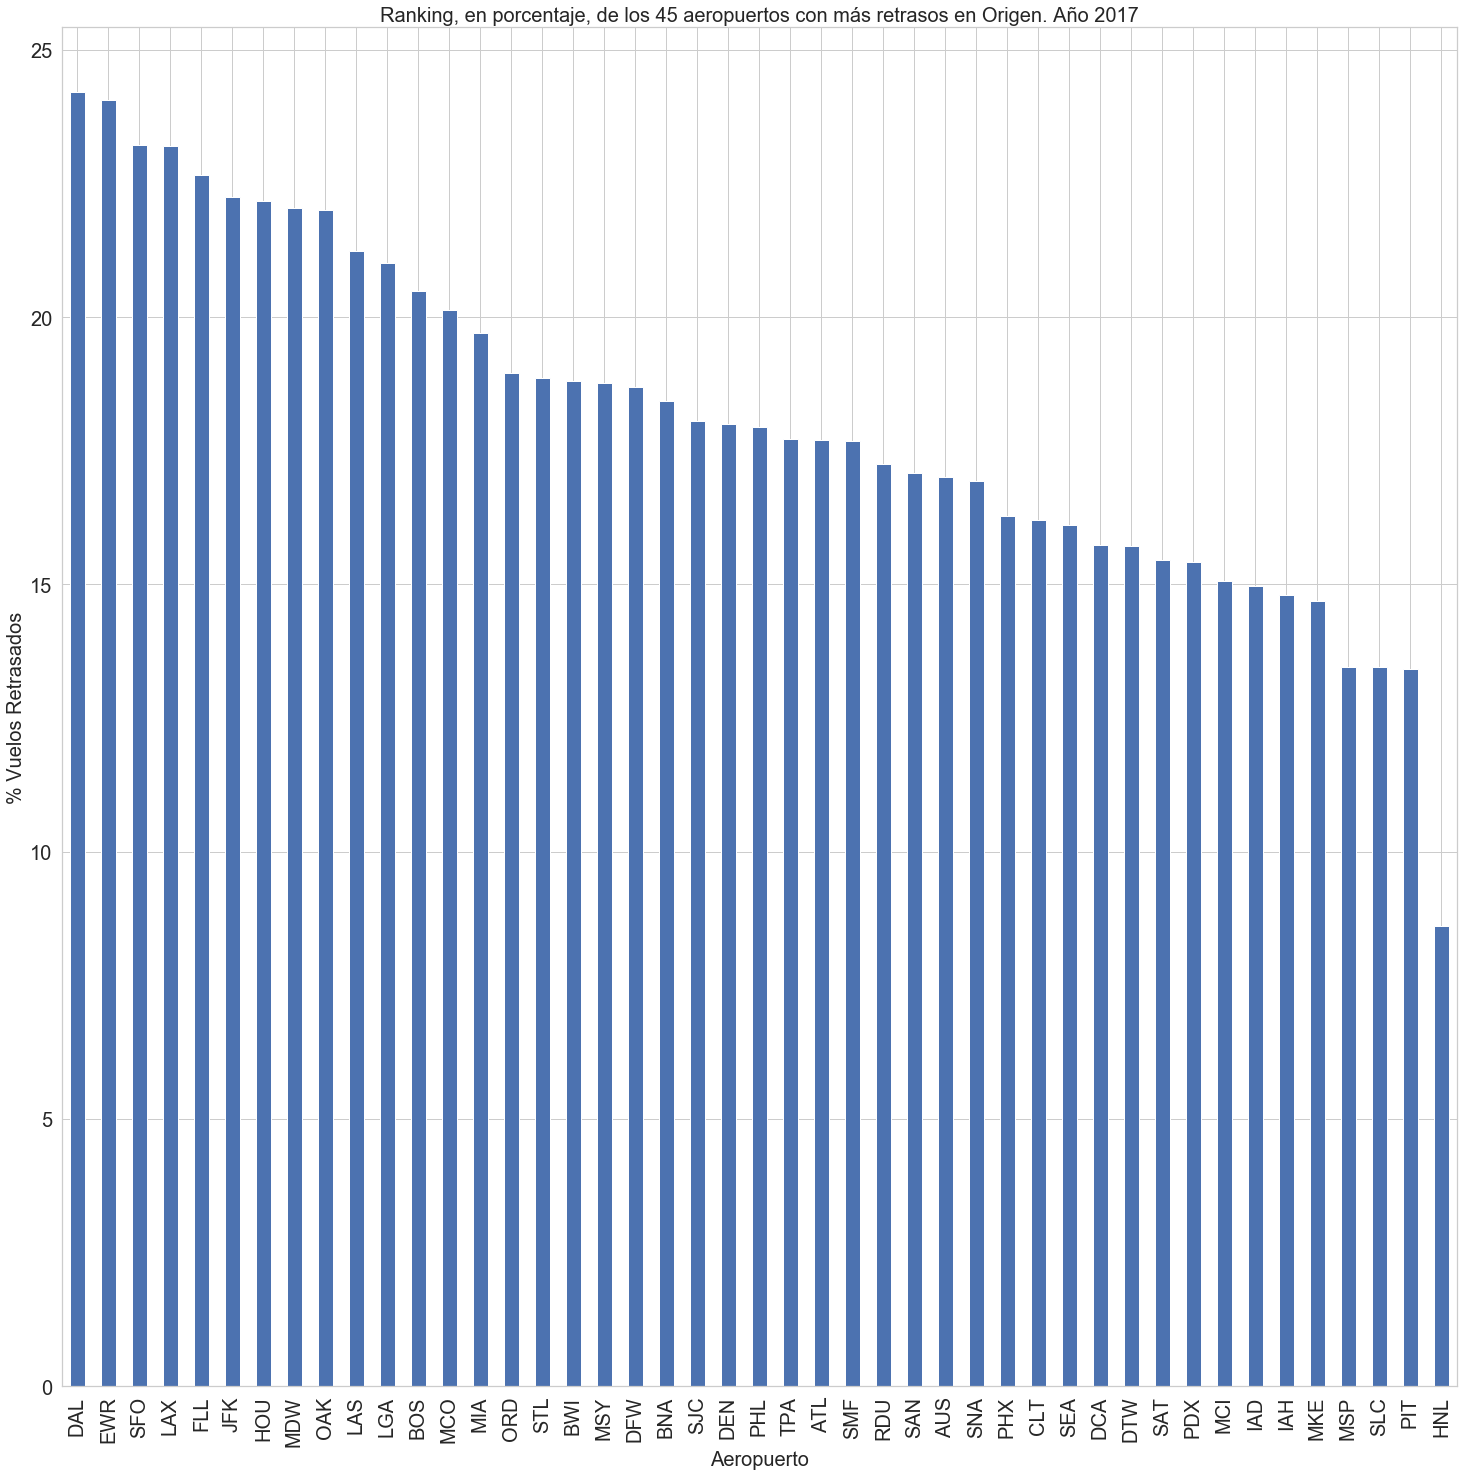

In [69]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Dado que no podemos discernir si el mal tiempo fue a la llegada o la salida, en los retrasos de los vuelos de salida, así como en el caso de que el motivo sea el espacio aéreo, sólo podemos sacar el retraso, en llegadas, en función de la llegada tardía del vuelo anterior y por la aerolínea.

In [70]:
retrasosSalidaEnAeropuertos = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['DepDel15'] == 1])

In [71]:
retrasosSalidaEnAeropuertos.shape

(842025, 112)

In [72]:
#retrasos medios en salidas por aeropuerto causados por la llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['LateAircraftDelay'] > 0])


In [73]:
#usamos la media
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'LateAircraftDelay' : 'mean'})

In [74]:
#renombramos las columnas
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'LateAircraftDelay' : 'MediaTiempoRetrasado'})

In [75]:
#ordenamos por aeropuertos con retraso por llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['MediaTiempoRetrasado'], ascending=False)

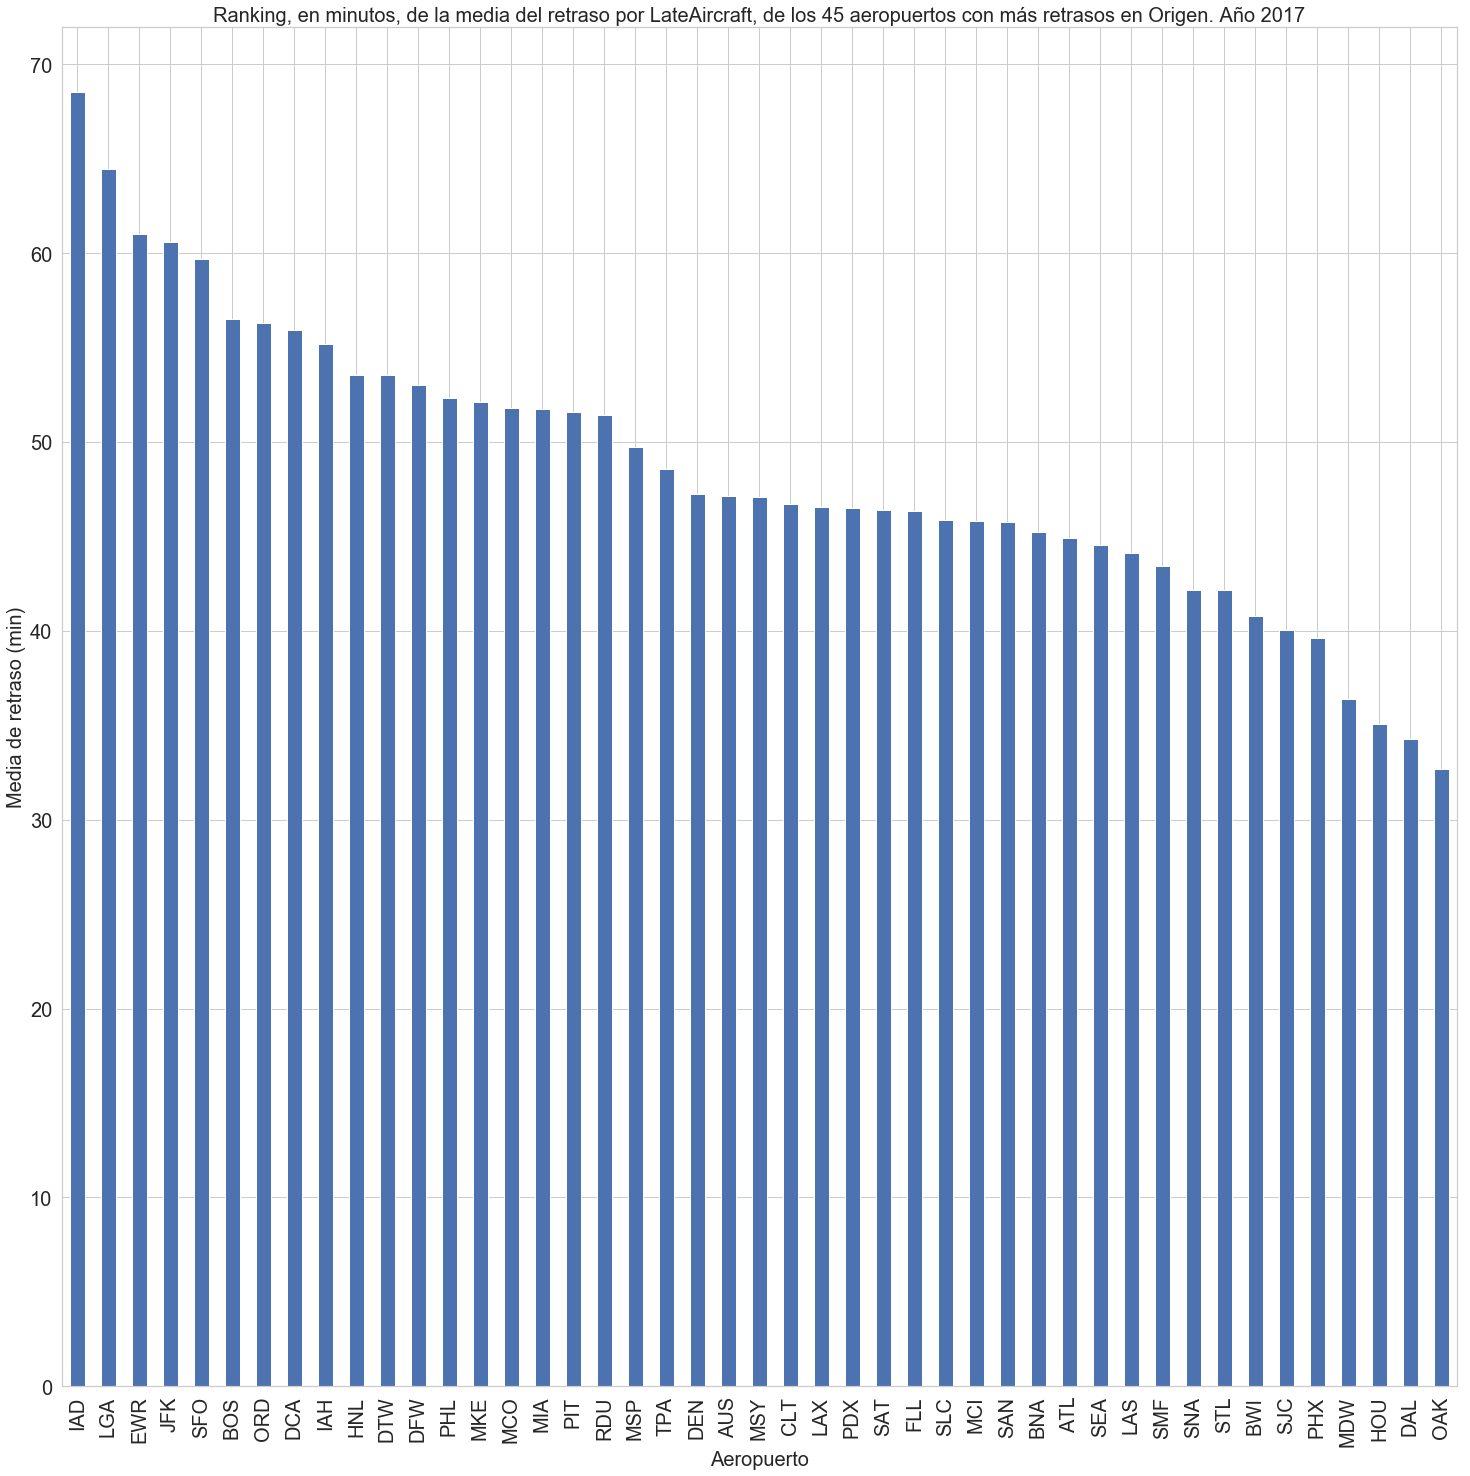

In [76]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorLateAircraft.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por LateAircraft, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

In [77]:
#mostramos el peso del retraso por llegada tardía del avión respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorLateAircraft['PesoRetraso'] = (retrasoMedioEnSalidasPorLateAircraft['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorLateAircraft['MediaRetrasoTotal'])*100


In [78]:
#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['PesoRetraso'], ascending=False)

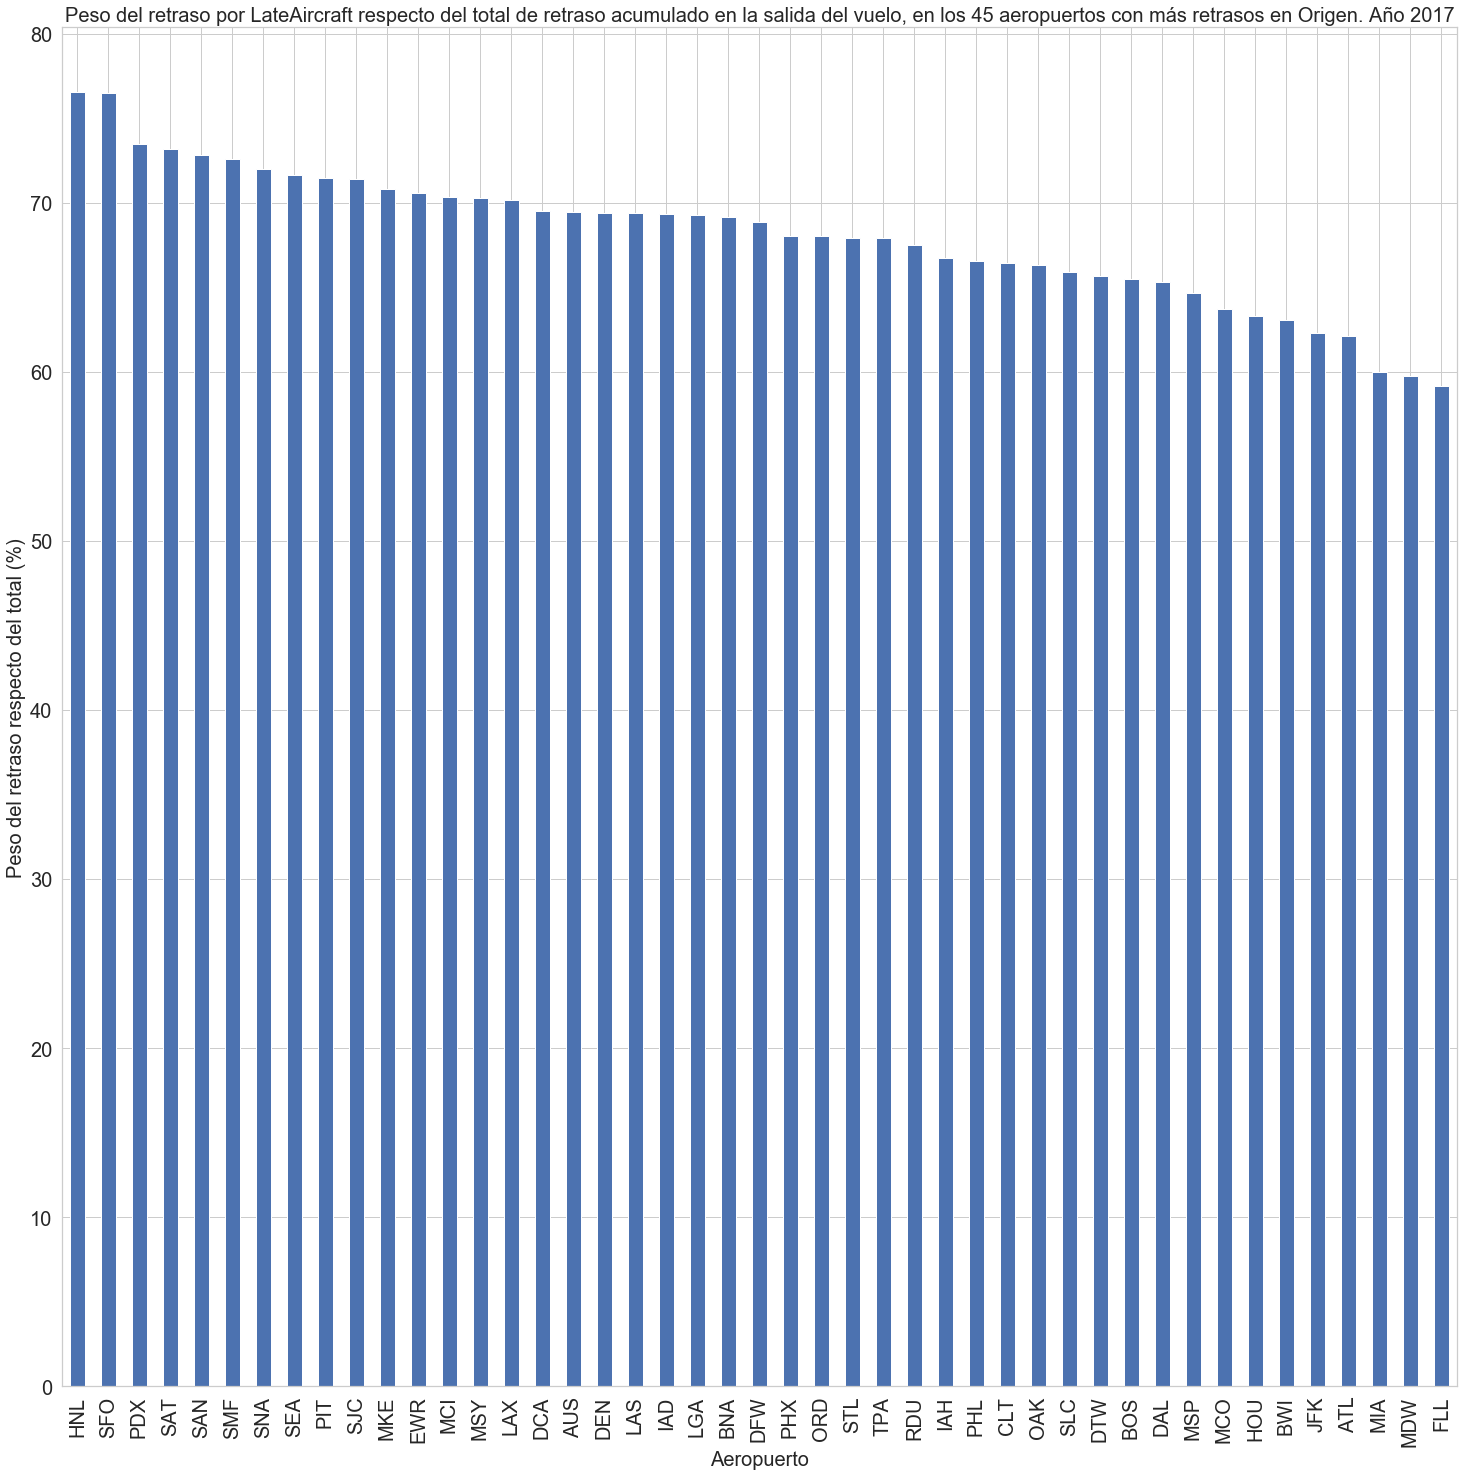

In [79]:
#mostramos  el peso del retraso de llegada tardía del vuelo anterior respecto del retraso total

ax = retrasoMedioEnSalidasPorLateAircraft.PesoRetraso.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%)", fontsize=20)
ax.set_title('Peso del retraso por LateAircraft respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la llegada tardía del vuelo anterior, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

In [80]:
#retrasos medios en salidas por aeropuerto causados por problemas de la aerolínea
retrasoMedioEnSalidasPorAerolinea = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['CarrierDelay'] > 0])

#usamos la media 
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'CarrierDelay' : 'mean'})

#renombramos las columnas
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'CarrierDelay' : 'MediaTiempoRetrasado'})

#ordenamos por aeropuertos con retraso por motivo de la aerolinea
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['MediaTiempoRetrasado'], ascending=False)

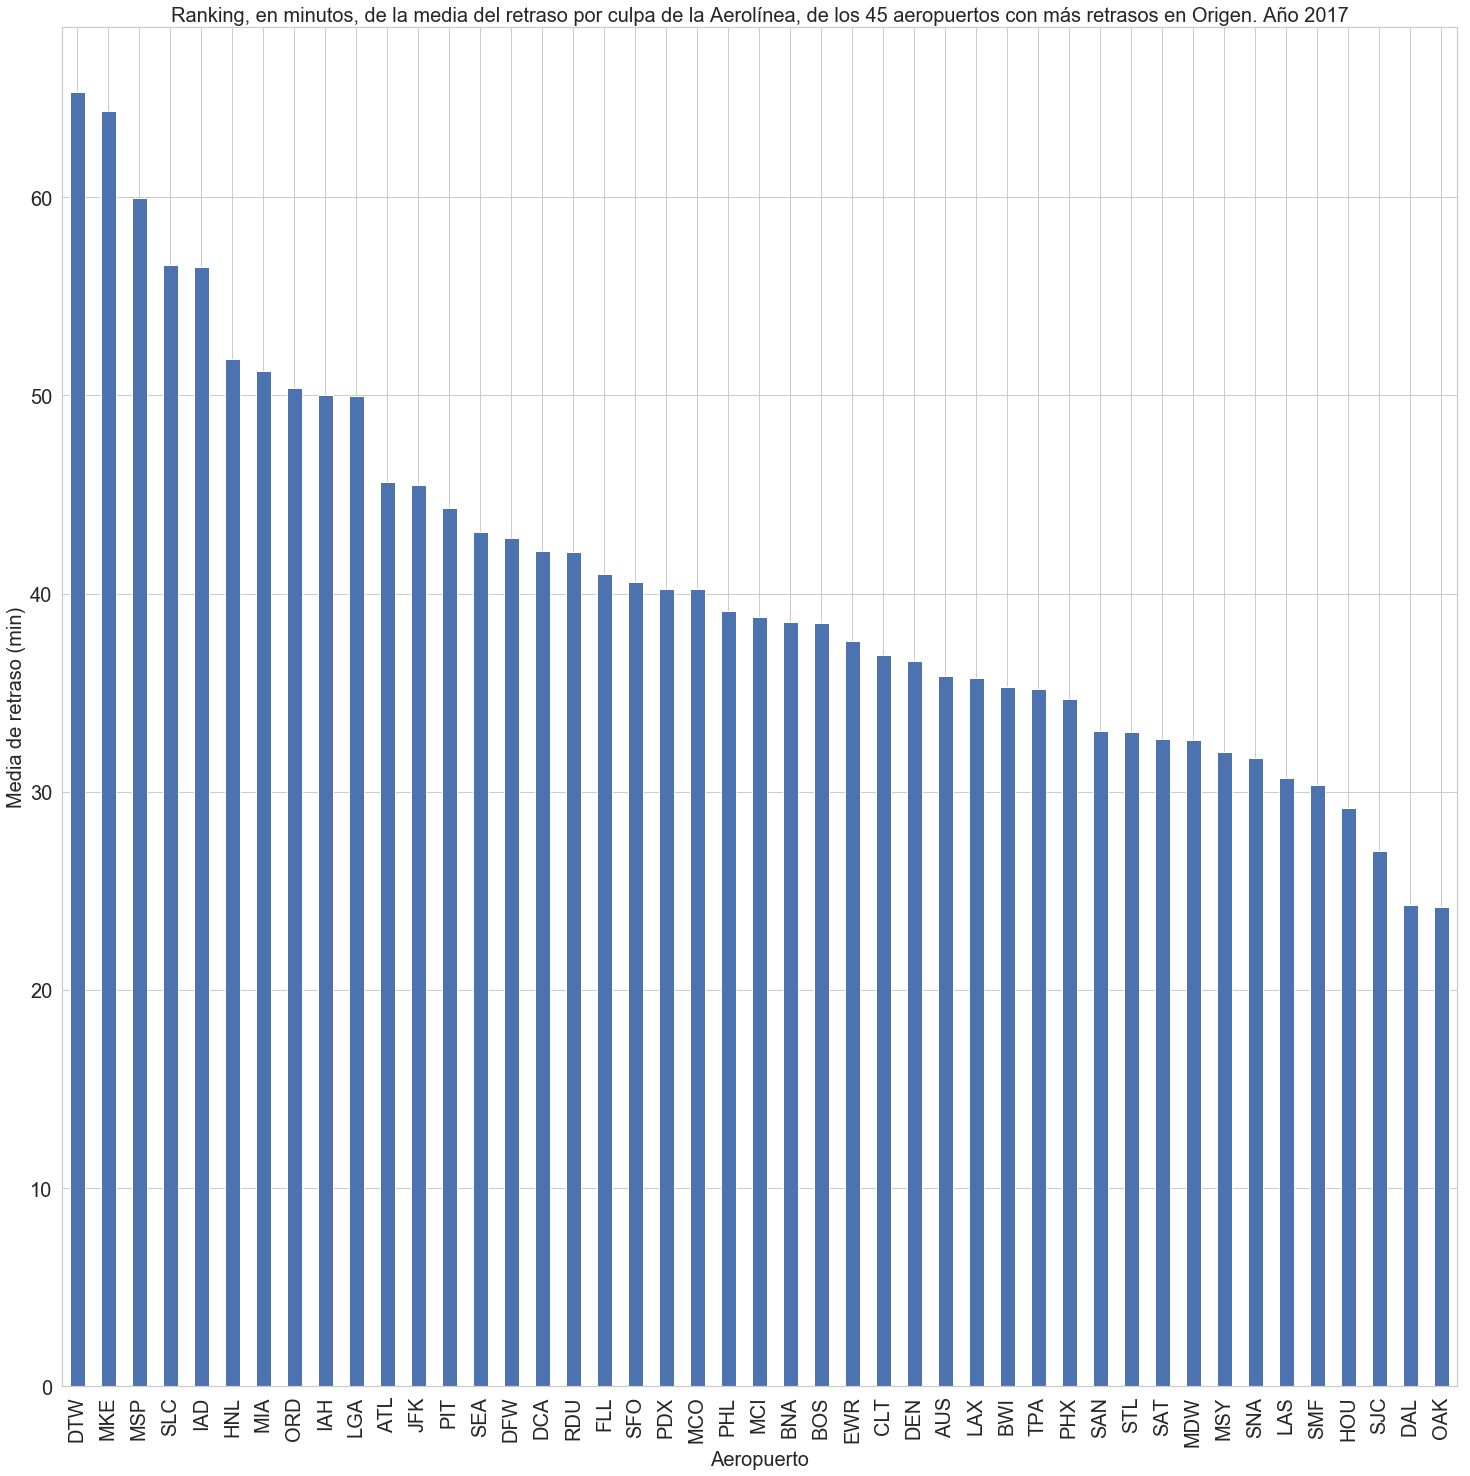

In [81]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorAerolinea.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por culpa de la Aerolínea, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

In [82]:
#mostramos el peso del retraso por la aerolínea respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorAerolinea['PesoRetraso'] = (retrasoMedioEnSalidasPorAerolinea['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorAerolinea['MediaRetrasoTotal'])*100

#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['PesoRetraso'], ascending=False)


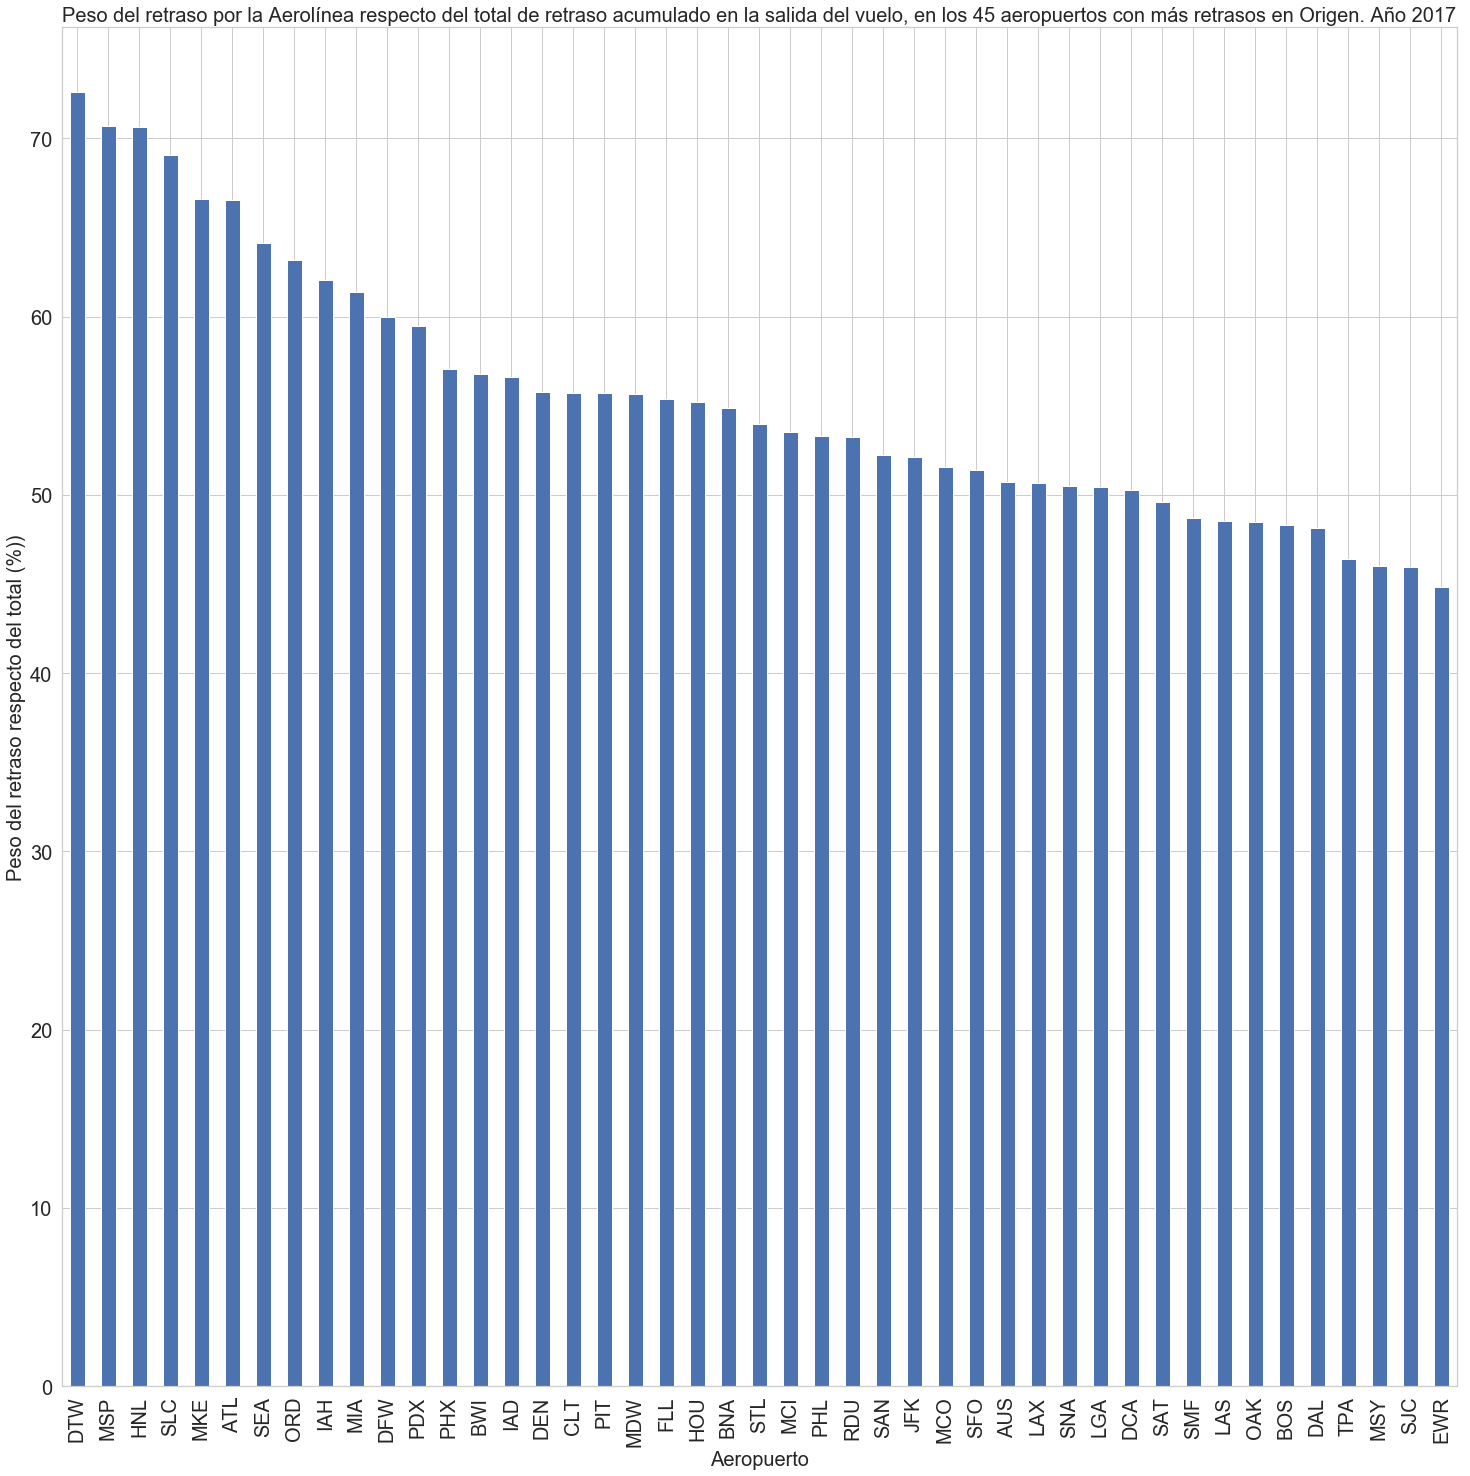

In [83]:
#mostramos el peso del retraso de la aerolínea respecto del retraso total

ax = retrasoMedioEnSalidasPorAerolinea.PesoRetraso.plot(kind='bar',
                                figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%))", fontsize=20)
ax.set_title('Peso del retraso por la Aerolínea respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la aerolínea, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

#### Vamos a coger las 3 combinaciones posibles para tratar de afinar más los motivos de retrasos en salidas
1. Que tenga retraso tanto por Aerolínea como por llegada tardía del avión
2. Que tenga retraso sólo por llegada tardía del avión
3. Que tengra retraso sólo por aerolínea

In [84]:
#primero cogemos todos los retrasos, sean cual sea el tipo en salidas
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
#nos quedamos con los 45 aeropuertos con más retrasos
retrasosSalidaEnAeropuertos= retrasosSalidaEnAeropuertos.loc[(retrasosSalidaEnAeropuertos["Origin"].isin(aeropuertos))]


In [85]:
retrasosSalidaEnAeropuertos.shape

(842025, 112)

In [86]:
#ahora cogemos las 3 combinaciones

#ambos tipos de retrasos
retrasosSalidaEnAeropuertosLateAndAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por llegada tardía del avión anterior
retrasosSalidaSoloLateAircraft = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por la aerolínea
retrasosSalidaSoloAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] == 0)])


In [87]:
#nos quedamos con los retrasos de los 45 primeros aeropuertos (por número de retrasos)

retrasosSalidaEnAeropuertosLateAndAirline= retrasosSalidaEnAeropuertosLateAndAirline.loc[(retrasosSalidaEnAeropuertosLateAndAirline["Origin"].isin(aeropuertos))]
retrasosSalidaSoloLateAircraft= retrasosSalidaSoloLateAircraft.loc[(retrasosSalidaSoloLateAircraft["Origin"].isin(aeropuertos))]
retrasosSalidaSoloAirline= retrasosSalidaSoloAirline.loc[(retrasosSalidaSoloAirline["Origin"].isin(aeropuertos))]


In [88]:
retrasosSalidaEnAeropuertosLateAndAirline.shape

(217444, 112)

In [89]:
retrasosSalidaSoloLateAircraft.shape

(194326, 112)

In [90]:
retrasosSalidaSoloAirline.shape

(171578, 112)

In [91]:
#podríamos inferir los de meteo en salidas si:
#el retraso de llegadas es menor o igual que al de salida y el conteo de meteo = al de salida

retrasosSalidaSoloMeteo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['WeatherDelay'] == dfanual['DepDelay'])])

In [92]:
retrasosSalidaSoloMeteo= retrasosSalidaSoloMeteo.loc[(retrasosSalidaSoloMeteo["Origin"].isin(aeropuertos))]

In [93]:
retrasosSalidaSoloMeteo.shape

(481, 112)

In [94]:
retrasosSalidaSoloNAS = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['NASDelay'] == dfanual['DepDelay'])])

In [95]:
retrasosSalidaSoloNAS= retrasosSalidaSoloNAS.loc[(retrasosSalidaSoloNAS["Origin"].isin(aeropuertos))]

In [96]:
retrasosSalidaSoloNAS.shape

(1672, 112)

In [97]:
retrasosSalidaSoloSecurity = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['SecurityDelay'] == dfanual['DepDelay'])])

In [98]:
retrasosSalidaSoloSecurity = retrasosSalidaSoloSecurity.loc[(retrasosSalidaSoloSecurity["Origin"].isin(aeropuertos))]

In [99]:
retrasosSalidaSoloSecurity.shape

(41, 112)

In [100]:
retrasosSalidaSoloLateAircraft2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['LateAircraftDelay'] == dfanual['DepDelay'])])

In [101]:
retrasosSalidaSoloLateAircraft2 = retrasosSalidaSoloLateAircraft2.loc[(retrasosSalidaSoloLateAircraft2["Origin"].isin(aeropuertos))]

In [102]:
retrasosSalidaSoloLateAircraft2.shape

(4924, 112)

In [103]:
retrasosSalidaSoloAerolinea2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['CarrierDelay'] == dfanual['DepDelay'])])

retrasosSalidaSoloAerolinea2 = retrasosSalidaSoloAerolinea2.loc[(retrasosSalidaSoloAerolinea2["Origin"].isin(aeropuertos))]

retrasosSalidaSoloAerolinea2.shape

(5340, 112)

### 1.3.3.2 Análisis de qué ocurre en el Aeropuerto de Destino si en Origen hay retrasos

#### Vuelos retrasados de salida que llegan con el mismo retraso a la llegada

In [104]:
retrasosSalidaIgualLlegada = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay'])])

In [105]:
retrasosSalidaIgualLlegada = retrasosSalidaIgualLlegada.loc[(retrasosSalidaIgualLlegada["Origin"].isin(aeropuertos))]


#### Vuelos de salida que aumentan su retraso en la llegada (por motivos adicionales a la salida)

In [106]:
retrasosPosterioresSalida = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] < dfanual['ArrDelay'])])

retrasosPosterioresSalida = retrasosPosterioresSalida.loc[(retrasosPosterioresSalida["Origin"].isin(aeropuertos))]


#### Vuelos de salida con retraso que recuperan todo el retraso a la llegada

In [107]:
retrasosRecuperados = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDelay'] <= 0)])

retrasosRecuperados = retrasosRecuperados.loc[(retrasosRecuperados["Origin"].isin(aeropuertos))]


In [108]:
recupera = retrasosRecuperados.shape[0]
igual = retrasosSalidaIgualLlegada.shape[0]
masTarde = retrasosPosterioresSalida.shape[0]

Text(0.5, 1.0, 'Capacidad de recuperación del retraso en destino por retraso en origen')

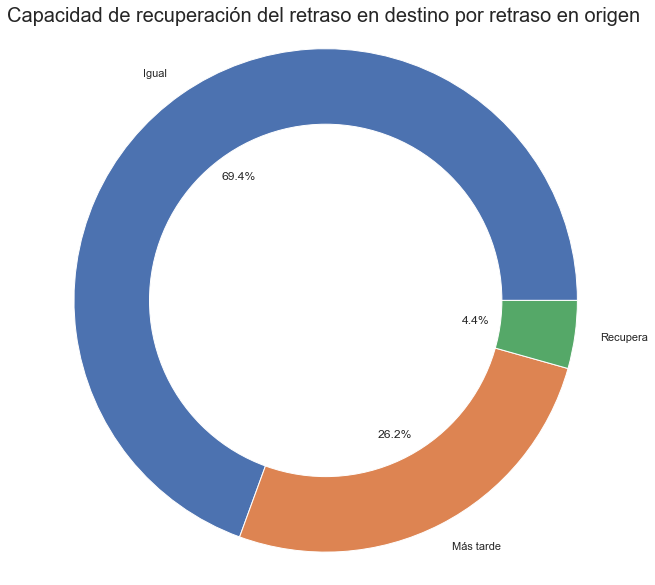

In [109]:
plt.figure(figsize=(10, 10))
etiquetas_1 = ['Igual', 'Más tarde', 'Recupera']
datos = [igual,masTarde, recupera]

plt.pie(datos, labels=etiquetas_1, autopct='%1.1f%%')
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Capacidad de recuperación del retraso en destino por retraso en origen', fontsize=20)

### 1.3.3.3 Visualización retrasos en Destino con duración similar al Origen

In [110]:
#cálculo de los que no recuperan tiempo a la llegada, pero no llegan más tarde, visto por aeropuerto origen, 
#por aerolínea y por distancia del vuelo

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAeropuertoDestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAerolinea = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorDistanciaADestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorDistanciaADestino = retrasosSalidaIgualLlegadaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [111]:
#ordenamos por de mayor a menor retraso
retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


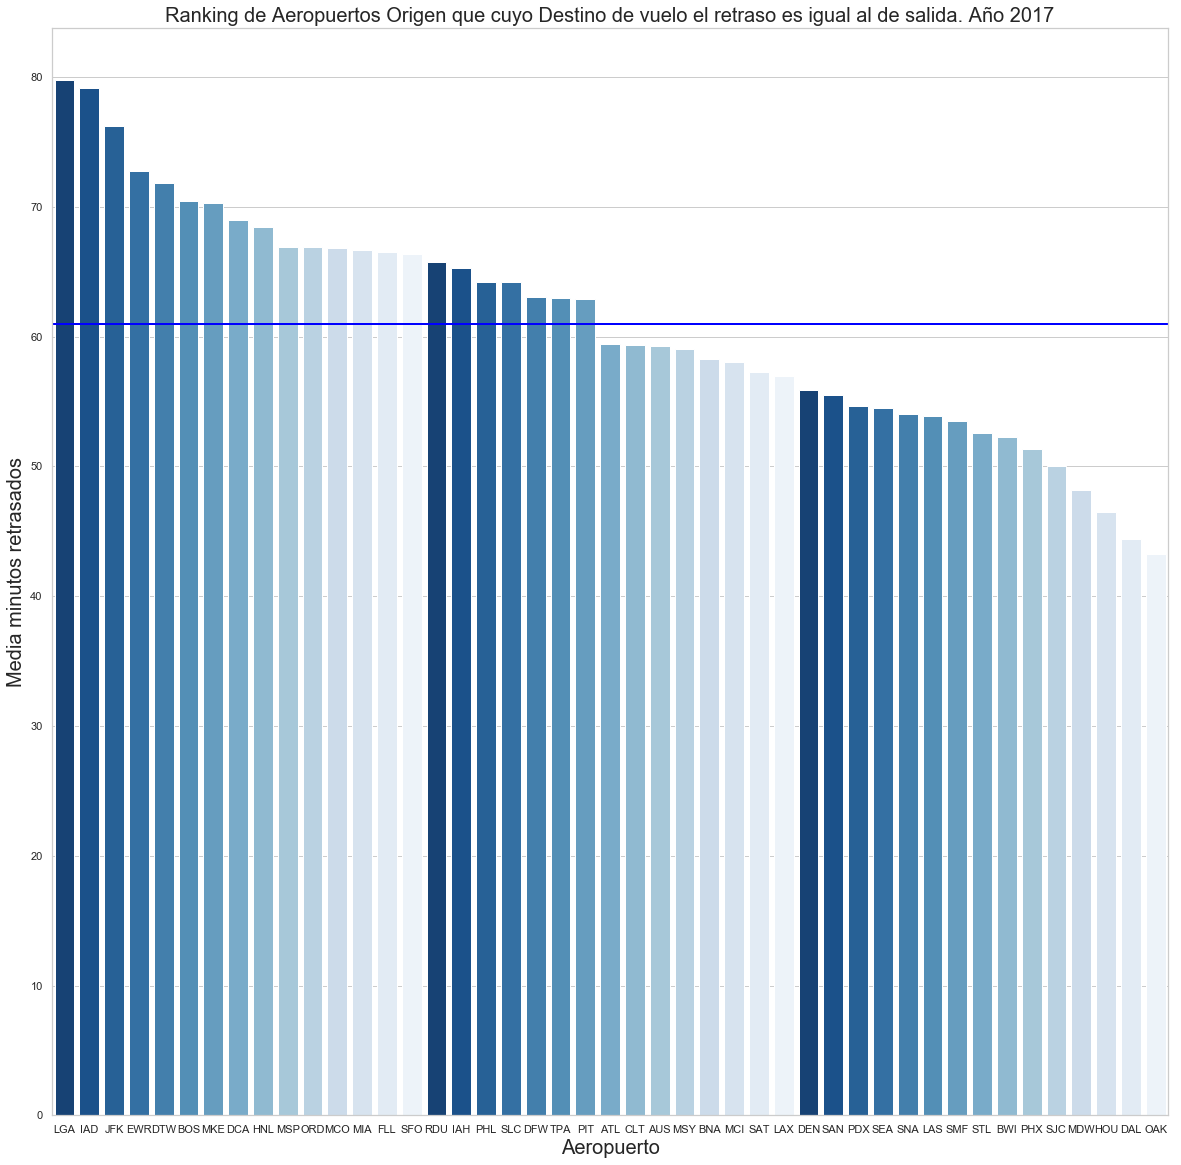

In [112]:
#Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", 15)# len(retrasosSalidaIgualLlegadaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoOrigen.index, y=retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

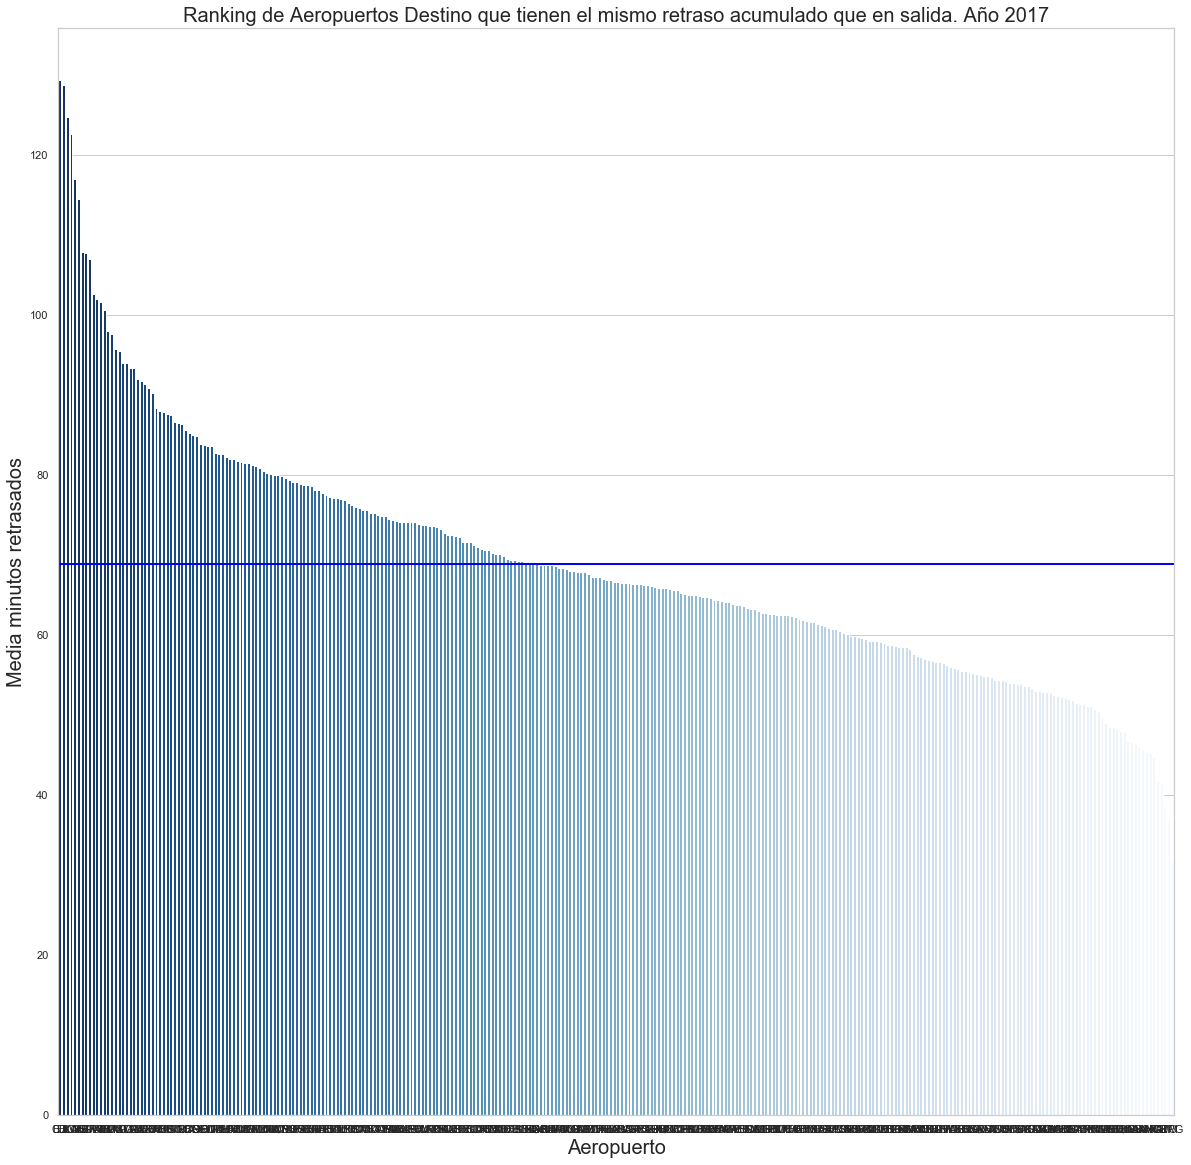

In [113]:
#Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoDestino.index, y=retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

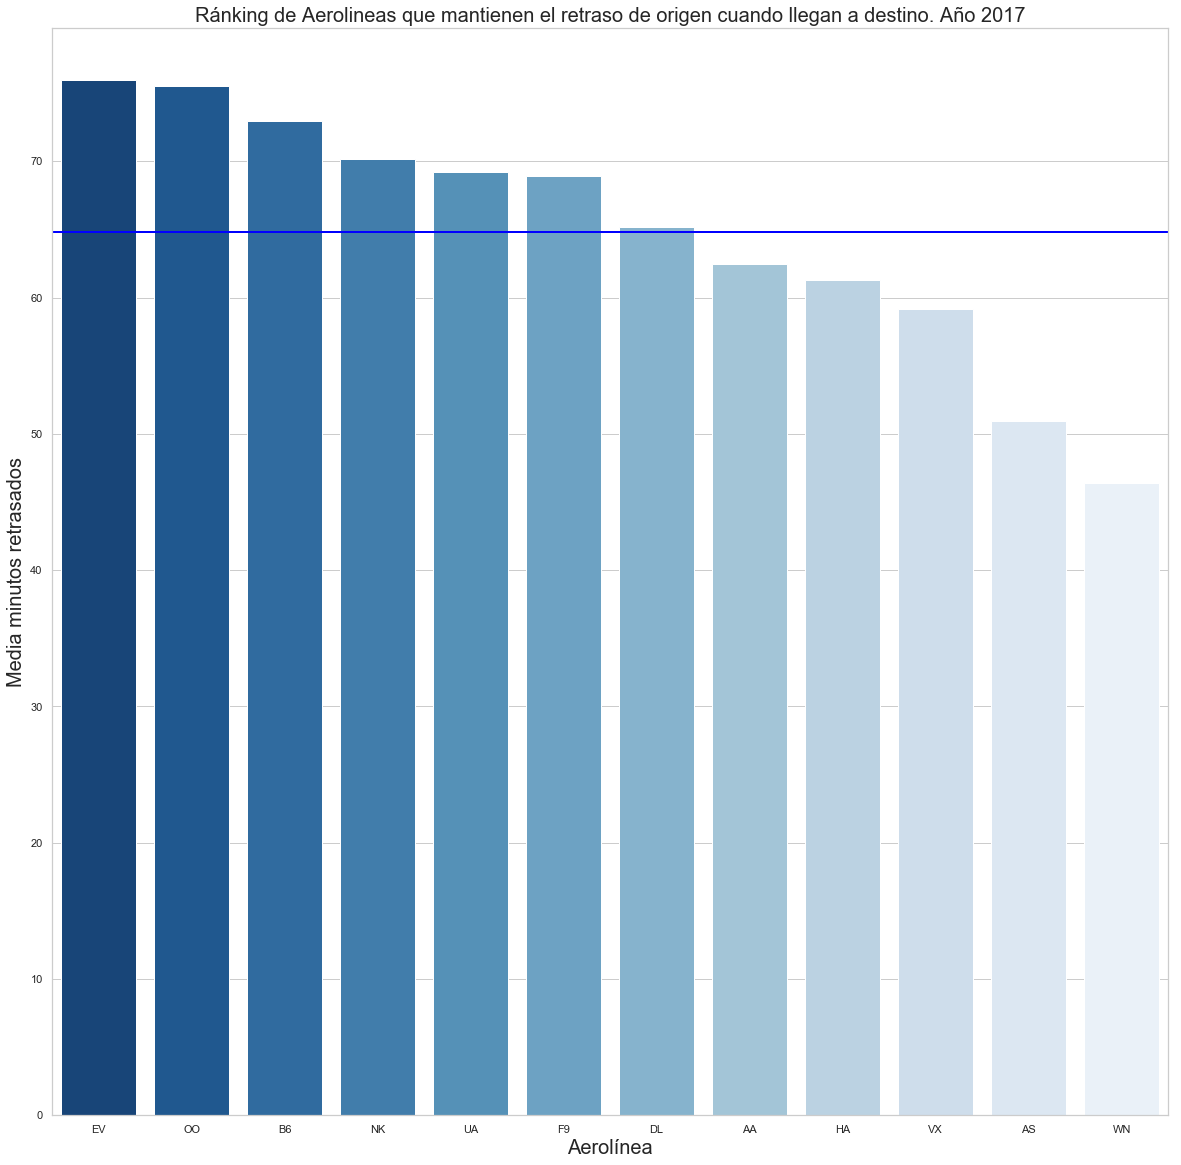

In [114]:
#Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAerolinea))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAerolinea.index, y=retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

In [115]:
#el índice de este DataFrame contiene lo que había en DistanceGroups
#que son los rangos de distancias separados en 250 millas
#para las etiquetas del gráfico, en el eje x, lo convertimos a rangos reales para mejorar la comprensión

my_xticks = []
desde = 0
for index, row in retrasosSalidaIgualLlegadaPorDistanciaADestino.iterrows():
    hasta = index * 250
    my_xticks.append(str(desde) + '-' + str(hasta))
    desde = hasta
    
my_xticks

['0-250',
 '250-500',
 '500-750',
 '750-1000',
 '1000-1250',
 '1250-1500',
 '1500-1750',
 '1750-2000',
 '2000-2250',
 '2250-2500',
 '2500-2750']

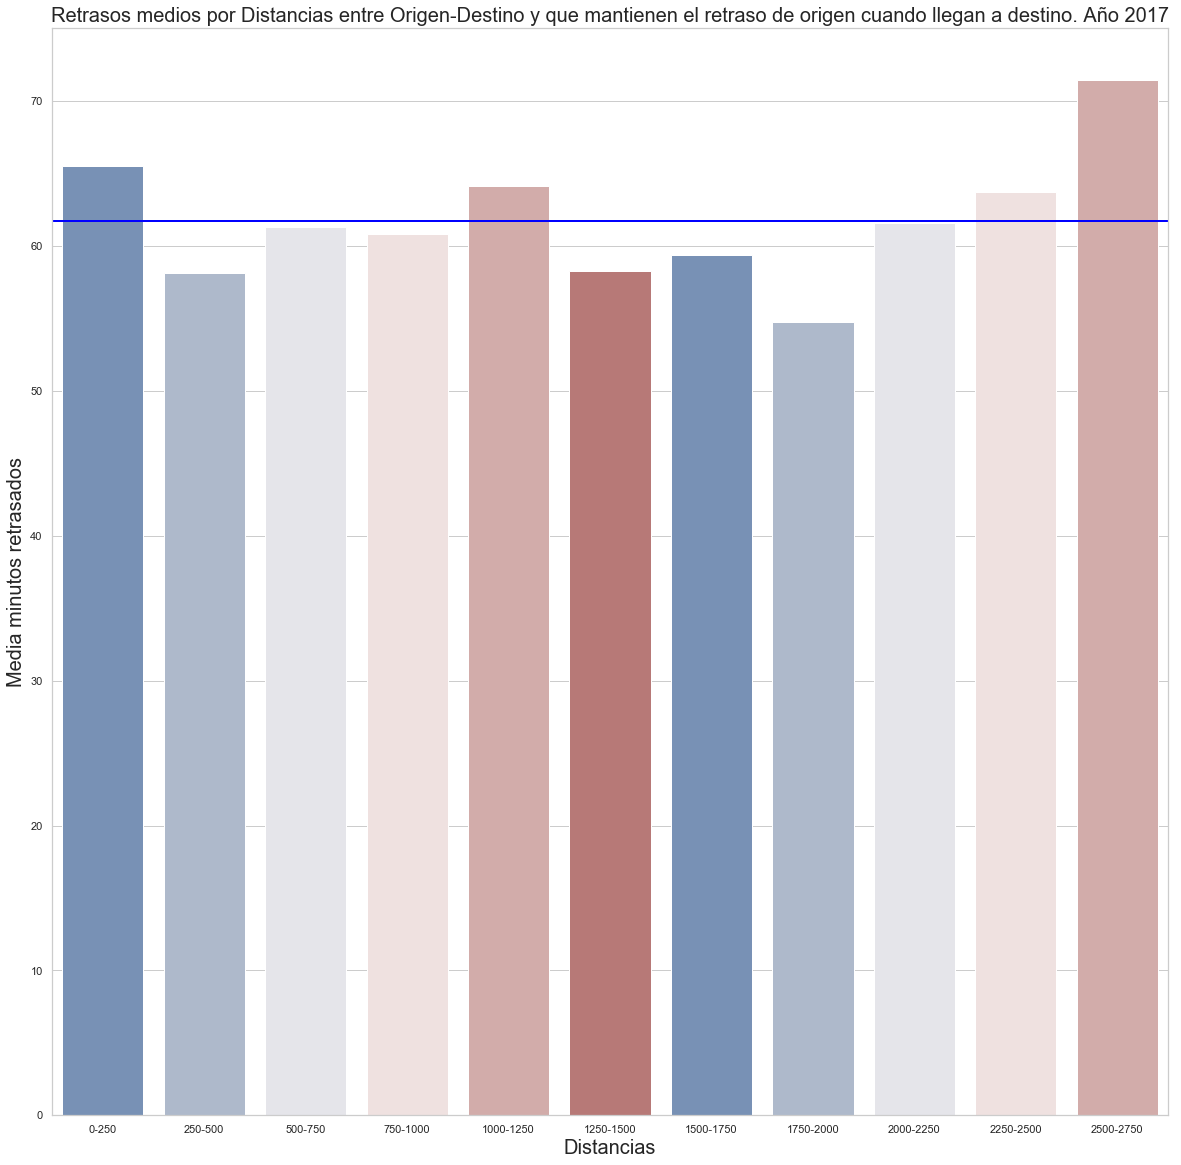

In [116]:
#Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.4 Visualización de Retrasos en Destino que aumentan con respecto al de Origen

In [117]:
#cálculo de los que el retraso aumenta en Destino con respecto al retraso de Origen
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosPosterioresSalidaPorAeropuertoOrigen = pd.DataFrame(retrasosPosterioresSalida.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAeropuertoDestino = pd.DataFrame(retrasosPosterioresSalida.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAerolinea = pd.DataFrame(retrasosPosterioresSalida.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorDistanciaADestino = pd.DataFrame(retrasosPosterioresSalida.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorDistanciaADestino = retrasosPosterioresSalidaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [118]:
#ordenamos por de mayor a menor retraso
retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


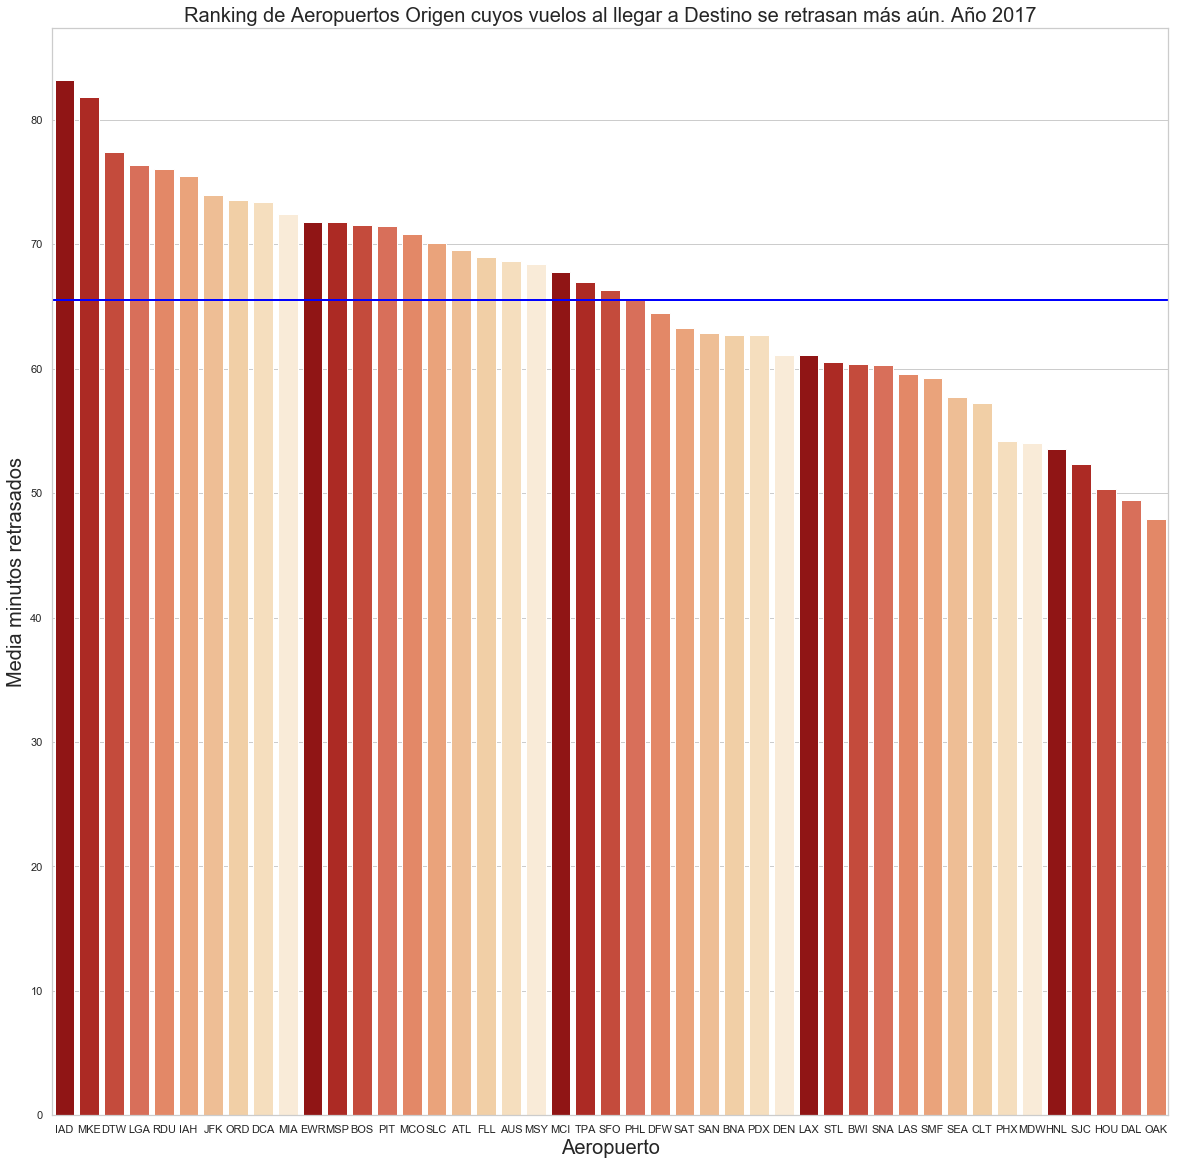

In [119]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", 10) #len(retrasosPosterioresSalidaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoOrigen.index, y=retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

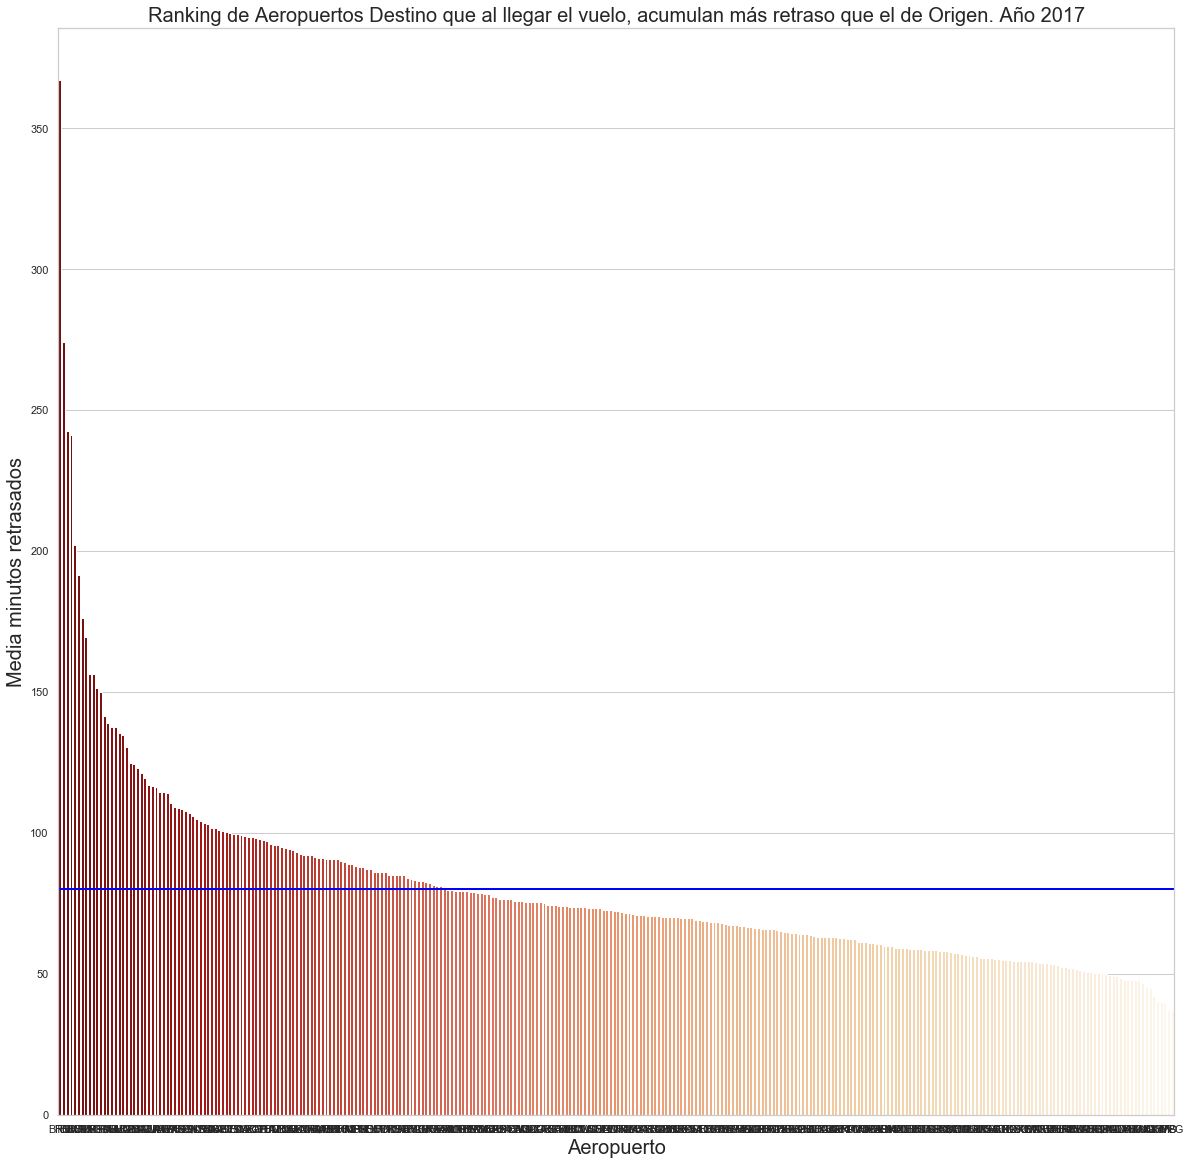

In [120]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoDestino.index, y=retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

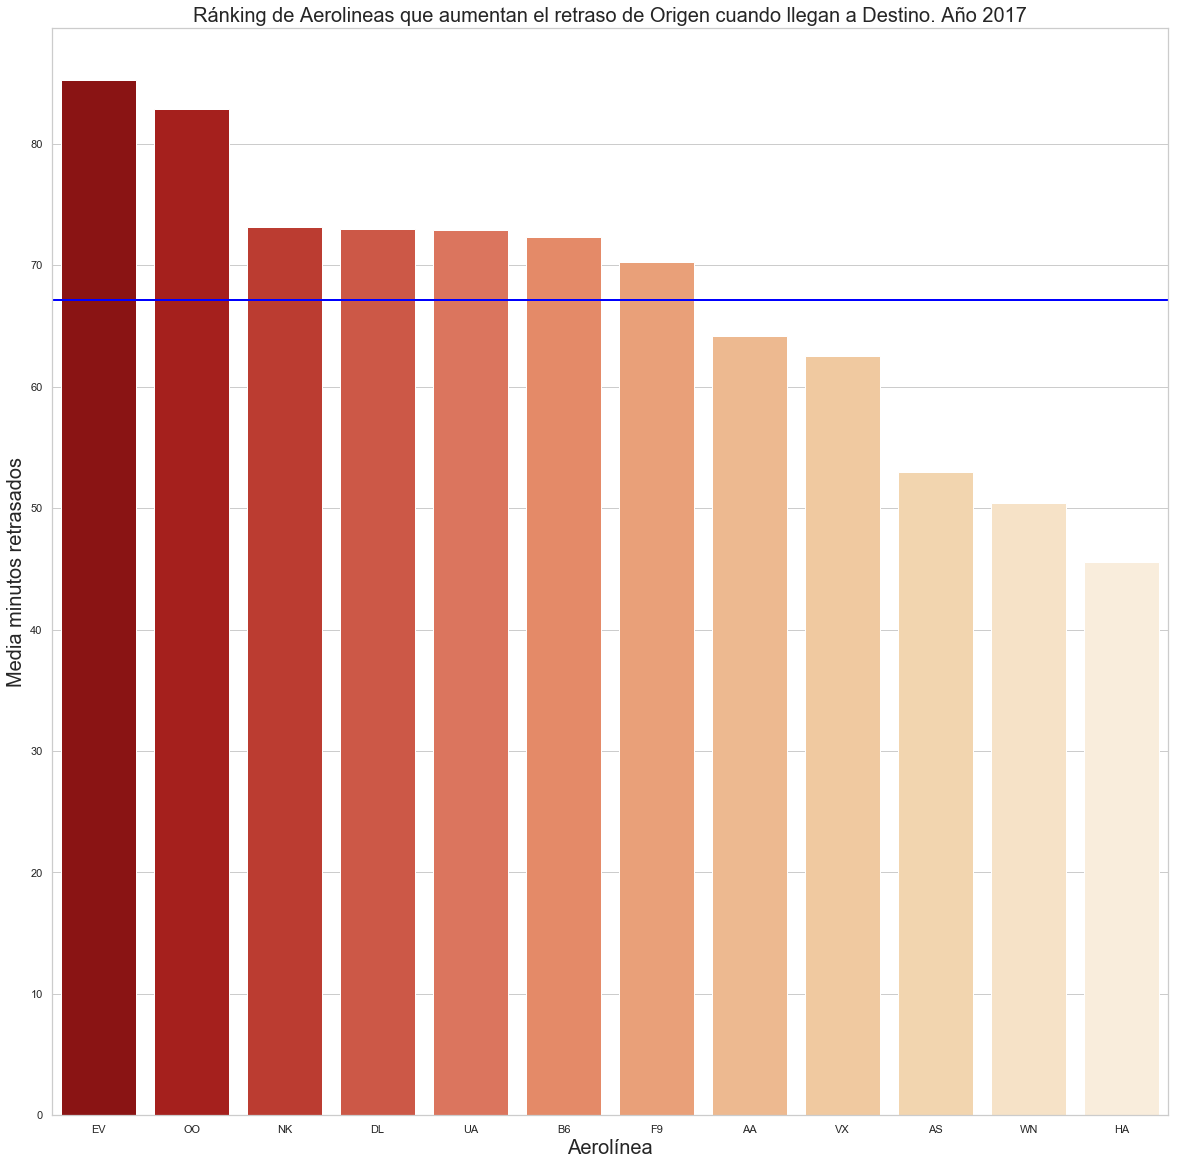

In [121]:
#Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAerolinea))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAerolinea.index, y=retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

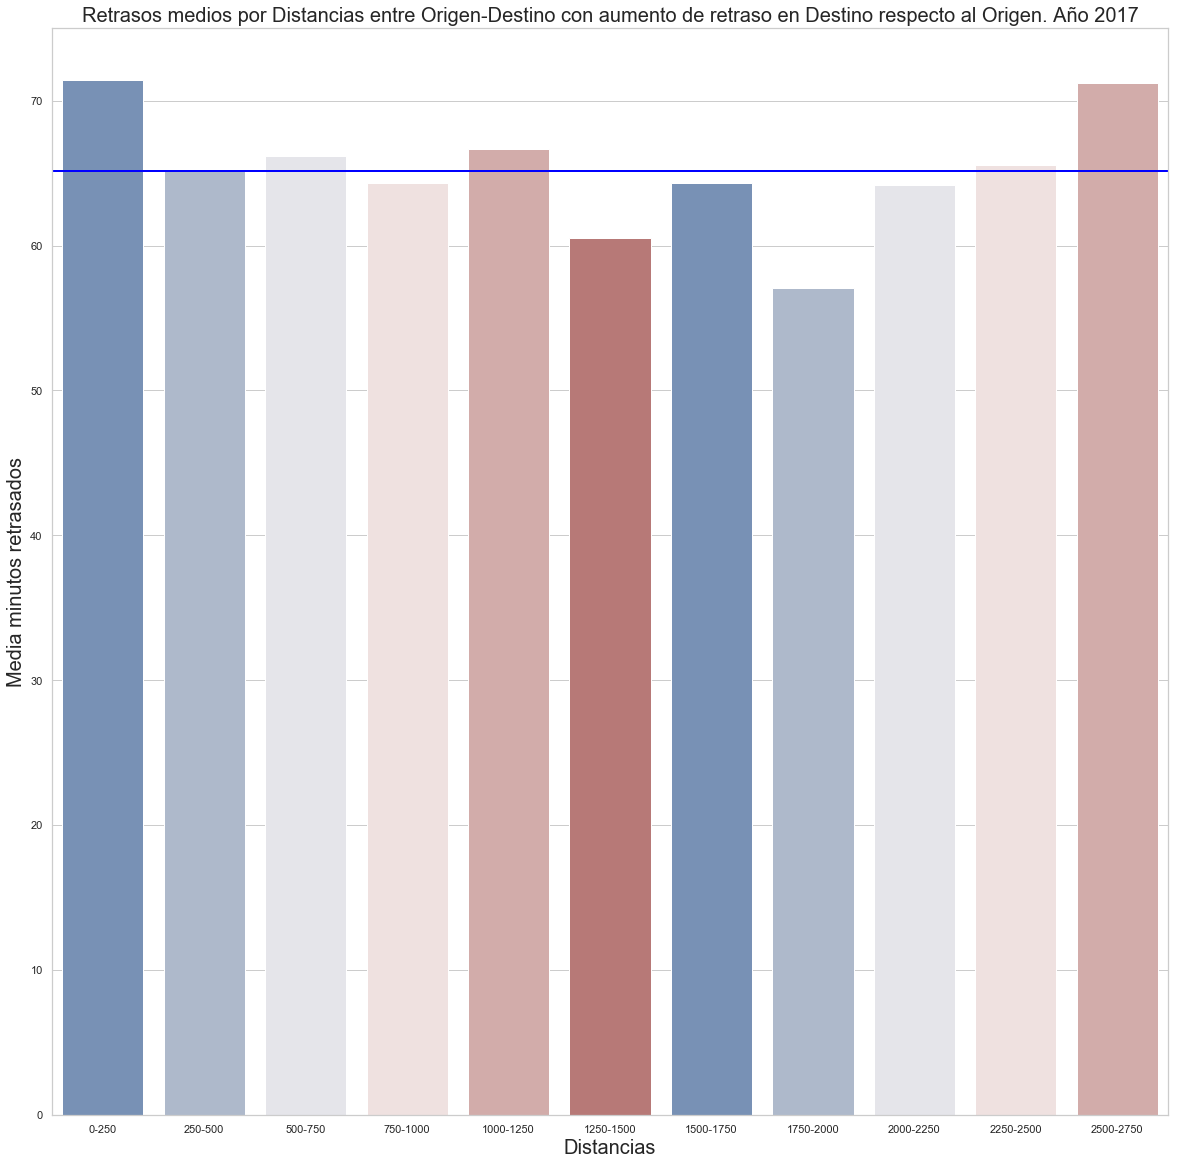

In [122]:
#Retrasos medios por Distancias entre Origen-Destino y que aumenta el retraso en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino con aumento de retraso en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.5 Visualización de Recuperación del tiempo de retraso, de Origen, en Destino.

In [123]:
#cálculo de los que el retraso de origen se recupera al llegar al Destino
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosRecuperadosPorAeropuertoOrigen = pd.DataFrame(retrasosRecuperados.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAeropuertoDestino = pd.DataFrame(retrasosRecuperados.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAerolinea = pd.DataFrame(retrasosRecuperados.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorDistanciaADestino = pd.DataFrame(retrasosRecuperados.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorDistanciaADestino = retrasosRecuperadosPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [124]:
#ordenamos por de mayor a menor retraso
retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


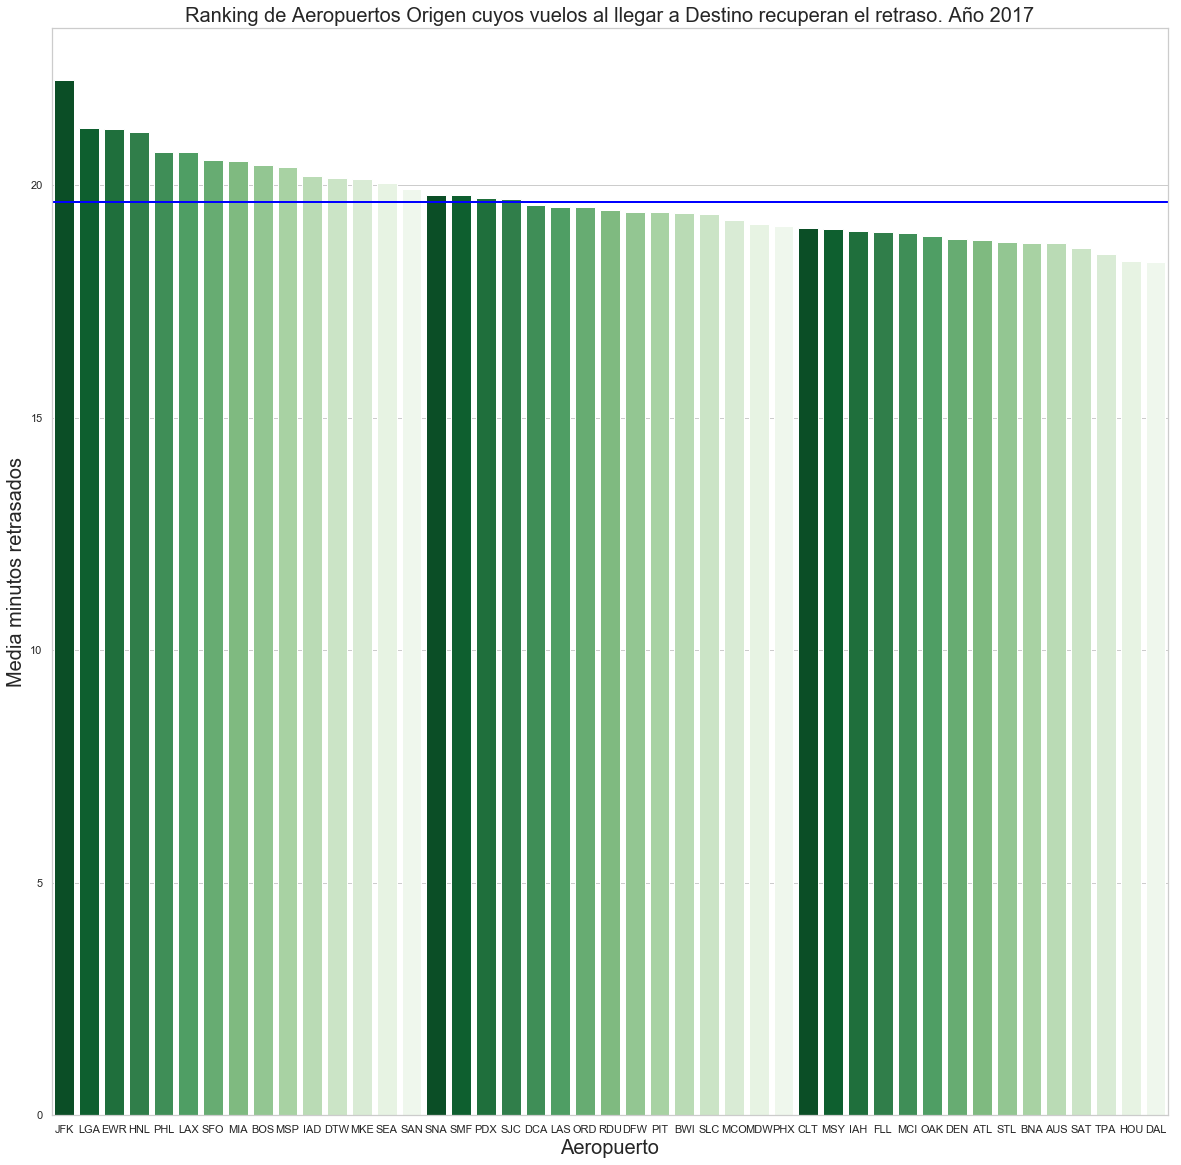

In [125]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", 15) #len(retrasosRecuperadosPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoOrigen.index, y=retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

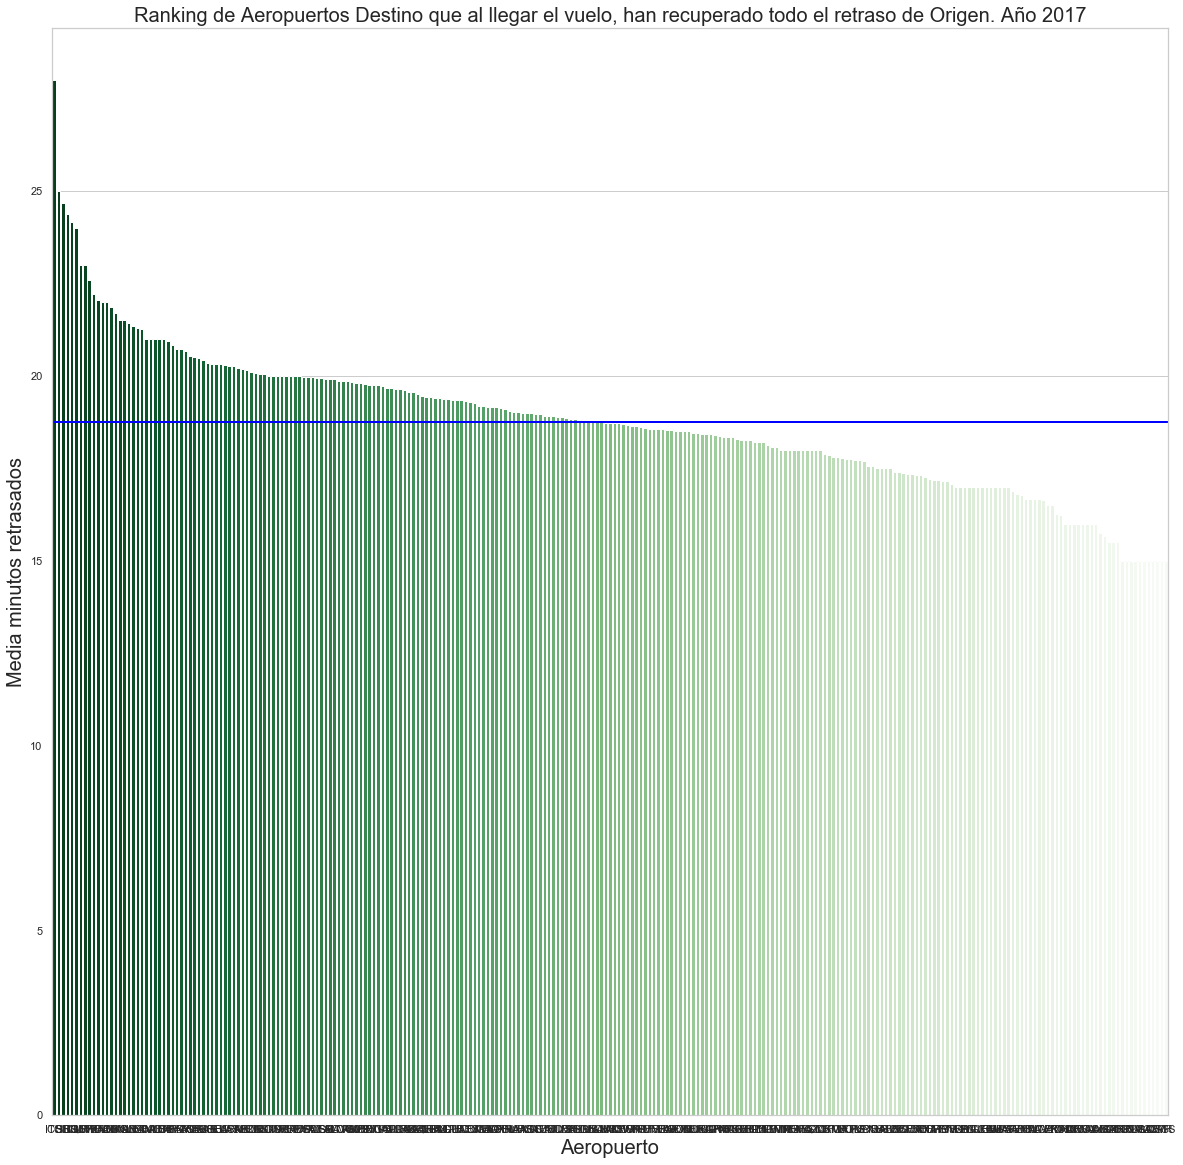

In [126]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAeropuertoDestino))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoDestino.index, y=retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

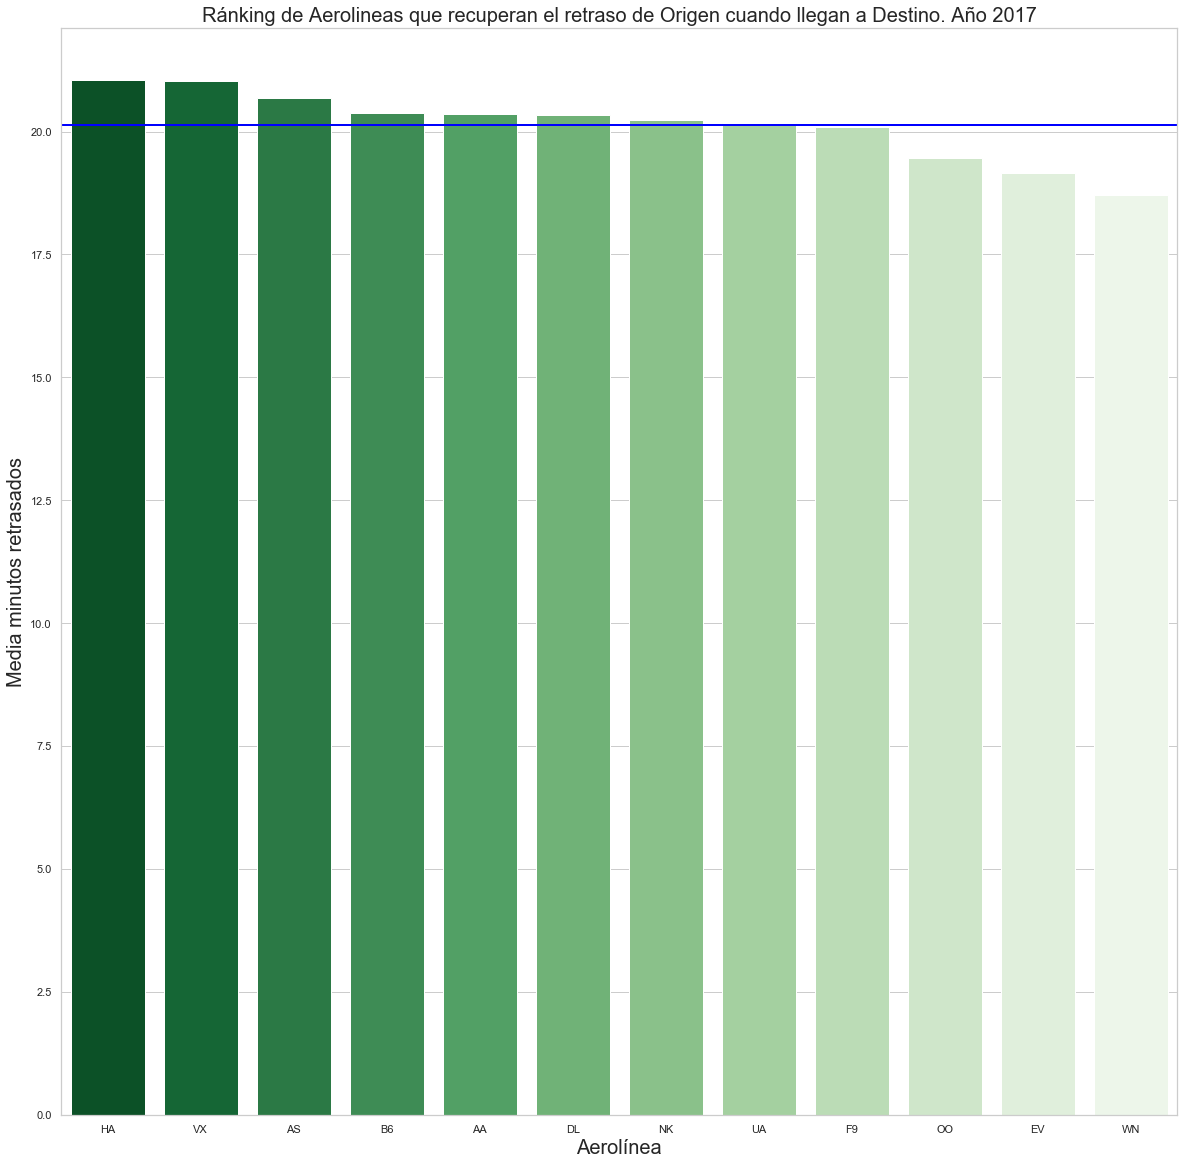

In [127]:
#Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAerolinea))
ax = sns.barplot(x=retrasosRecuperadosPorAerolinea.index, y=retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

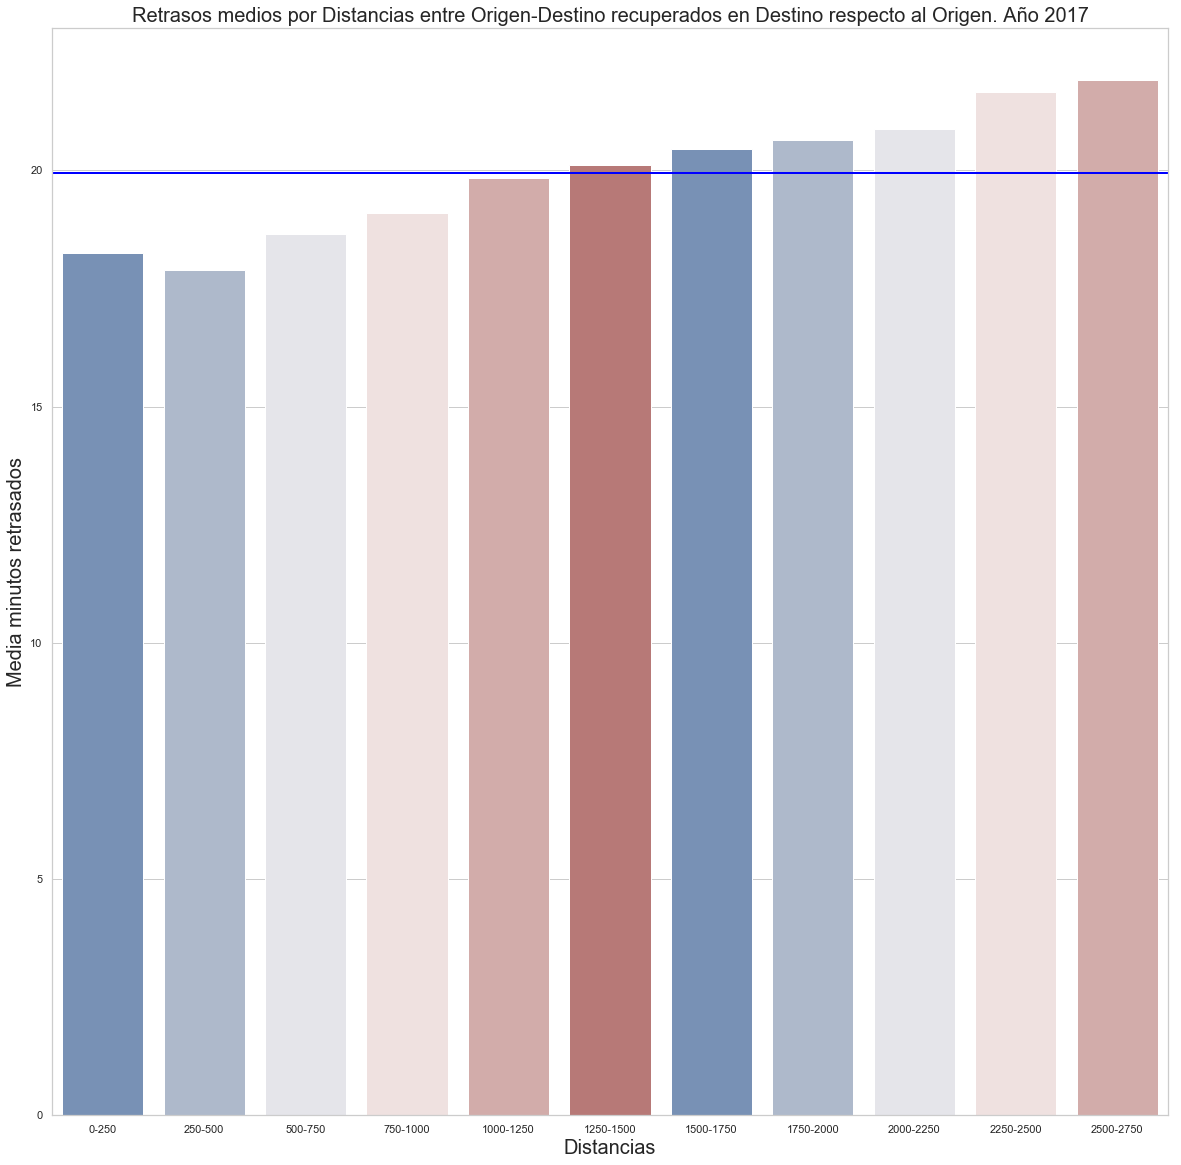

In [128]:
#Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.6 Conclusiones: 

Vuelos que recuperan el tiempo de retraso que acumulaban en Origen
1. Para que en Destino se recupere el tiempo de retraso de Origen, la media de minutos en Origen debe estar entre 17,5 y 21 minutos.
2. Para la recupearción del retraso, cuanto mayor sea la distancia a Destino más tiempo se recupera, es bastante lineal.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, recuperan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste. 

Vuelos que se retrasan más, al llegar a Destino, respecto al retraso de Origen
1. Más de 50 minutos de retraso en Origen, supone con gran probabilidad que en Destino se aumente aún más el retraso.
2. En el caso de aumento de retraso, no parece influir demasiado la distancia sobre el aumento del mismo, sólo destaca un poco en el caso de los vuelos de entre 2.500 y 2.750 millas.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, aumentan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.


Vuelos que consiguen Mantener el retraso en Destino
1. Aquellos vuelos que salen entre 40 y 65 minutos tarde en Origen, pueden conseguir no retrasarse más a la llegada a Destino. 
2. 9 de los 10 aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, el vuelo, mantener el retraso, sin aumentarlo, son de la costa Este y Medio Este.
3. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.
4. La distancia tampoco parece clave en el mantenimiento del retraso de Origen a la llegada, en el caso de los vuelos más largos (2.500 y 2.750 millas) sí parece ayudar conseguir mantenerse en el caso de los retrasos más altos.

Aerolíneas

1. Express Airlines parece que es la que destaca con los retrasos en las 3 situaciones.
2. Otra de las destacadas que suele estar entre las primeras es United Airlines y JetBlue
3. Por el contrario, parece que Southwest y Frontier son las aerolíneas con menor retraso en los aeropuertos principales.
4. Compañías relevantes como American Airlnes y Delta, están en los 3 casos en la media de retrasos, siendo Delta mejor.


Parece que es relevante en la media de minutos retrasados que la zona geográfica sea la de la Costa Este y el Medio Este de Estados Unidos, y viceversa. 
Sin embargo una cosa son los minutos retrasados, y otra el número de vuelos retrasados, en la que la ubicación geográfica no es tan evidente, sino que parece que es la densidad del tráfico nacional.
Parece que con hasta un máximo de 30 minutos de retraso, se puede recuperar el tiempo en Destino.





### 1.3.4 Visualización de retrasos medios en Origen por Rutas

In [129]:
retrasosSalidaIgualLlegada.shape

(608338, 112)

In [130]:
retrasosSalidaIgualLlegadaPorRuta = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [131]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)


In [132]:
retrasosSalidaIgualLlegadaPorRuta.head(15)

VuelosTotales  MediaRetrasoTotal
Route                                    
IAD-MDT              1         752.000000
DFW-BRO              1         441.000000
SFO-EGE              1         317.000000
LGA-SAT              1         282.000000
PHX-LGB              1         214.000000
HNL-IAD             18         178.888889
PHX-SBA              1         175.000000
SLC-ASE             31         171.354839
PHX-SGU             22         171.045455
JFK-EGE             16         169.062500
SAT-MSP             25         167.600000
MSP-CIU              7         166.857143
MSP-AZO             16         166.562500
SLC-MTJ              2         163.500000
EWR-CVG             14         163.428571

In [133]:
#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosSalidaRutaConPesos = retrasosSalidaIgualLlegadaPorRuta

retrasosSalidaRutaConPesos['Peso'] = retrasosSalidaRutaConPesos['VuelosTotales'] * retrasosSalidaRutaConPesos['MediaRetrasoTotal']

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosSalidaRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal      Peso
Route                                              
LAX-SFO           2532          66.859795  169289.0
LAX-JFK           2445          66.008589  161391.0
SFO-LAX           2061          67.495876  139109.0
SFO-JFK           1620          77.371605  125342.0
MCO-EWR           1528          80.653796  123239.0
JFK-LAX           1599          69.278924  110777.0
LGA-ATL           1385          79.298195  109828.0
MCO-JFK           1162          90.671256  105360.0
FLL-EWR           1220          85.176230  103915.0
SFO-LAS           1518          61.776680   93777.0
EWR-MCO           1283          73.005456   93666.0
LGA-ORD           1179          77.949958   91903.0
FLL-JFK            980          93.051020   91190.0
ATL-EWR           1355          66.205904   89709.0
SFO-SEA           1442          61.717753   88997.0

Ya parece que salen las más relevantes, vamos a quedarnos con las 20 primeras

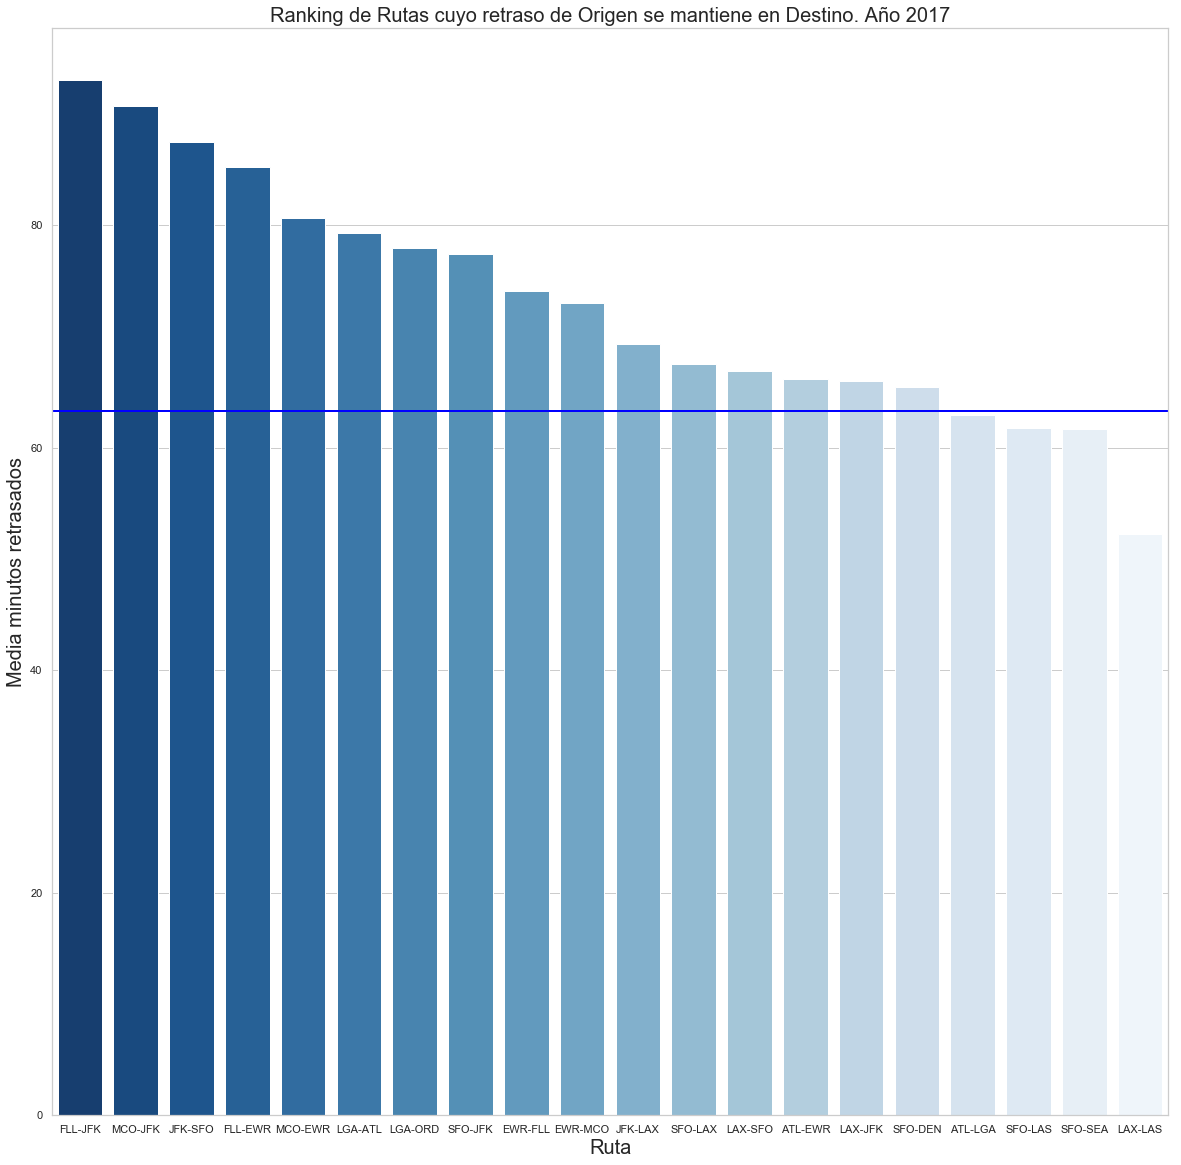

In [134]:
retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.head(20)

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se mantiene en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaRutaConPesos))
ax = sns.barplot(x=retrasosSalidaRutaConPesos.index, y=retrasosSalidaRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se mantiene en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorRuta['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

La mayoría son rutas que salen de Atlanta (ATL) y de Newark (EWR) o de Chicago (ORD), son de la Costa Este, también de la costa Oeste son relavantes SFO (San Francisco) y LAX (Los Ángeles), pero predominan rutas que salen y llegan en la Costa Este.

Miremos ahora los otros dos casos, con mayor retraso en Destino, y con Recuperación del tiempo

In [135]:
retrasosPosterioresSalidaPorRuta = pd.DataFrame(retrasosPosterioresSalida.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [136]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRuta

retrasosPosterioresSalidaPorRutaConPesos['Peso'] = retrasosPosterioresSalidaPorRutaConPesos['VuelosTotales'] * retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal']

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosPosterioresSalidaPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal      Peso
Route                                              
LAX-SFO           2328          73.721649  171624.0
SFO-LAX           1884          62.149151  117089.0
LAS-SFO           1229          66.704638   81980.0
SAN-SFO           1038          73.355491   76143.0
SEA-SFO           1102          68.841198   75863.0
DEN-SFO            879          74.923777   65858.0
LAX-JFK            860          75.482558   64915.0
LAS-LAX           1158          55.244387   63973.0
JFK-SFO            696          83.840517   58353.0
MCO-EWR            750          76.936000   57702.0
ORD-SFO            776          72.960052   56617.0
JFK-LAX            841          66.529132   55951.0
ORD-LGA            789          70.730038   55806.0
SFO-SEA            870          60.334483   52491.0
ATL-EWR            682          75.258065   51326.0

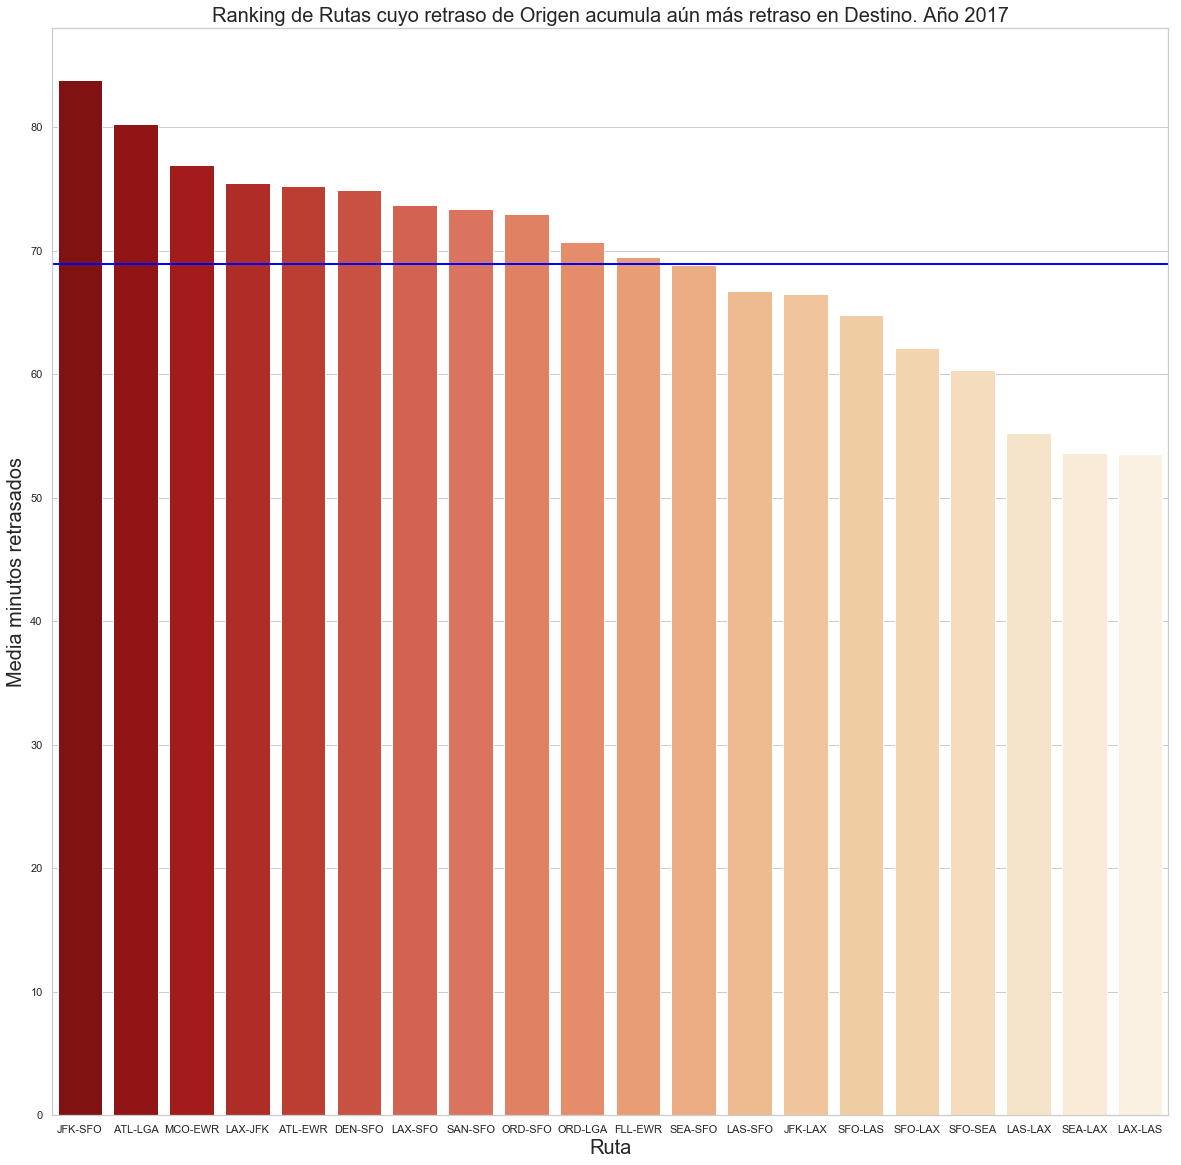

In [137]:
retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.head(20)

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen aumenta Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorRutaConPesos))
ax = sns.barplot(x=retrasosPosterioresSalidaPorRutaConPesos.index, y=retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen acumula aún más retraso en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

En este caso aumenta claramente la prevalencia de aeropuertos de la parte Este de Estados Unidos, es más, los vuelos parecen que casi todos son entre aeropuertos de esta parte de USA, especialemente a Atlanta, el de mayor tráfico de USA, por lo que se apuntan dos cosas vistas en los gráficos anteriores, con menor distancia no da tiempo a recuperar el retraso y que la mayoría de los aeropuertos con esta circunstancia son de la parte Este de USA, con una media de retraso por encima de los 60 minutos.

Veamos, por último, los vuelos que recuperan el tiempo.

In [138]:
retrasosRecuperanPorRuta = pd.DataFrame(retrasosRecuperados.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRuta

retrasosRecuperanPorRutaConPesos['Peso'] = retrasosRecuperanPorRutaConPesos['VuelosTotales'] * retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal']

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosRecuperanPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal     Peso
Route                                             
LAX-JFK            446          22.562780  10063.0
JFK-LAX            293          22.675768   6644.0
SFO-JFK            262          22.618321   5926.0
LGA-ATL            218          21.481651   4683.0
ORD-LAX            190          22.000000   4180.0
LAX-HNL            189          21.460317   4056.0
LAX-ATL            197          20.015228   3943.0
JFK-SFO            158          23.101266   3650.0
LAX-ORD            163          20.944785   3414.0
LAX-DTW            151          22.450331   3390.0
DFW-LAX            154          20.759740   3197.0
MIA-LAX            129          23.806202   3071.0
LAX-MSP            147          20.870748   3068.0
BOS-LAX            136          22.338235   3038.0
ATL-LAX            146          20.650685   3015.0

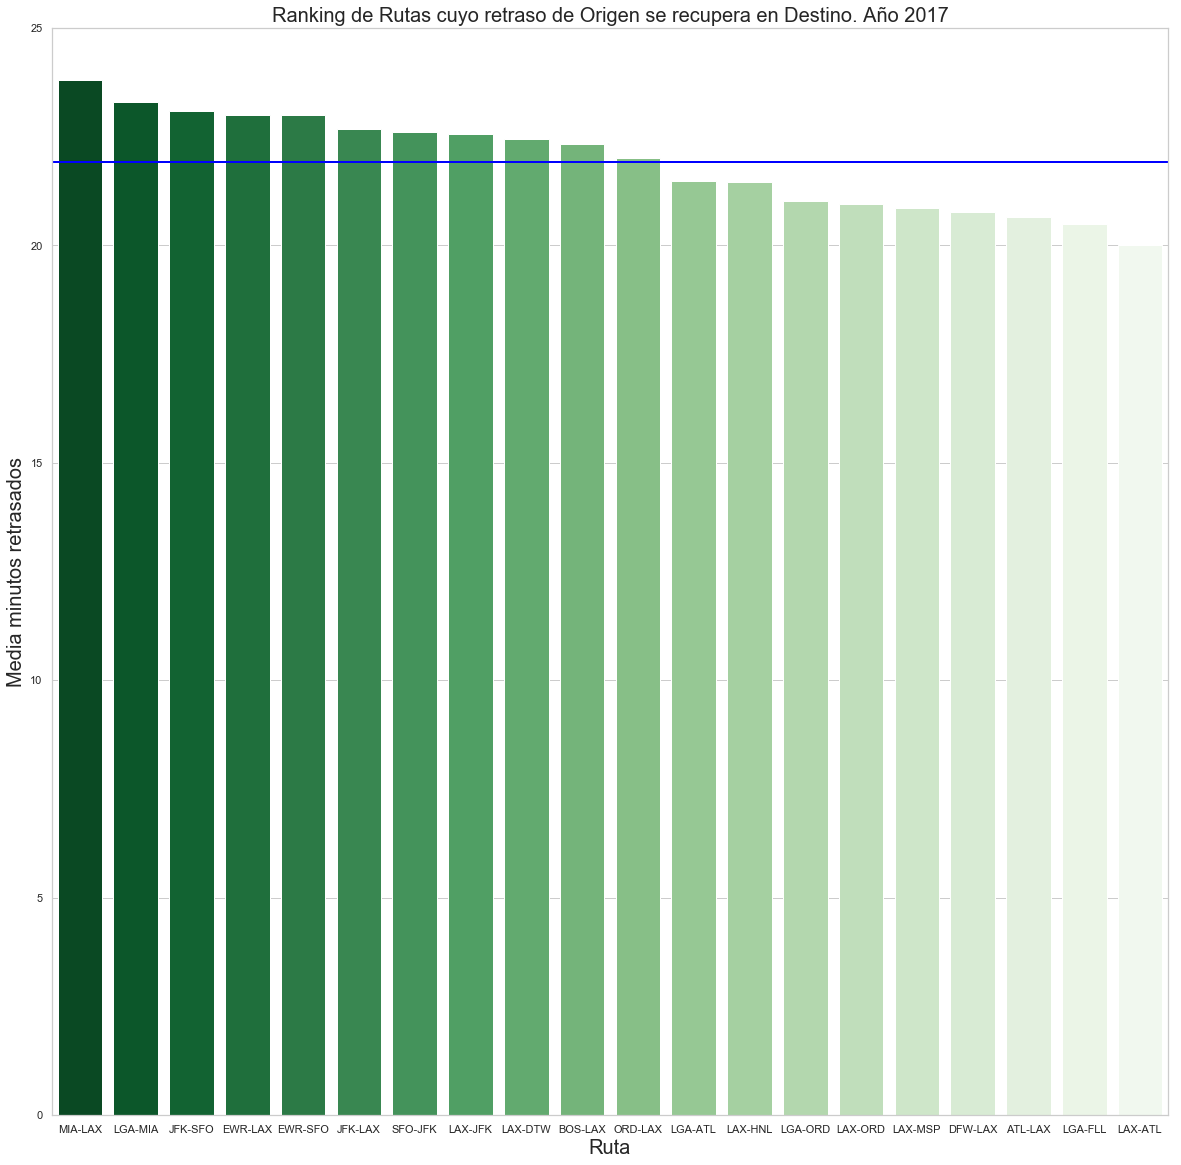

In [139]:
retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.head(20)

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se recupera en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperanPorRutaConPesos))
ax = sns.barplot(x=retrasosRecuperanPorRutaConPesos.index, y=retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se recupera en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

Una vez más, prevalecen los aeropuertos de la Costa Este, pero en este caso, las distancias de la ruta son mayores, casi todos vuelan al Oeste. Y claramente, como se vio en los apartados anteriores por aeropuertos, el menor número de minutos de retrasos es recuperable, y más aún si la distancia es grande, como es el caso. La media de tiempo de retraso de estas rutas prácticamente coincide con la del caso de los aeropuertos.

### 1.3.4.1 Conclusiones:

Parece que mirando los retrasos en Origen por Rutas, se confirman los datos que se vieron en el apartado anterior por Aeropuertos.

Parece claramente que en un modelo de predicción, el peso de la Costa Este de USA, en cuanto a los retrasos, es mayor que en la Costa Oeste.

Deberíamos etiquetar a los aeropuertos por la zona geográfica en la que están y que los modelos se orienten a cada una de las zonas geográficas

## 1.3.5 Análisis de Retrasos en Destino

#### Ahora veamos cómo es el comportamiento de los retrasos en llegadas

#### Vuelos que se han retrasado al menos 15 minutos en la llegada 

In [140]:
#Vuelos que se han retrasado al menos 15 minutos en la llegada
len(dfanual[dfanual['ArrDel15'] == 1])

1029474

In [141]:
#retrasos por mes en llegadas

vuelosTotalesRetrasadosDestinoPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosDestinoPorMes = vuelosTotalesRetrasadosDestinoPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1)])}, ignore_index=True)


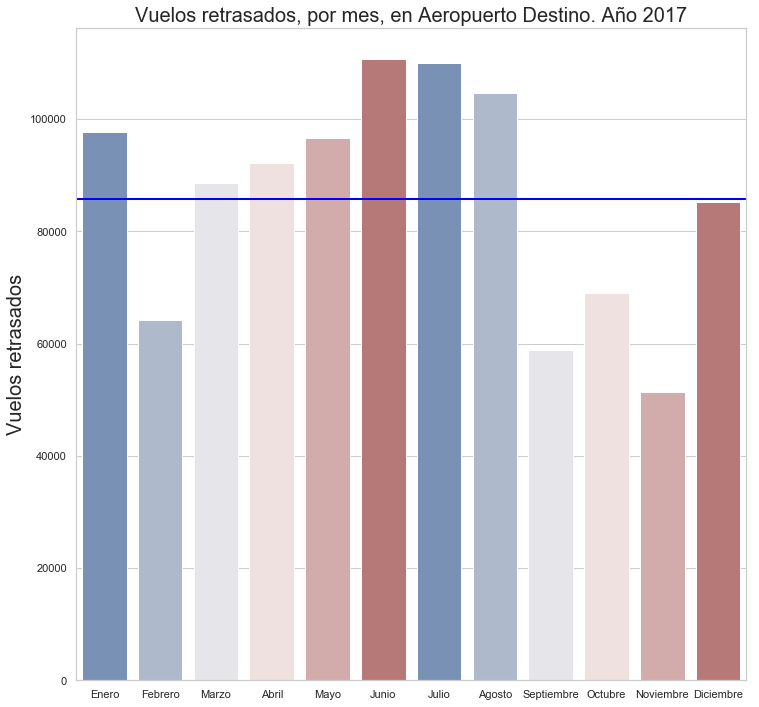

In [142]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosDestinoPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados, por mes, en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosDestinoPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

De las múltiples combinaciones de los retrasos, motivos, si en origen , si en destino, si en ambos, etc. Vamos a ver primero cuántos hay retrasados, ya vimos en el apartado correspondiente de retrasos en origen, cuántos mantenían su retraso en la llegada, se recuperaban o aumentaban más el retraso de origen. Vamos a ver, nuevos casos: 
1. Retrasos que sólo ocurren en Destino, es decir, en Origen no tenían retraso.
2. Volveremos a ver los retrasados en Destino, y que en origen también estaban retrasados.
3. Iremos viéndolos también, por aeropuertos más retrasados, con más vuelos, por zonas geográficas, tipos de retraso, aerolíneas, etc.

### 1.3.5.1 Vuelos retrasados sólo en Destino

In [143]:
#vuelos retrasados en Destino pero que salieron en hora en Origen
len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

225050

In [144]:
vuelosRestrasadosSoloEnDestino = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnDestino = vuelosRestrasadosSoloEnDestino.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1) & (df['DepDel15'] == 0)])}, ignore_index=True)


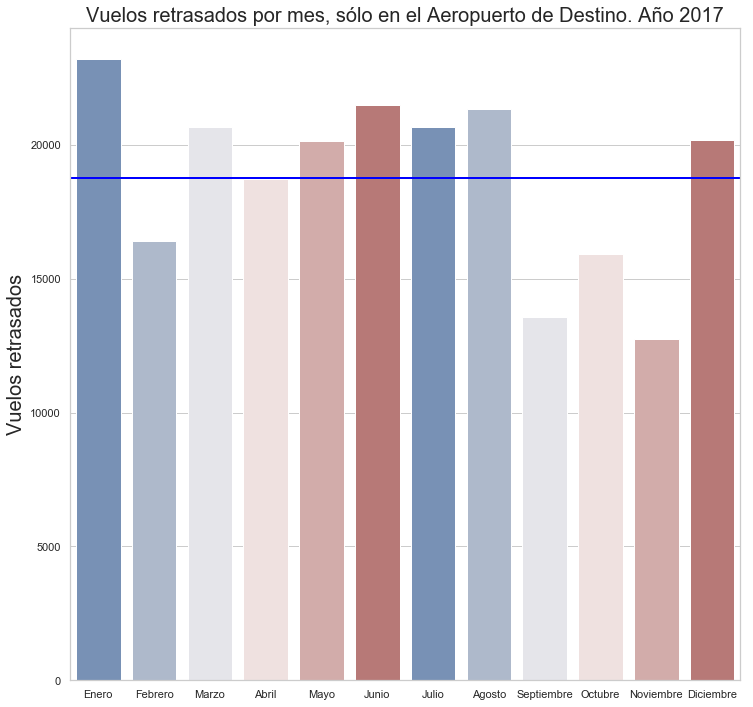

In [145]:
#Vuelos retrasados por mes sólo en destino, es decir, en origen salieron puntuales

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnDestino['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnDestino['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [146]:
retrasosSoloDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [147]:
retrasosSoloDestino = pd.DataFrame(retrasosSoloDestino['ArrDelay'])

retrasosSoloDestino.head(5)

ArrDelay
7       21.0
10      18.0
13      23.0
36      25.0
47      27.0

In [148]:
retrasosSoloDestino.describe().T

count       mean        std   min   25%   50%   75%    max
ArrDelay  225050.0  26.778476  15.574666  15.0  17.0  22.0  30.0  467.0

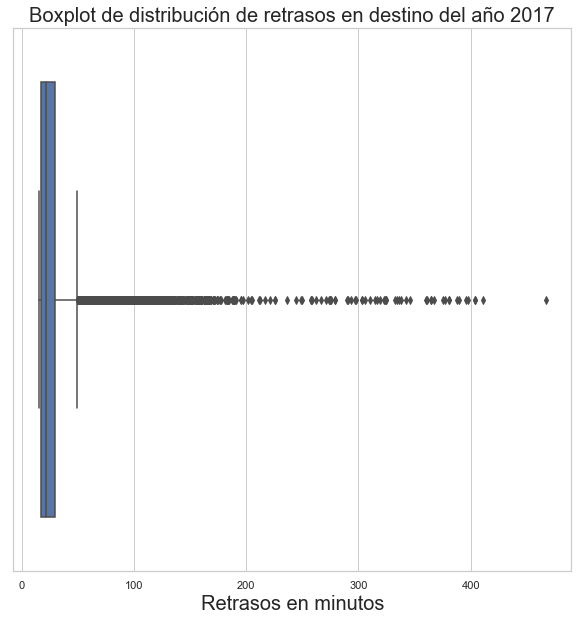

In [149]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino del año ' + year, fontsize=20)
plt.show()

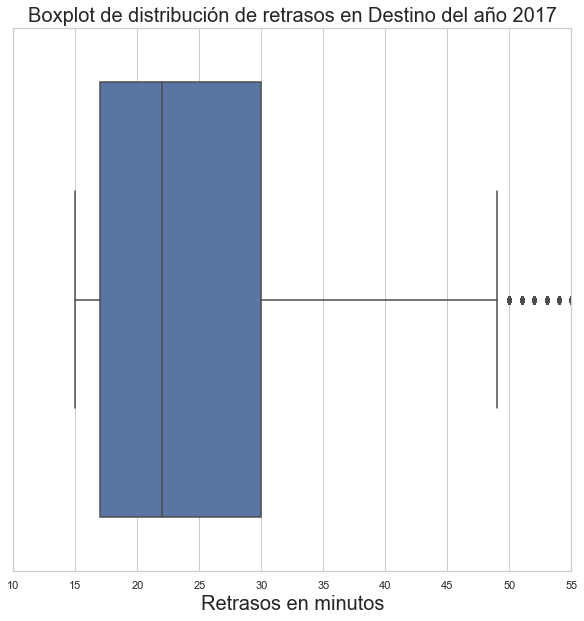

In [150]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,55)
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en Destino del año ' + year, fontsize=20)
plt.show()

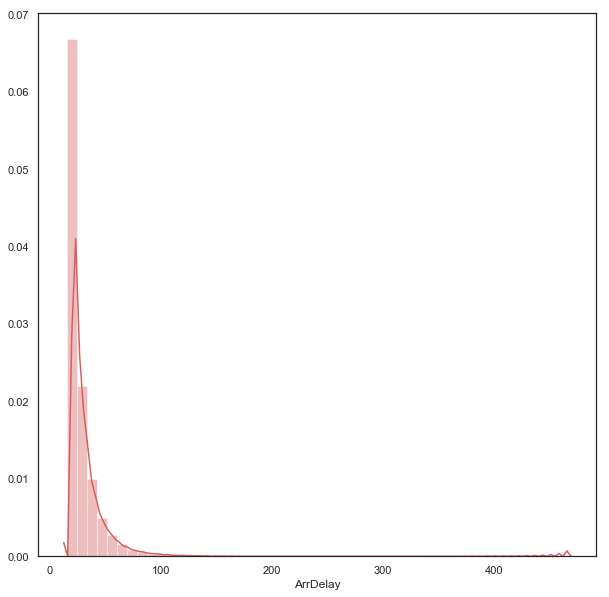

In [151]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")

plt.show()

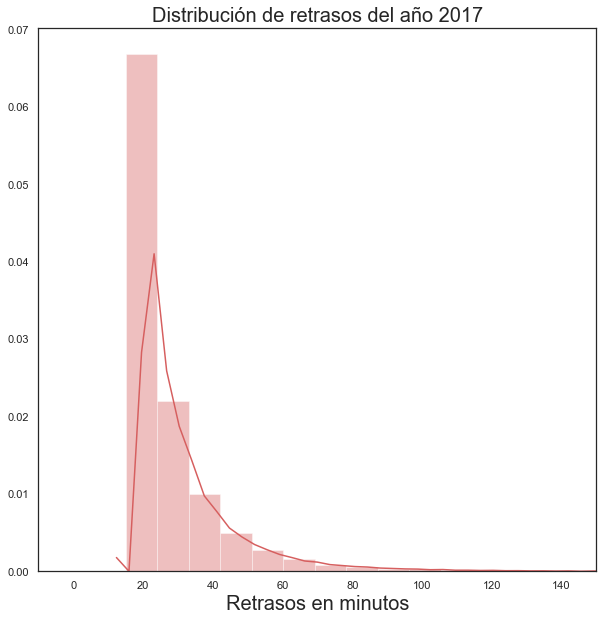

In [152]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,150)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 100 minutos de retraso

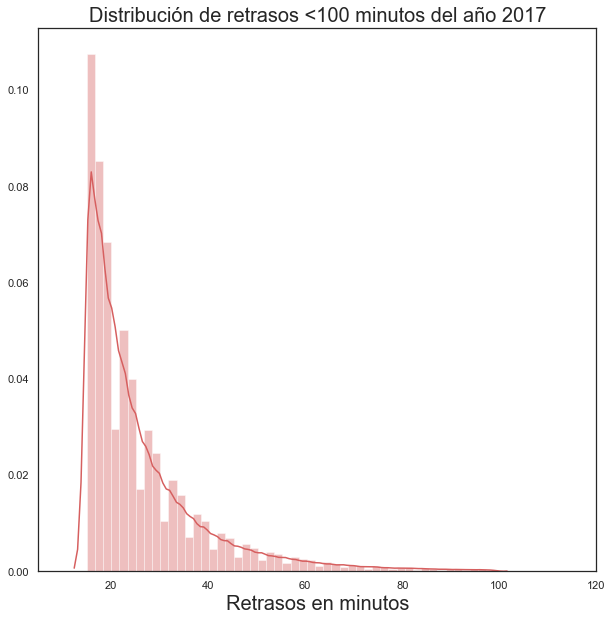

In [153]:
corte100Min = pd.DataFrame(retrasosSoloDestino[retrasosSoloDestino["ArrDelay"]<100])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte100Min["ArrDelay"], color="r")
plt.xlim(5,120)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <100 minutos del año ' + year, fontsize=20)


plt.show()

In [154]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))

In [155]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1              34147  26.839722
2              30555  26.473605
3              32858  26.452553
4              37126  26.561628
5              37073  26.811696
6              24054  27.011433
7              29237  27.433423

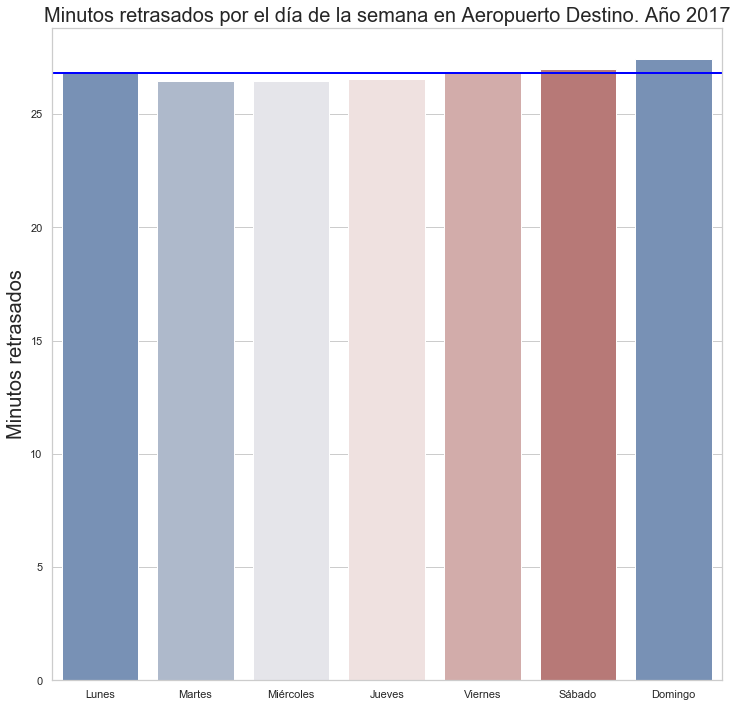

In [156]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [157]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [158]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [159]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559         4705  25.841020
0600-0659         2426  24.928689
0700-0759         6769  25.678830
0800-0859        10823  26.088238
0900-0959        12786  26.192242
1000-1059        13793  26.054520
1100-1159        13174  25.821087
1200-1259        12887  25.886009
1300-1359        12021  26.307296
1400-1459        13137  26.608434
1500-1559        11760  25.967857
1600-1659        15903  26.765579
1700-1759        14283  27.221102
1800-1859        15677  27.898131
1900-1959        15491  27.942676
2000-2059        14595  28.512573
2100-2159        14581  27.642000
2200-2259        11263  27.141792
2300-2359         8976  26.682821

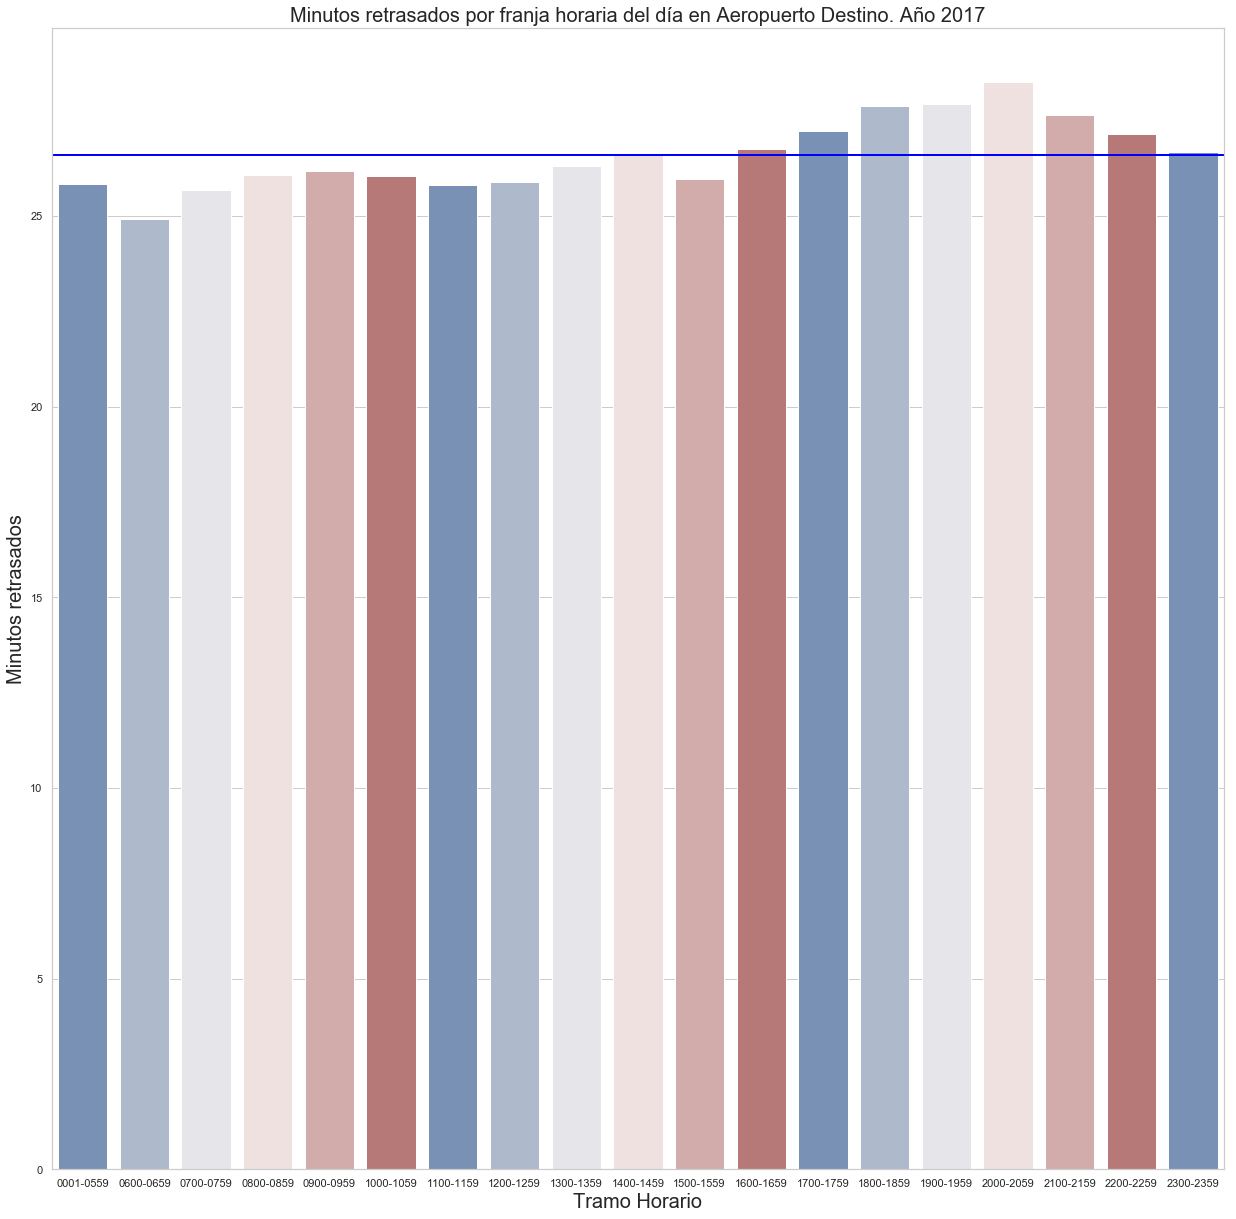

In [160]:

#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [161]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [162]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [163]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                 7321  26.838273
2                 7120  26.923174
3                 7154  27.430249
4                 7435  27.015467
5                 9238  28.773328
6                 8262  27.660373
7                 8867  27.347355
8                 7373  26.017361
9                 7554  27.341144
10                7752  27.589912
11                6690  26.254559
12                7069  25.942708
13                7289  26.804500
14                6277  27.118050
15                6998  25.973135
16                6310  25.246276
17                7678  29.639620
18                7099  27.142274
19                7462  26.256098
20                7315  26.066029
21                7552  26.756621
22                7669  26.221932
23                8285  26.800845
24                8401  26.914177
25                6629  26.251471
26                6811  25.289238
27                7264  25.085077
28                7121  26.582783
29                6479  26.383392
30                6781  26.570712
31                3795  26.193939

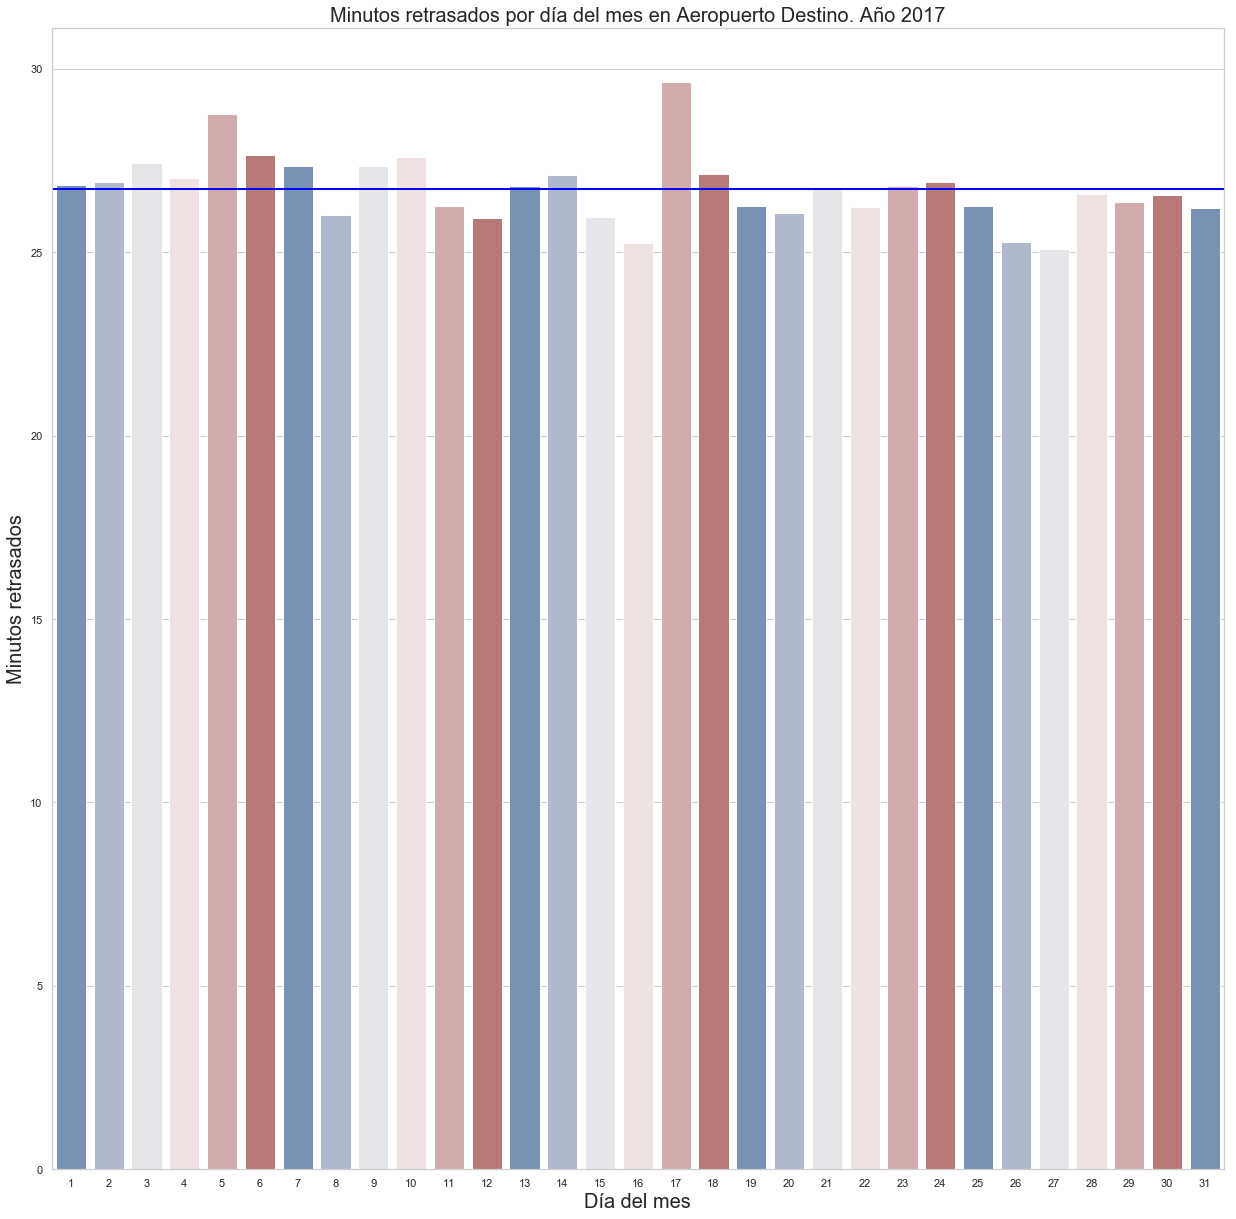

In [164]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [165]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [166]:
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [167]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1          60271  26.333527
2          60341  27.242124
3          55578  27.371856
4          48860  26.079779

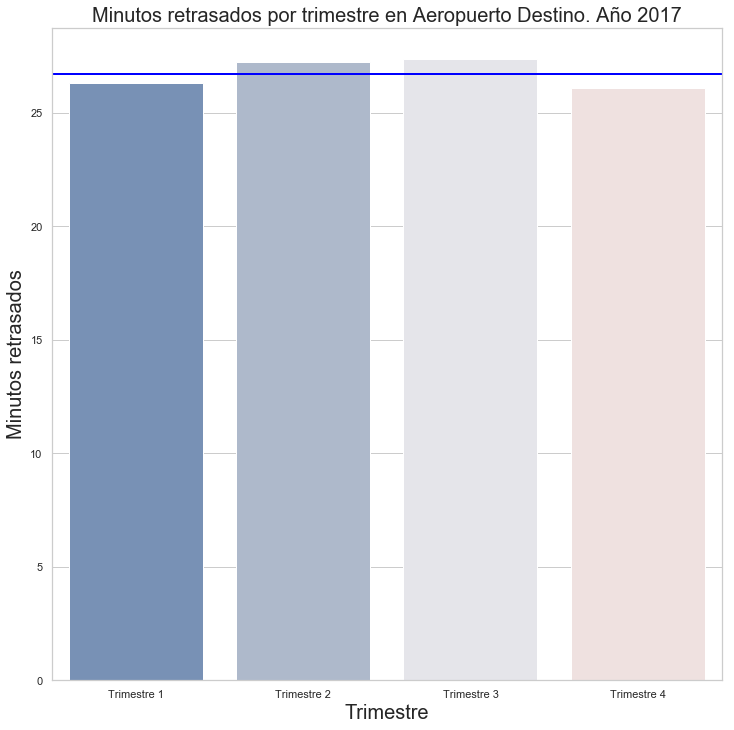

In [168]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.5.1.1 Ranking de aeropuertos en Retrasos sólo en Destino

In [169]:
dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True).head(15)

LAX    16806
ORD    12441
ATL    11318
SFO    10922
SEA     8117
DEN     7994
DFW     7323
LAS     6070
PHX     5749
EWR     5552
MCO     5312
BOS     5091
CLT     4856
IAH     4677
LGA     4562
Name: Dest, dtype: int64

In [170]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosSoloDestinoEnAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True)).head(45)

In [171]:
#retrasos totales de esos 45 aeropuerto
retrasosSoloDestinoEnAeropuertos.sum()

Dest    188645
dtype: int64

In [172]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosSoloDestinoEnAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])))) *100

In [173]:
pct80AeropuertosDestino

Dest    83.823595
dtype: float64

In [174]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos (solo en destino) del año ' + year)

45 aeropuertos concentran el 83.82% de los retrasos (solo en destino) del año 2017


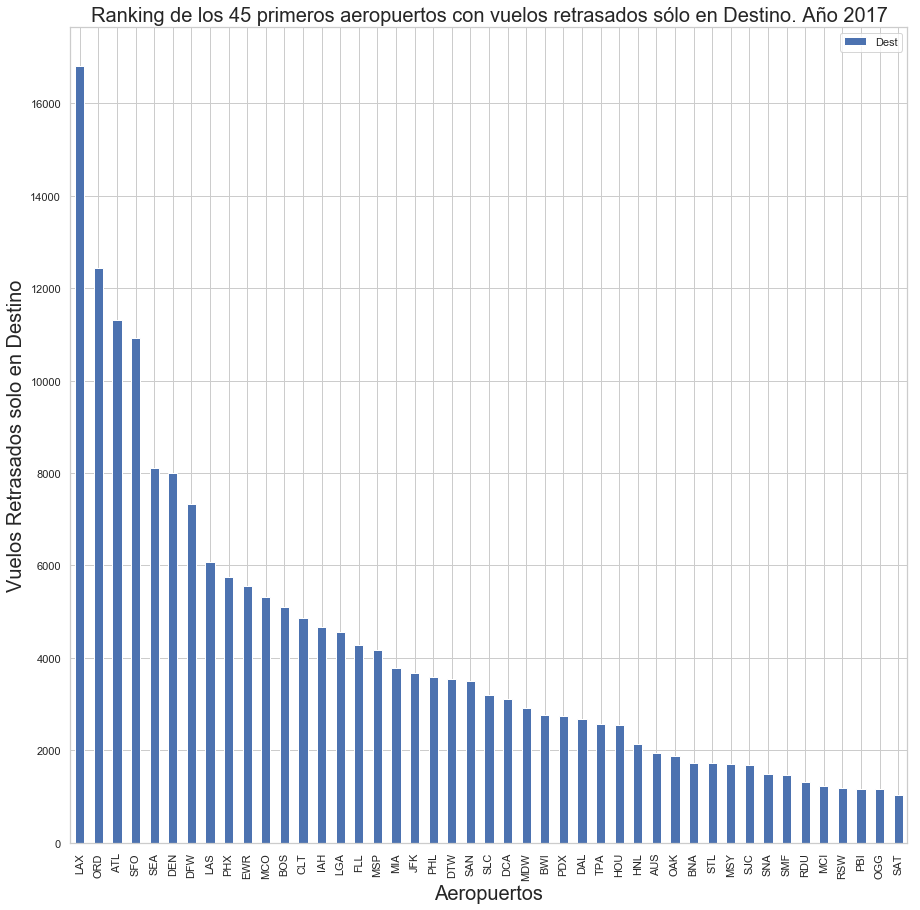

In [175]:
ax = retrasosSoloDestinoEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), ORD (Chicago) y DEN(Denver) repiten 2 como los 3 primeros, al igual que en Origen, pero se añaden IAH(Houston) y DFW (Dallas) como significativos, entre los 5 concentran más del 35% de los retrasos.
Sigue siendo un factor clave, ser aeropuerto Hub, distribuidor de tráfico de interconexión con otros destinos, como elemento de demoras en la red.

In [176]:
retrasosSoloDestinoEnAeropuertos = retrasosSoloDestinoEnAeropuertos.reset_index()
retrasosSoloDestinoEnAeropuertos.columns = ['Destination','ArrDelay']

In [177]:
retrasosSoloDestinoEnAeropuertos.head(45)

Destination  ArrDelay
0          LAX     16806
1          ORD     12441
2          ATL     11318
3          SFO     10922
4          SEA      8117
5          DEN      7994
6          DFW      7323
7          LAS      6070
8          PHX      5749
9          EWR      5552
10         MCO      5312
11         BOS      5091
12         CLT      4856
13         IAH      4677
14         LGA      4562
15         FLL      4285
16         MSP      4162
17         MIA      3778
18         JFK      3664
19         PHL      3588
20         DTW      3539
21         SAN      3489
22         SLC      3202
23         DCA      3113
24         MDW      2925
25         BWI      2764
26         PDX      2742
27         DAL      2683
28         TPA      2559
29         HOU      2543
30         HNL      2146
31         AUS      1941
32         OAK      1874
33         BNA      1730
34         STL      1728
35         MSY      1703
36         SJC      1682
37         SNA      1483
38         SMF      1461
39         RDU      1307
40         MCI      1228
41         RSW      1176
42         PBI      1162
43         OGG      1157
44         SAT      1041

In [178]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSoloDestinoEnAeropuertos["Destination"].values.tolist()

In [179]:
#nos quedamos con los datos de esos aeropuertos
retrasosSoloDestinoEnAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

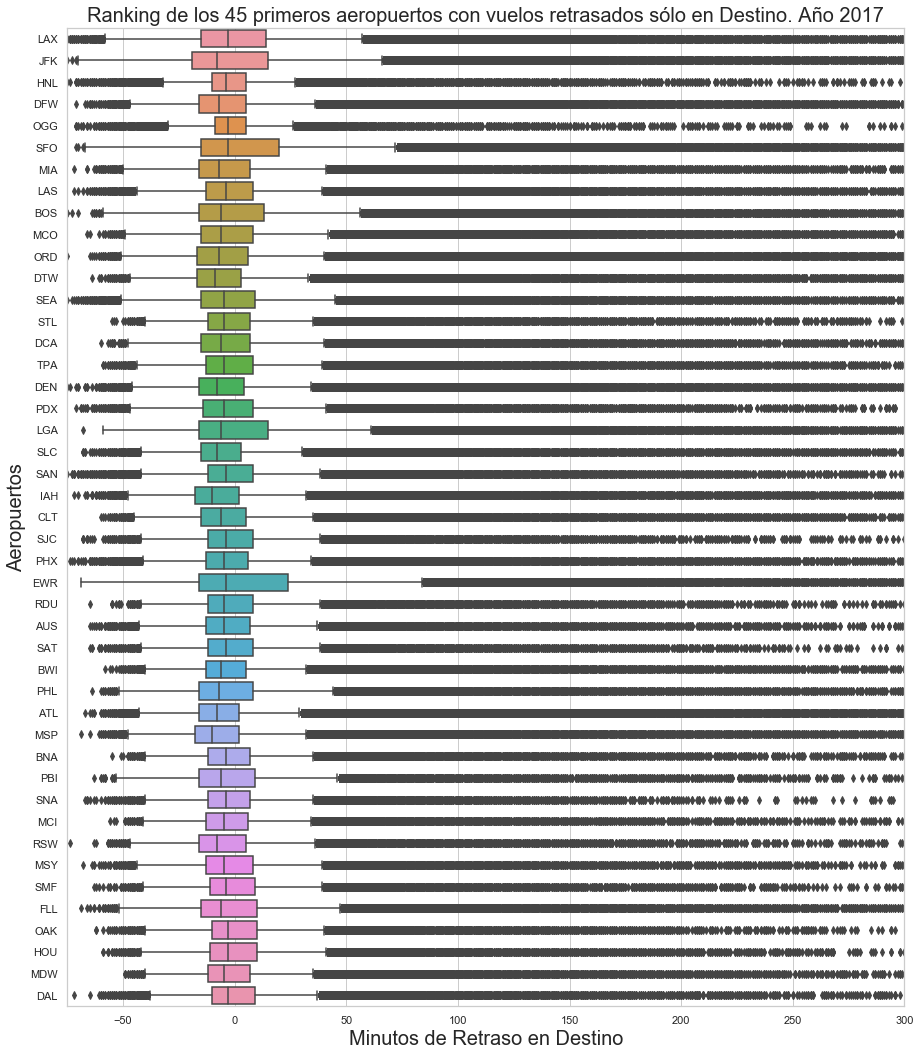

In [180]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-75,300)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

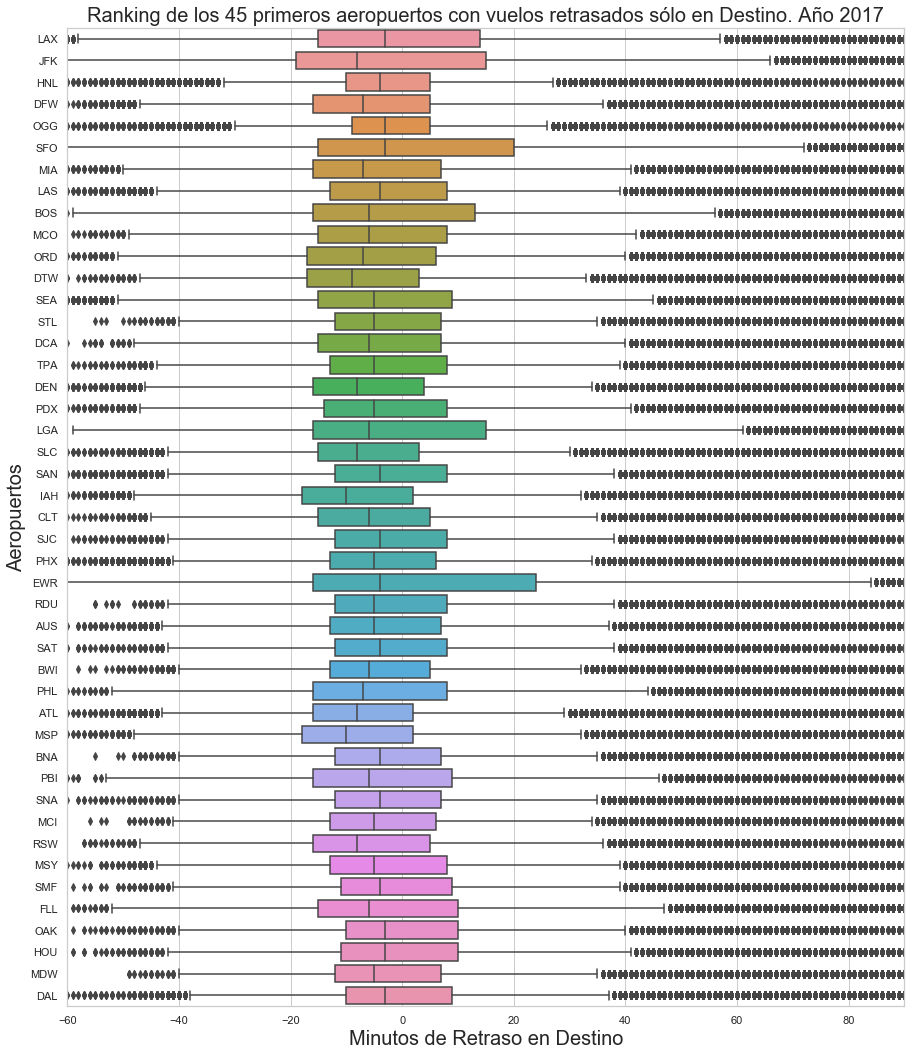

In [181]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-60,90)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

Podemos apreciar que hay una gran cantidad de vuelos con adelanto, es decir, que tendremos que si queremos quedarnos solo con retrasos de verdad y sacar sus estadísticos debemos eliminar las muestras con adelanto.

In [182]:
retrasosSoloDestinoEnAeropuertosSinAdelantos = pd.DataFrame(retrasosSoloDestinoEnAeropuertos[(retrasosSoloDestinoEnAeropuertos['ArrDelay'] > 15)])



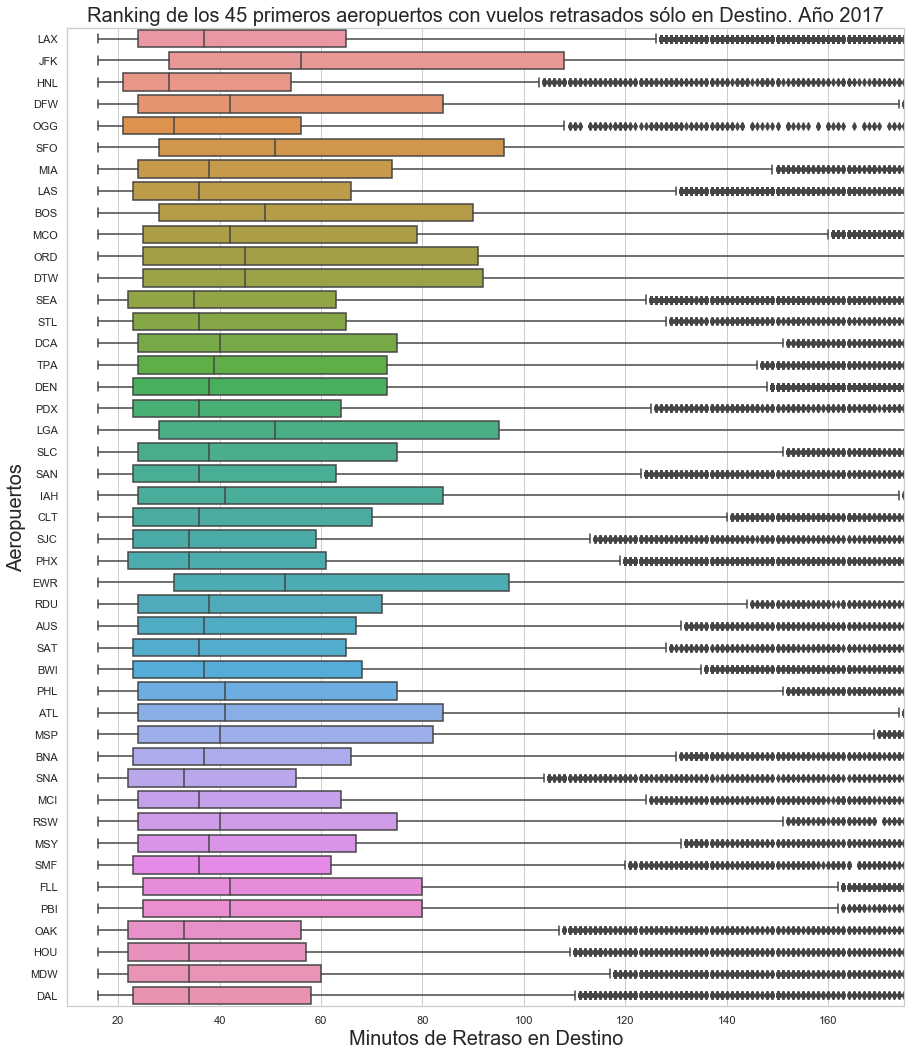

In [183]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(10,175)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertosSinAdelantos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertosSinAdelantos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

In [184]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosSoloDestinoEnAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [185]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [186]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [187]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

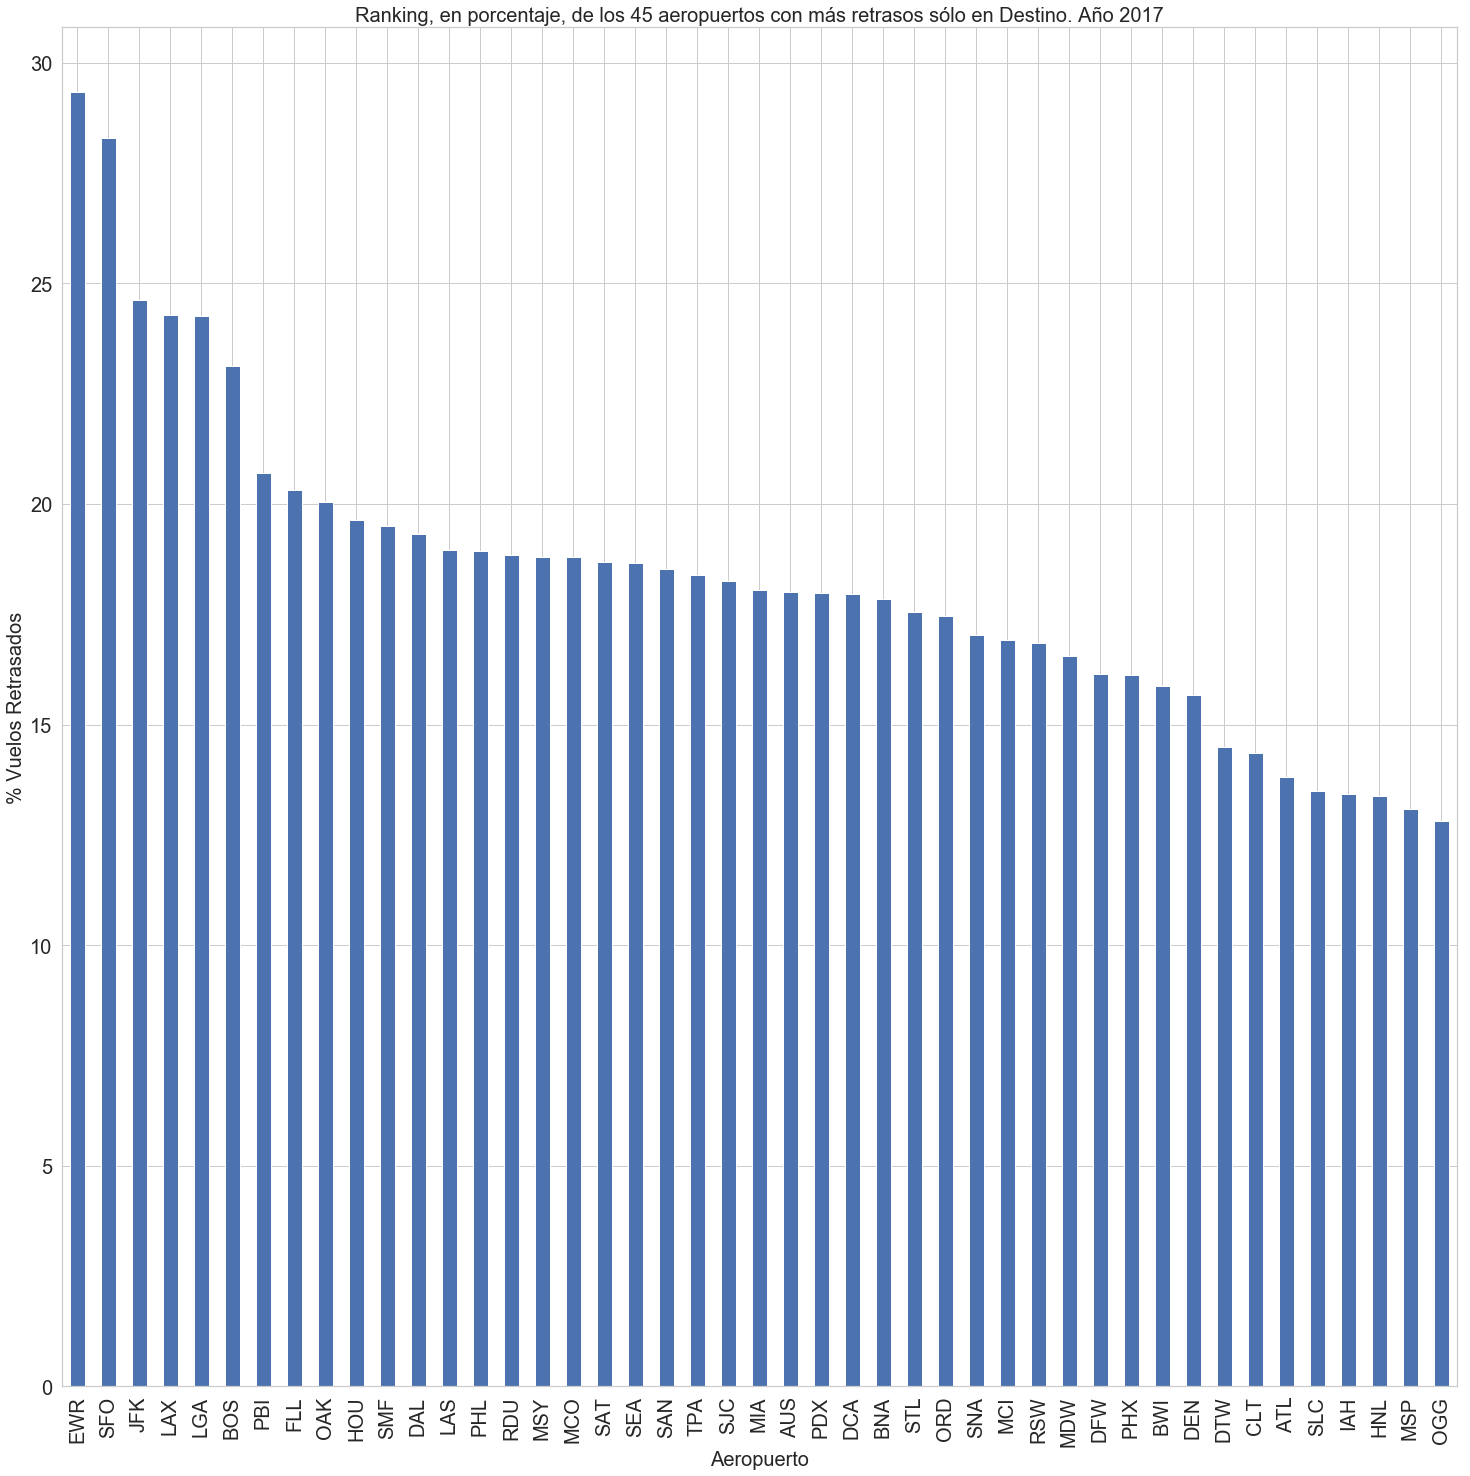

In [188]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos sólo en Destino. Año ' + year, fontsize=20)

plt.show()

Por porcentaje sobre su total de vuelos, destaca enormemente los 3 aeropuertos principales del área de Nueva York, EWR, LGA y JFK. Y en los 10 primeros 9 de ellos son de la Costa Este y Puerto Rico, sólo SFO (San Francisco) es de la Costa Oeste.

### 1.3.5.1.2 Retraso Destino (CON o SIN retraso en Origen)

En el apartado anterior sólo mostrábamos vuelos que se habían retrasado sólo en Destino y que salieron puntuales en Origen

In [189]:
#vuelos retrasados en Destino saliesen o no retrasados en origen
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [190]:
retrasos = pd.DataFrame(retrasosDestino['ArrDelay'])

retrasos.head(5)

ArrDelay
0       27.0
7       21.0
8      158.0
10      18.0
13      23.0

In [191]:
retrasos.describe().T

count      mean       std   min   25%   50%   75%     max
ArrDelay  1029474.0  63.93234  80.54462  15.0  23.0  39.0  74.0  2189.0

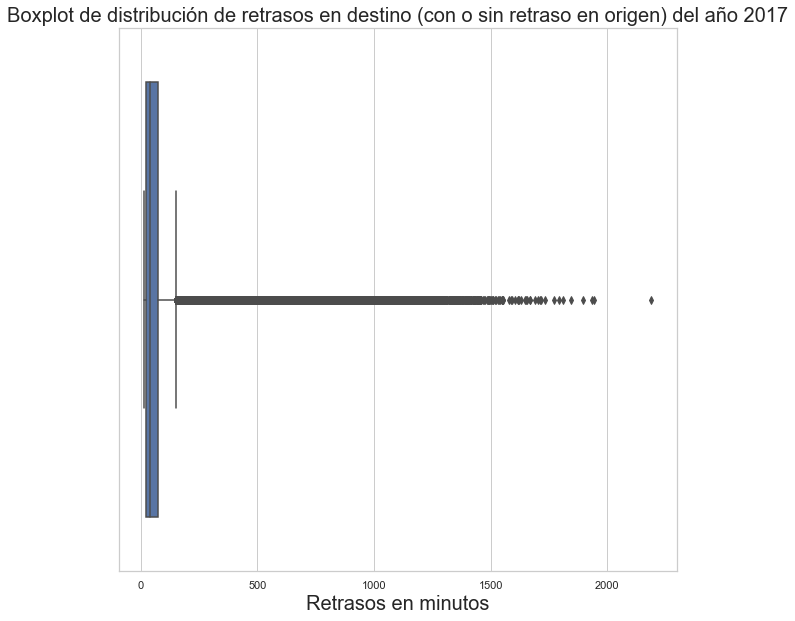

In [192]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

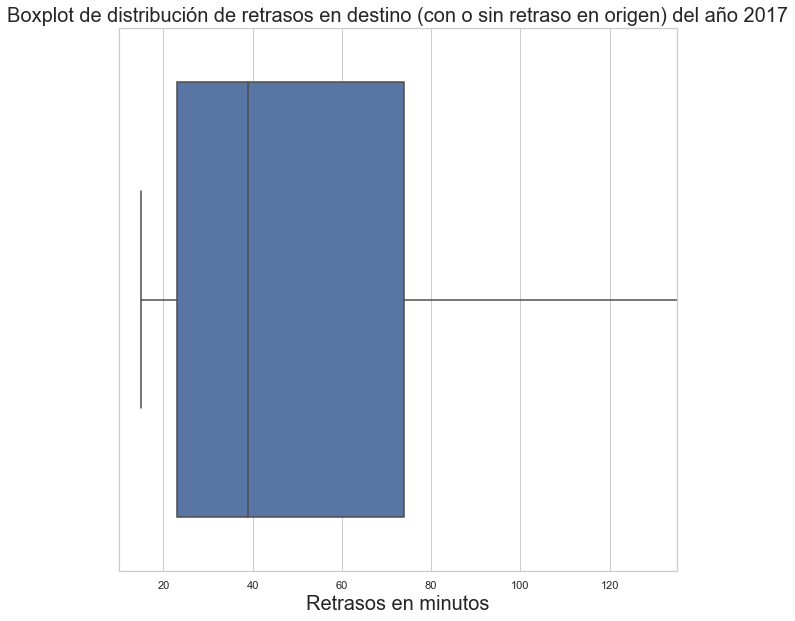

In [193]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,135)
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

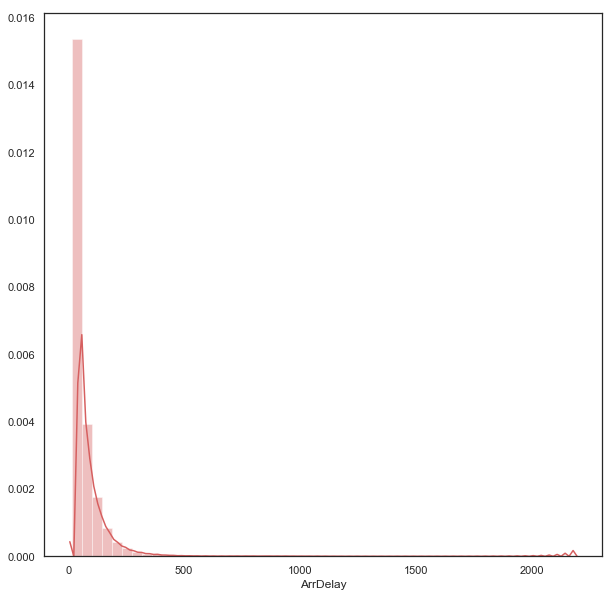

In [194]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasos["ArrDelay"], color="r")

plt.show()

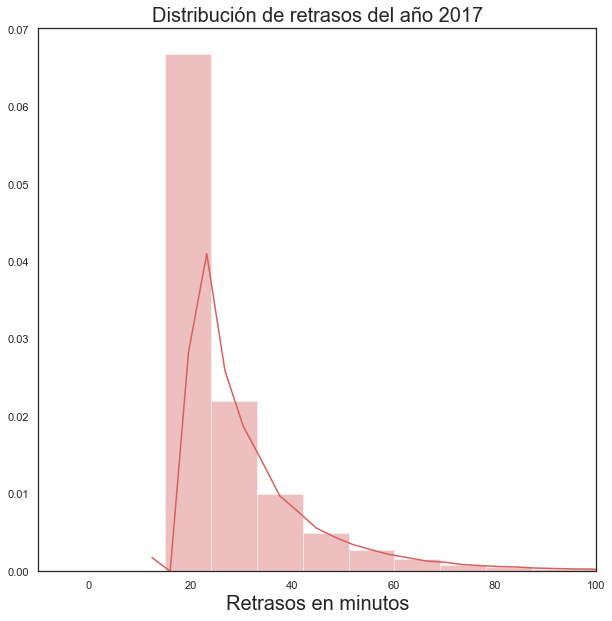

In [195]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,100)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

In [196]:
retrasosDestinoPorMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorMes = pd.DataFrame(retrasosDestinoPorMes.groupby('Month').aggregate({'Month': 'count', 'ArrDelay':'mean'}))


In [197]:
retrasosDestinoPorMes

Month   ArrDelay
Month                   
1       97699  64.447425
2       64264  60.170780
3       88638  61.230285
4       92143  71.541126
5       96680  63.513798
6      110719  67.247139
7      110081  67.714029
8      104709  62.530470
9       58914  59.580575
10      69027  60.995944
11      51298  57.448166
12      85302  63.058545

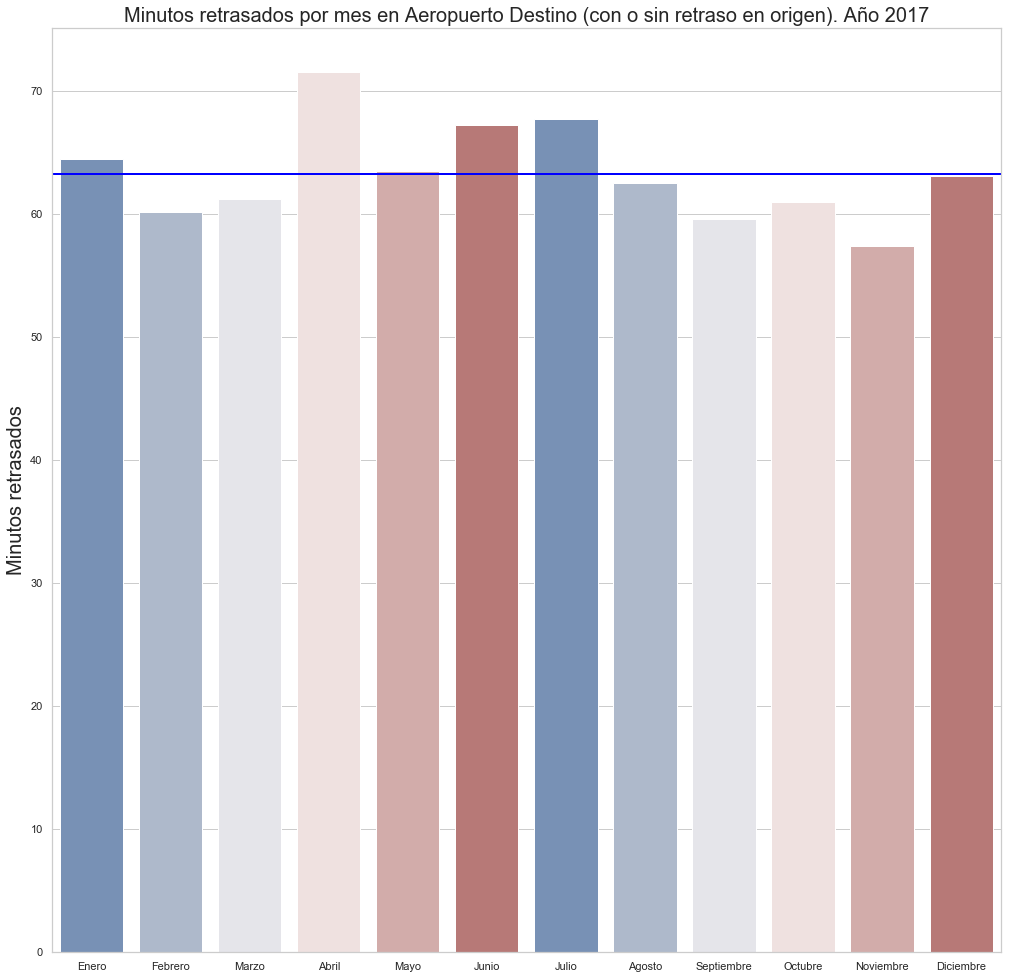

In [198]:

#Vuelos retrasados por el día de la semana

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(17,17))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por mes en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [199]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))


In [200]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1             164832  66.629859
2             133665  61.418509
3             141238  62.585444
4             165721  61.826703
5             175540  64.802250
6             108849  64.066854
7             139629  65.817402

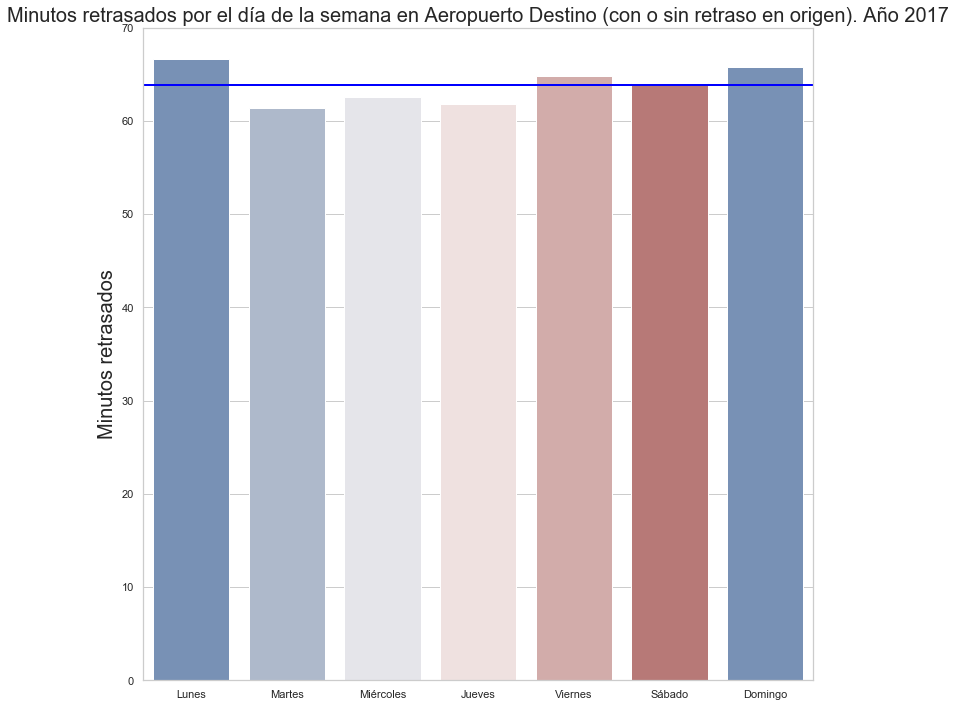

In [201]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [202]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [203]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559        34203  61.939859
0600-0659         9616  75.647359
0700-0759        17310  73.954593
0800-0859        25505  64.289277
0900-0959        35695  62.727077
1000-1059        41085  59.272703
1100-1159        44763  59.483212
1200-1259        47550  59.317645
1300-1359        49570  60.431612
1400-1459        57753  62.468149
1500-1559        56698  61.728791
1600-1659        73211  62.383699
1700-1759        72656  63.086118
1800-1859        80951  64.705958
1900-1959        83419  67.460435
2000-2059        81854  67.091297
2100-2159        87951  67.066924
2200-2259        70186  66.103767
2300-2359        59498  62.928014

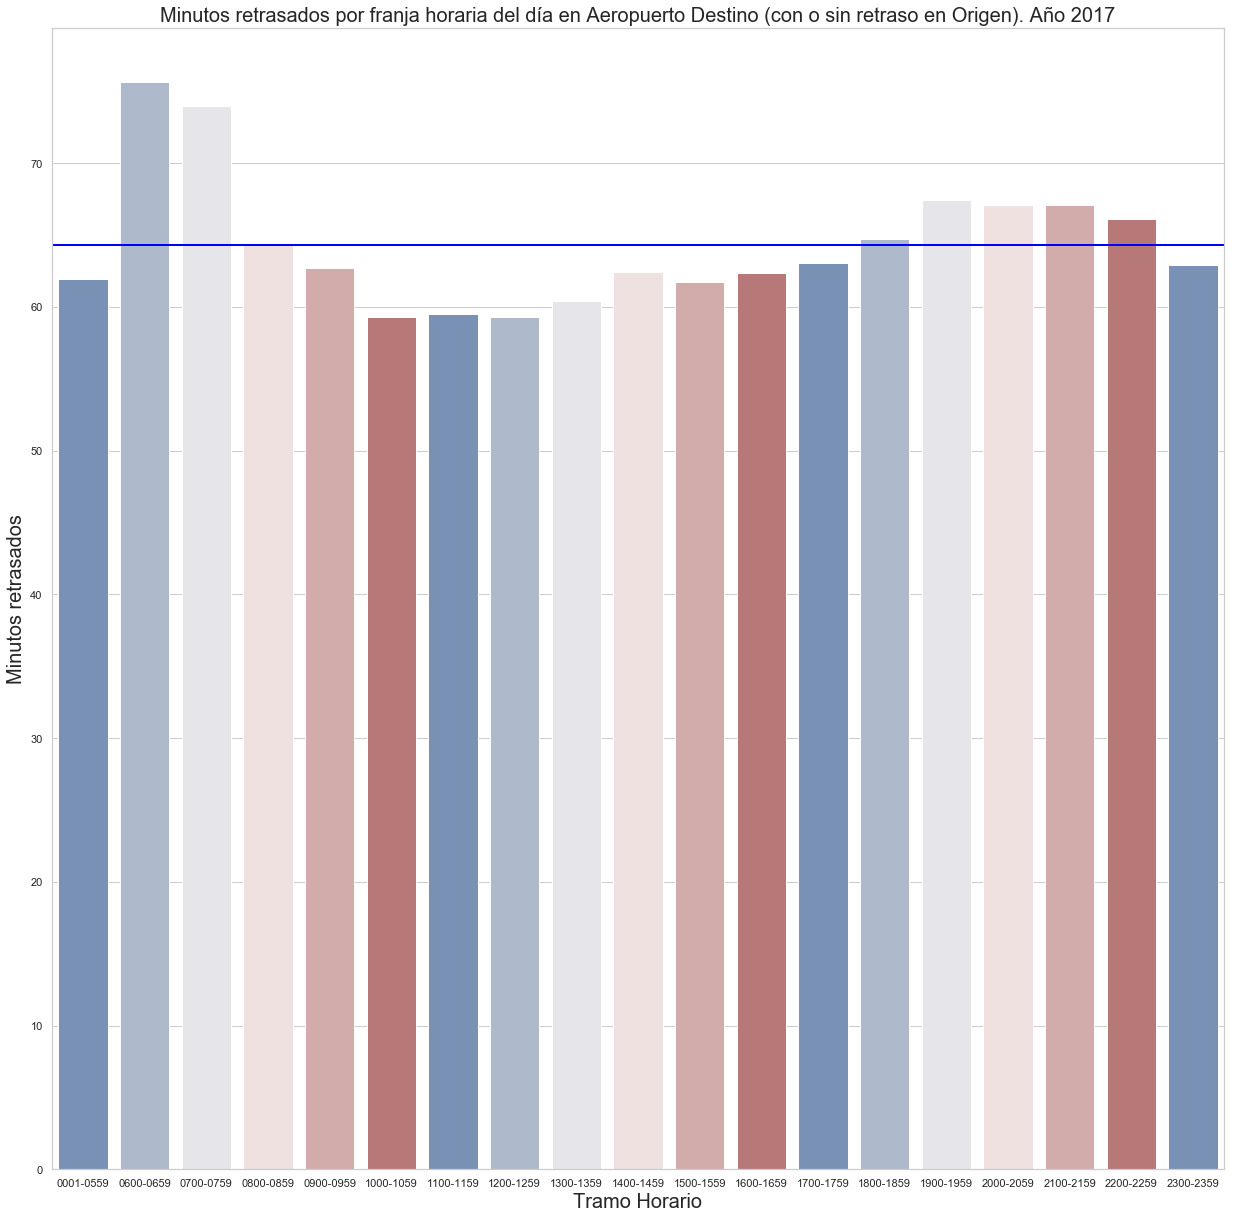

In [204]:
#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [205]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [206]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                32087  61.522205
2                31533  64.694891
3                33792  68.985470
4                31985  62.090605
5                40240  68.782679
6                39062  69.125902
7                40409  68.053948
8                35889  67.557831
9                35359  63.480981
10               35569  64.514746
11               31033  62.145361
12               32853  63.595288
13               35003  64.157529
14               31062  71.376602
15               32296  63.147882
16               29541  57.495989
17               33303  65.116836
18               33902  62.948794
19               34685  65.396684
20               36739  61.060426
21               33572  62.595437
22               35411  64.111660
23               36763  62.025651
24               37560  63.605059
25               29329  64.658393
26               31383  59.421916
27               31674  56.093768
28               29989  62.040181
29               27997  60.686824
30               31850  63.953940
31               17604  62.219609

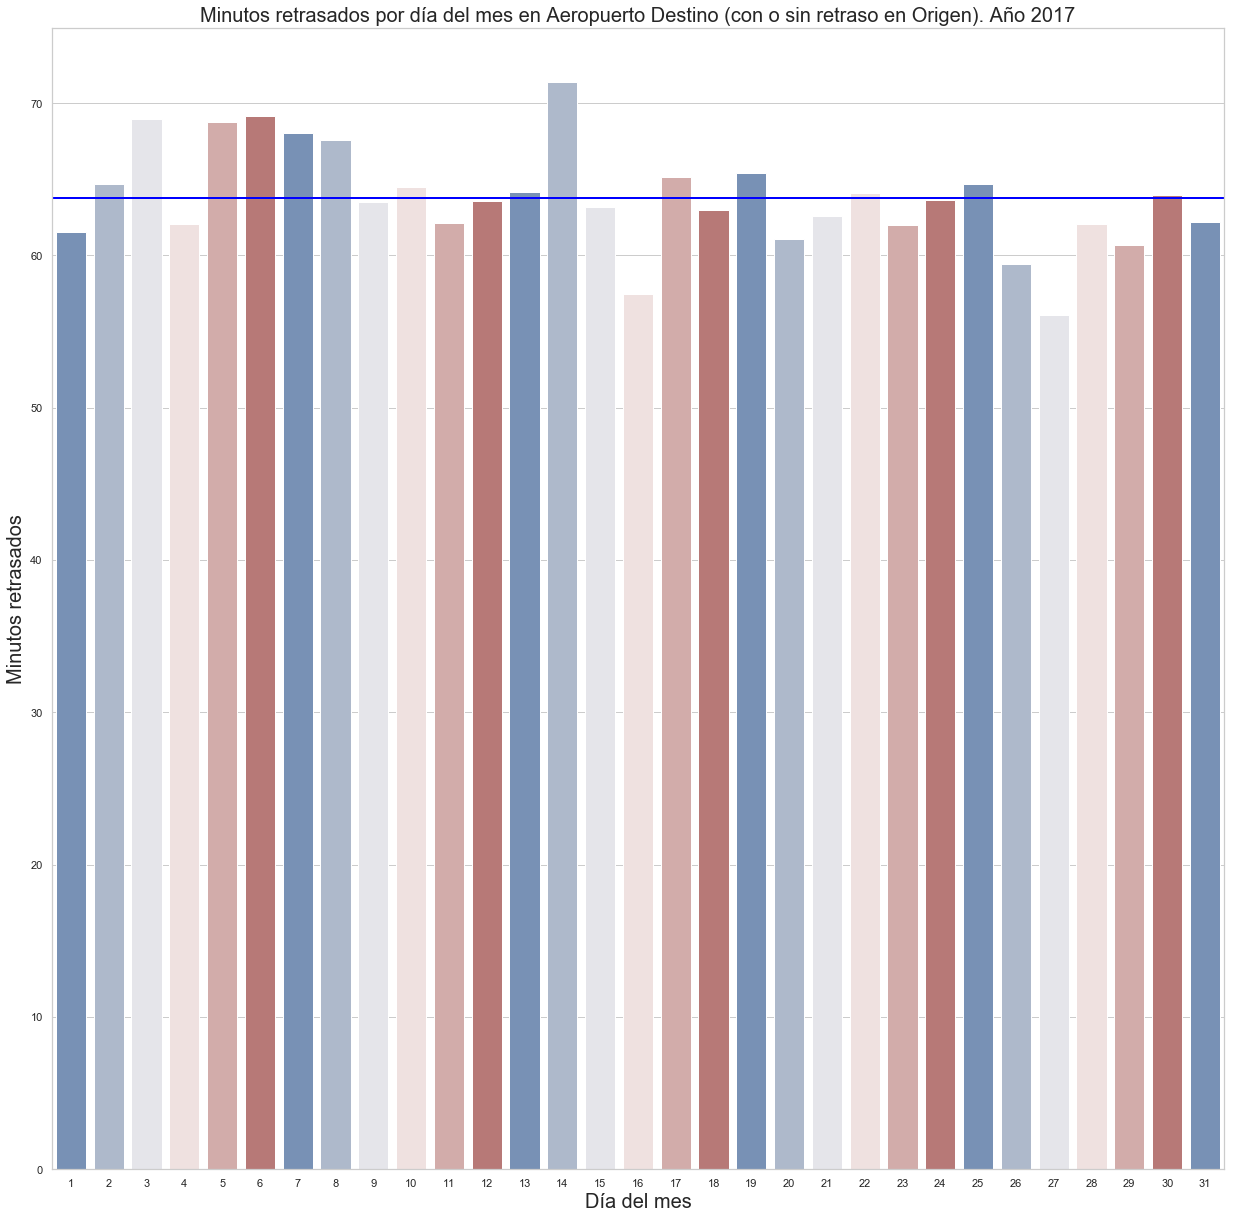

In [207]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [208]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [209]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1         250601  62.212816
2         299542  67.363054
3         273704  63.980289
4         205627  60.966522

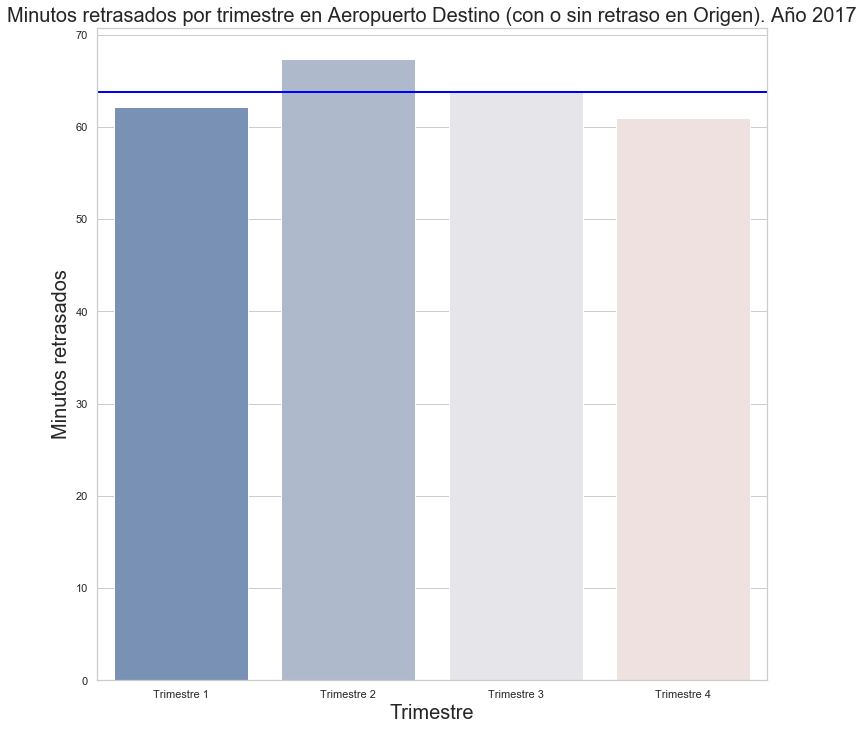

In [210]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Vistos las diferentes dimensiones temporales, se puede observar:
* cómo se van acumulando los retrasos a lo largo del día.
* como los principios y fines de mes hay algo más de retraso
* no hay gran diferencia entre los días de la semana

In [211]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)].Dest.value_counts(sort=True)).head(45)

In [212]:
retrasosAeropuertos

Dest
LAX  52056
ATL  50392
SFO  49414
ORD  46519
DEN  34953
EWR  34034
DFW  29245
BOS  29010
LAS  28768
SEA  25606
PHX  24897
MCO  24811
JFK  23243
LGA  22647
DTW  18352
FLL  18303
MSP  17617
IAH  17351
CLT  16238
BWI  16023
SAN  15561
SLC  15094
MDW  14431
PHL  13859
DAL  13435
DCA  13369
TPA  12902
MIA  12274
PDX  11267
HOU  10692
OAK  10108
STL   9994
BNA   9821
AUS   9387
SJC   8961
MSY   8814
SMF   8791
MCI   7628
SNA   7118
RDU   6773
HNL   6466
CLE   6359
SAT   6168
MKE   5523
IAD   5446

In [213]:
#retrasos totales de esos 45 aeropuerto
retrasosAeropuertos.sum()

Dest    829720
dtype: int64

In [214]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1)])))) *100

In [215]:
pct80AeropuertosDestino

Dest    80.596499
dtype: float64

In [216]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 80.60% de los retrasos del año 2017


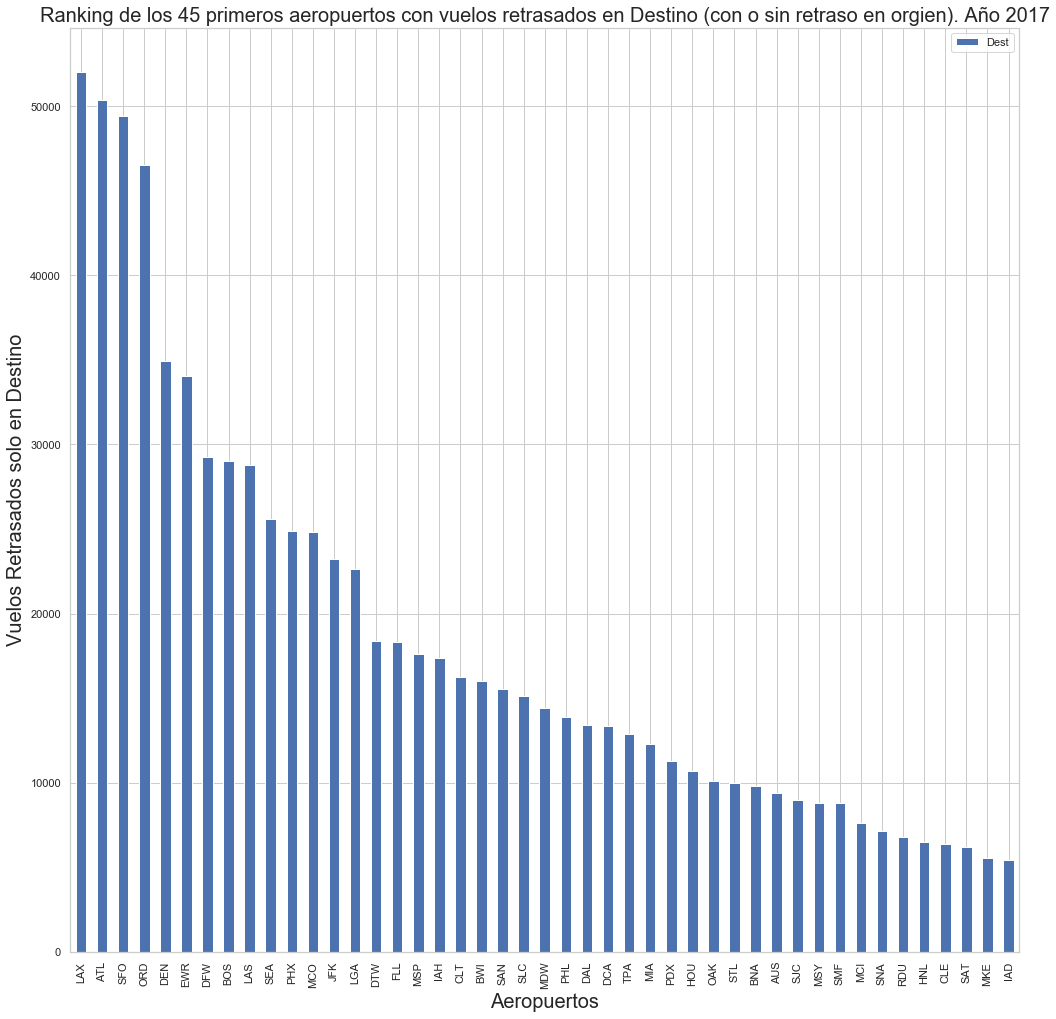

In [217]:
ax = retrasosAeropuertos.plot(kind='bar', figsize=(17,17))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Destino (con o sin retraso en orgien). Año ' + year , fontsize=20)

plt.show()

In [218]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosAeropuertos.index.values.tolist()

In [219]:
#nos quedamos con los datos de esos aeropuertos
retrasosDestinoAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

In [220]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosDestinoAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [221]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [222]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [223]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

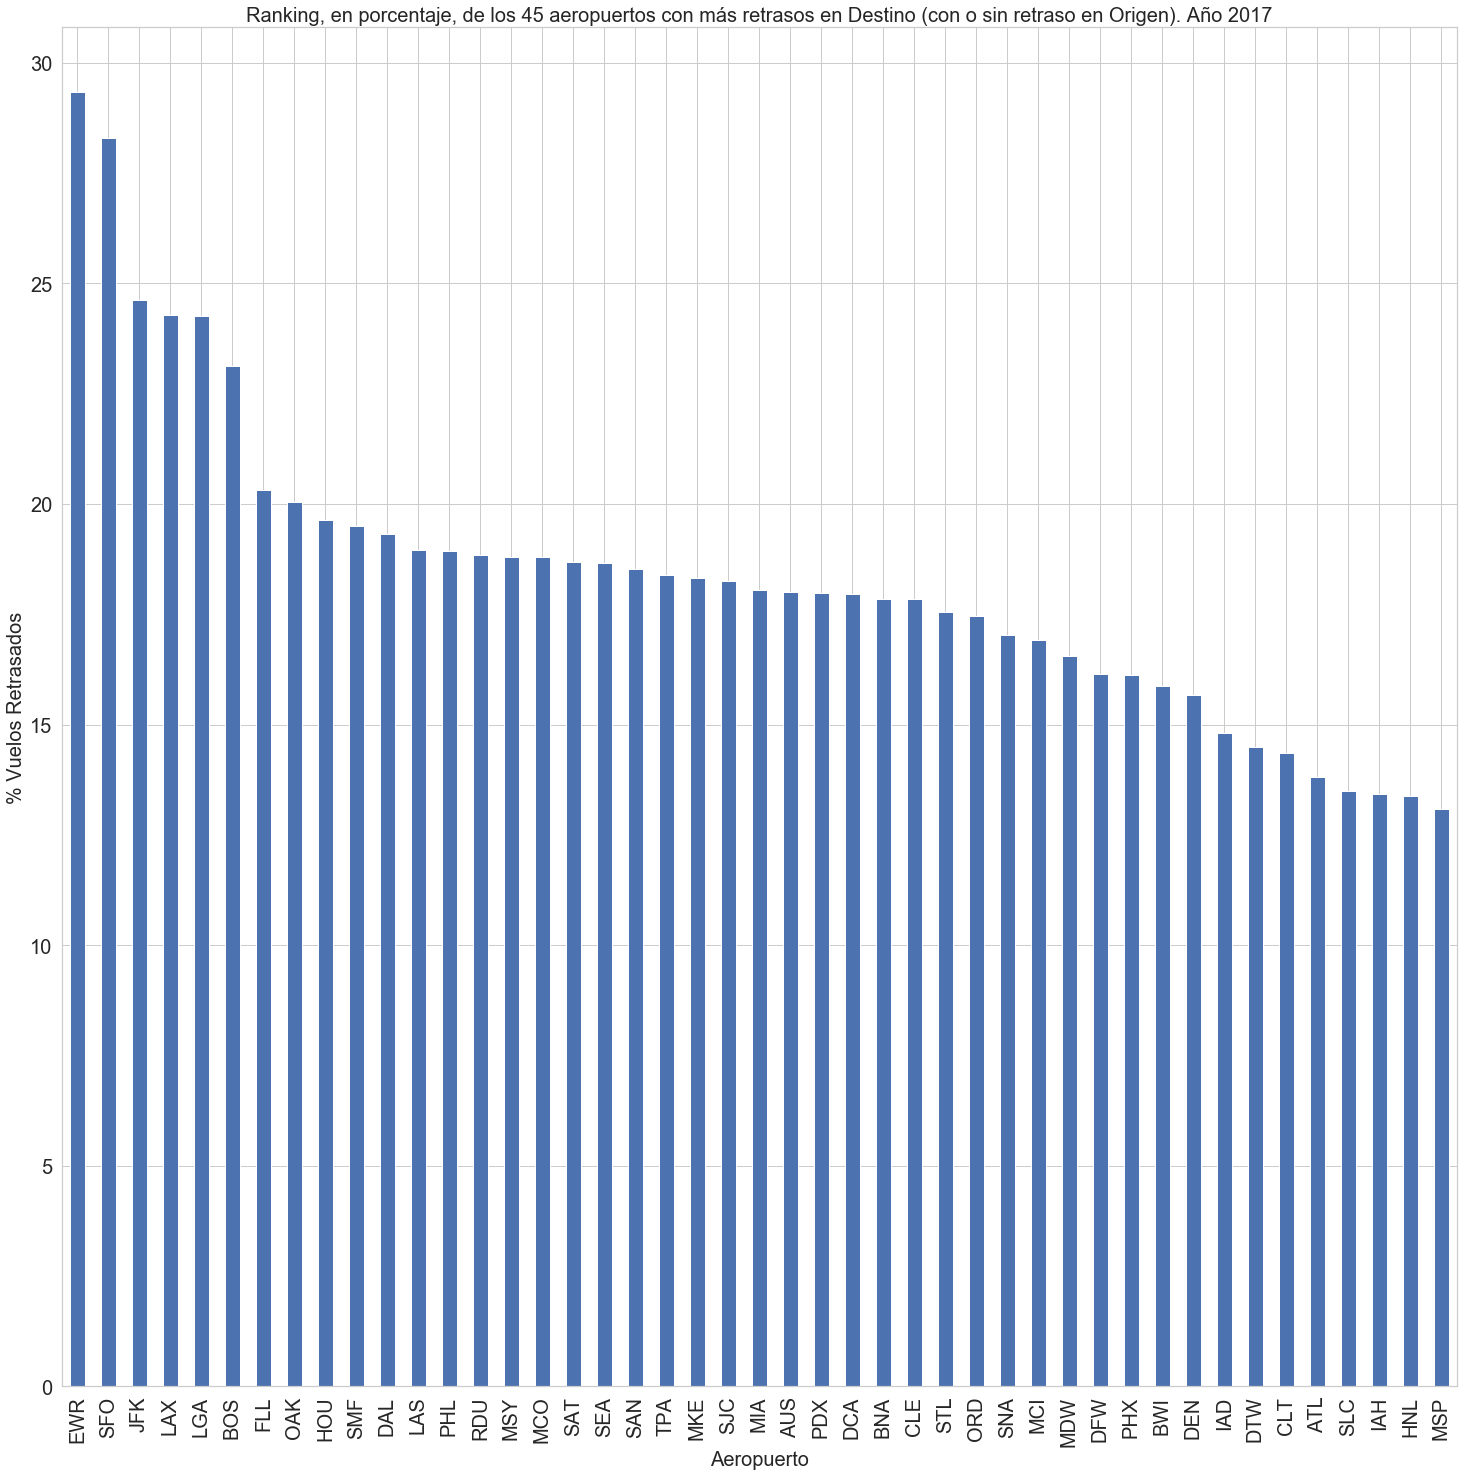

In [224]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.show()

En porcentaje de vuelos retrasados, claramente, se ve que 9 de los 10 primeros aeropuertos del ranking son de la Costa Este.

### 1.3.5.1.2 Retraso por zona geográfica del Destino

In [225]:
#cualquier vuelo retrasado en la llegada
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [226]:
#vamos a ponerle de qué zona greográfica es
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv("/Users/moncholv/Documents/Proyecto AIr/datasets/geo/" + 'ZonasEstados.csv', delimiter=';')

In [227]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [228]:
#hacemos el join por el Estado Origen del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='OriginState', how='inner')

In [229]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='DestState', how='inner')

In [230]:
#comprobamos
retrasosDestino[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          NY        EN        CA      WS
1          NY        EN        CA      WS
2          NY        EN        CA      WS
3          NY        EN        CA      WS
4          NY        EN        CA      WS

In [231]:
retrasosDestinoGeo = pd.DataFrame(retrasosDestino.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [232]:
retrasosDestinoGeo

DestGeo   ArrDelay
DestGeo                    
CN         49578  64.631046
CS        158138  61.910844
EN        343792  68.735741
ES        209774  65.818486
WN         21588  54.621271
WS        244668  57.522504

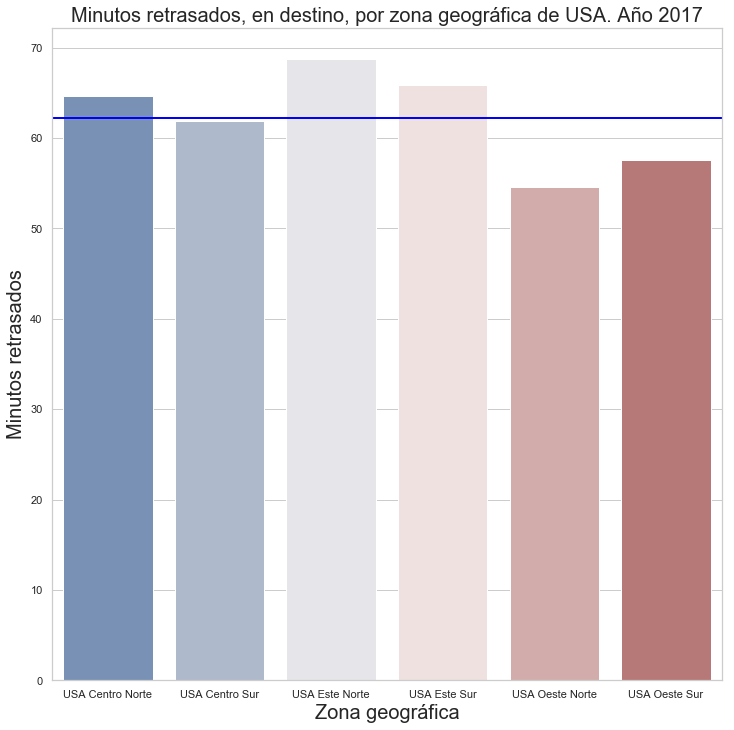

In [233]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['USA Centro Norte', 'USA Centro Sur', 'USA Este Norte', 'USA Este Sur', 'USA Oeste Norte', 'USA Oeste Sur']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoGeo['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Zona geográfica", fontsize=20)
ax.set_title('Minutos retrasados, en destino, por zona geográfica de USA. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoGeo['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Nos quedamos sólo con los de la Costa Este

In [234]:

retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [235]:
retrasosDestinoSoloCostaEste.Dest.unique()

array(['SEA', 'GEG', 'BLI', 'PSC', 'MIA', 'MCO', 'FLL', 'TPA', 'RSW',
       'DAB', 'PBI', 'JAX', 'SRQ', 'PGD', 'PNS', 'ECP', 'VPS', 'EYW',
       'GNV', 'MLB', 'TLH', 'UST', 'CLT', 'RDU', 'GSO', 'AVL', 'ILM',
       'FAY', 'OAJ', 'EWN', 'BOS', 'ACK', 'MVY', 'HYA', 'ORH', 'ORD',
       'MDW', 'PIA', 'SPI', 'MLI', 'BMI', 'UIN', 'PHL', 'PIT', 'LBE',
       'MDT', 'SCE', 'ERI', 'AVP', 'ABE', 'JFK', 'ROC', 'SYR', 'LGA',
       'BUF', 'HPN', 'SWF', 'IAG', 'PBG', 'ISP', 'ALB', 'ITH', 'BGM',
       'ELM', 'PWM', 'BGR', 'SJU', 'PSE', 'BQN', 'ATL', 'SAV', 'AGS',
       'VLD', 'BQK', 'ABY', 'CSG', 'DTW', 'GRR', 'TVC', 'FNT', 'AZO',
       'MBS', 'CMX', 'MKG', 'LAN', 'ESC', 'PLN', 'APN', 'MQT', 'CIU',
       'IMT', 'SLC', 'SGU', 'CDC', 'CHS', 'MYR', 'CAE', 'GSP', 'CLE',
       'CMH', 'CAK', 'DAY', 'TOL', 'EWR', 'TTN', 'ACY', 'BWI', 'BNA',
       'MEM', 'TYS', 'CHA', 'TRI', 'IND', 'EVV', 'FWA', 'SBN', 'MKE',
       'MSN', 'ATW', 'EAU', 'GRB', 'CWA', 'LSE', 'RHI', 'DCA', 'IAD',
       'RIC', 'CHO',

In [236]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [237]:
retrasosDestinoSoloCostaEste

DestGeo   ArrDelay
DestGeo                    
EN        237201  71.567371
ES        152723  67.219659

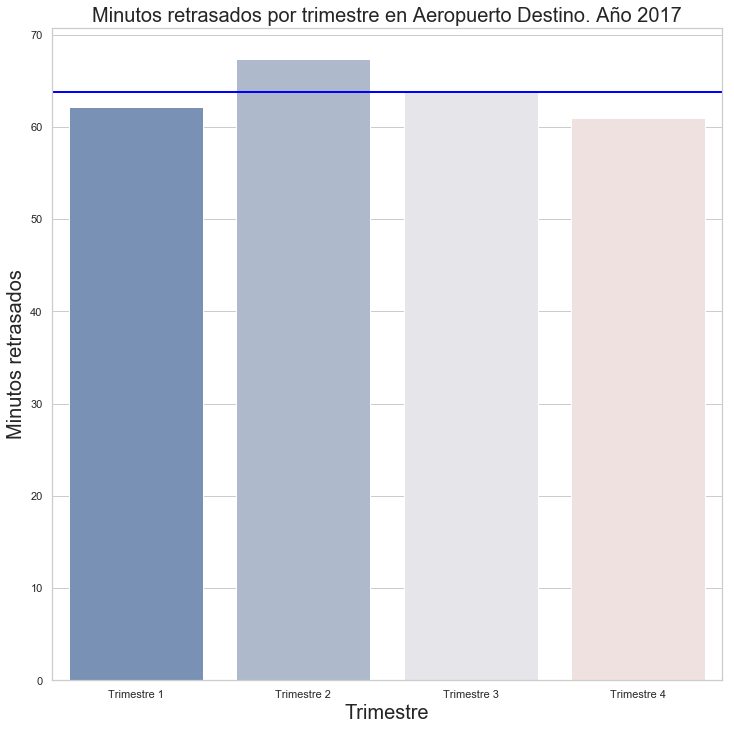

In [238]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [239]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [240]:
retrasosDestinoPorRuta = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby(['Route']).aggregate({'Route': 'count', 'ArrDelay':'mean', 'DepDelay': 'mean', 'Origin': 'count', 'Dest':'count'}))

retrasosDestinoPorRuta = retrasosDestinoPorRuta.rename(columns={'Route': 'VuelosTotales', 'ArrDelay': 'MediaRetrasoDestinoTotal', 'DepDelay': 'MediaRetrasoOrigenTotal'})



In [241]:
retrasosDestinoPorRuta.reset_index()

Route  VuelosTotales  MediaRetrasoDestinoTotal  \
0     ABE-ATL            119                103.806723   
1     ABE-DTW            118                 96.703390   
2     ABE-ORD             87                 78.540230   
3     ABY-ATL            110                 97.254545   
4     ACK-BOS             63                 80.365079   
5     ACK-DCA              8                 64.750000   
6     ACK-JFK            154                 98.357143   
7     ACY-ATL             29                 61.586207   
8     ACY-BOS             63                 80.158730   
9     ACY-FLL            117                 77.008547   
10    ACY-MCO            149                 66.442953   
11    ACY-MYR             20                 67.950000   
12    ACY-PBI             26                116.230769   
13    ACY-RSW             89                 61.247191   
14    ACY-TPA             36                 72.194444   
15    AGS-ATL            389                 94.717224   
16    ALB-ATL            116                 98.284483   
17    ALB-BWI            281                 48.601423   
18    ALB-CLT            117                 62.555556   
19    ALB-DTW            121                127.041322   
20    ALB-EWR             27                 86.518519   
21    ALB-FLL            148                 70.101351   
22    ALB-MCO            176                 63.943182   
23    ALB-MDW            113                 47.805310   
24    ALB-ORD            181                 69.375691   
25    ALB-RSW              2                 42.000000   
26    ALB-TPA             73                 67.671233   
27    APN-DTW             60                 71.800000   
28    APN-PLN             42                133.238095   
29    ATL-ABE            143                 61.902098   
...       ...            ...                       ...   
1620  TPA-TTN             37                113.432432   
1621  TRI-ATL            227                120.651982   
1622  TTN-ATL             22                 57.727273   
1623  TTN-CLT             36                 50.805556   
1624  TTN-DTW             37                 90.972973   
1625  TTN-FLL             15                 78.333333   
1626  TTN-MCO            110                 89.790909   
1627  TTN-MIA              3                109.333333   
1628  TTN-ORD             33                 90.575758   
1629  TTN-PBI             24                 95.500000   
1630  TTN-PGD             20                 77.100000   
1631  TTN-RDU             36                 86.666667   
1632  TTN-RSW              9                 65.888889   
1633  TTN-TPA             23                117.478261   
1634  TVC-ATL              1                 17.000000   
1635  TVC-DTW            166                 94.096386   
1636  TVC-EWR             30                 70.700000   
1637  TVC-LGA              2                 58.000000   
1638  TVC-ORD            469                 84.108742   
1639  TYS-ATL            227                 88.810573   
1640  TYS-CLT            115                 57.800000   
1641  TYS-DTW             20                223.150000   
1642  TYS-EWR            152                 86.164474   
1643  TYS-LGA             66                134.318182   
1644  TYS-MCO              9                 57.444444   
1645  TYS-ORD            311                 84.398714   
1646  UIN-ORD             13                 73.000000   
1647  UST-PHL             29                120.896552   
1648  VLD-ATL            108                 82.324074   
1649  VPS-ATL            293                 79.839590   

      MediaRetrasoOrigenTotal  Origin  Dest  
0                  100.815126     119   119  
1                   94.508475     118   118  
2                   67.206897      87    87  
3                   95.609091     110   110  
4                   78.539683      63    63  
5                   59.750000       8     8  
6                   95.214286     154   154  
7                   41.931034      29    29

In [242]:
rutasVuelosTop20 = retrasosDestinoPorRuta.sort_values(['VuelosTotales'], ascending=False).head(20)

In [243]:
rutasVuelosTop20

VuelosTotales  MediaRetrasoDestinoTotal  MediaRetrasoOrigenTotal  \
Route                                                                       
ORD-LGA           2324                 65.071859                54.950086   
MCO-EWR           2248                 78.810498                77.902135   
FLL-EWR           2000                 78.363500                74.892000   
LGA-ORD           1959                 70.768760                62.678407   
EWR-MCO           1944                 73.207305                67.966049   
ATL-EWR           1905                 72.487139                70.940157   
ATL-LGA           1824                 72.020285                67.387061   
DCA-BOS           1706                 68.343494                58.990035   
EWR-FLL           1626                 73.479705                70.623001   
LGA-ATL           1600                 77.421875                77.313125   
ORD-BOS           1547                 65.389140                58.734324   
BOS-LGA           1493                 79.678500                72.007368   
ATL-MCO           1485                 60.138047                57.345455   
MCO-JFK           1481                 93.118839                94.074949   
MIA-LGA           1471                 71.755948                62.881033   
BOS-DCA           1450                 62.994483                56.169655   
ORD-EWR           1407                 71.449183                65.955935   
ATL-FLL           1400                 59.345714                55.792143   
LGA-BOS           1370                 77.303650                74.783942   
JFK-MCO           1365                 78.538462                74.167766   

         Origin  Dest  
Route                  
ORD-LGA    2324  2324  
MCO-EWR    2248  2248  
FLL-EWR    2000  2000  
LGA-ORD    1959  1959  
EWR-MCO    1944  1944  
ATL-EWR    1905  1905  
ATL-LGA    1824  1824  
DCA-BOS    1706  1706  
EWR-FLL    1626  1626  
LGA-ATL    1600  1600  
ORD-BOS    1547  1547  
BOS-LGA    1493  1493  
ATL-MCO    1485  1485  
MCO-JFK    1481  1481  
MIA-LGA    1471  1471  
BOS-DCA    1450  1450  
ORD-EWR    1407  1407  
ATL-FLL    1400  1400  
LGA-BOS    1370  1370  
JFK-MCO    1365  1365

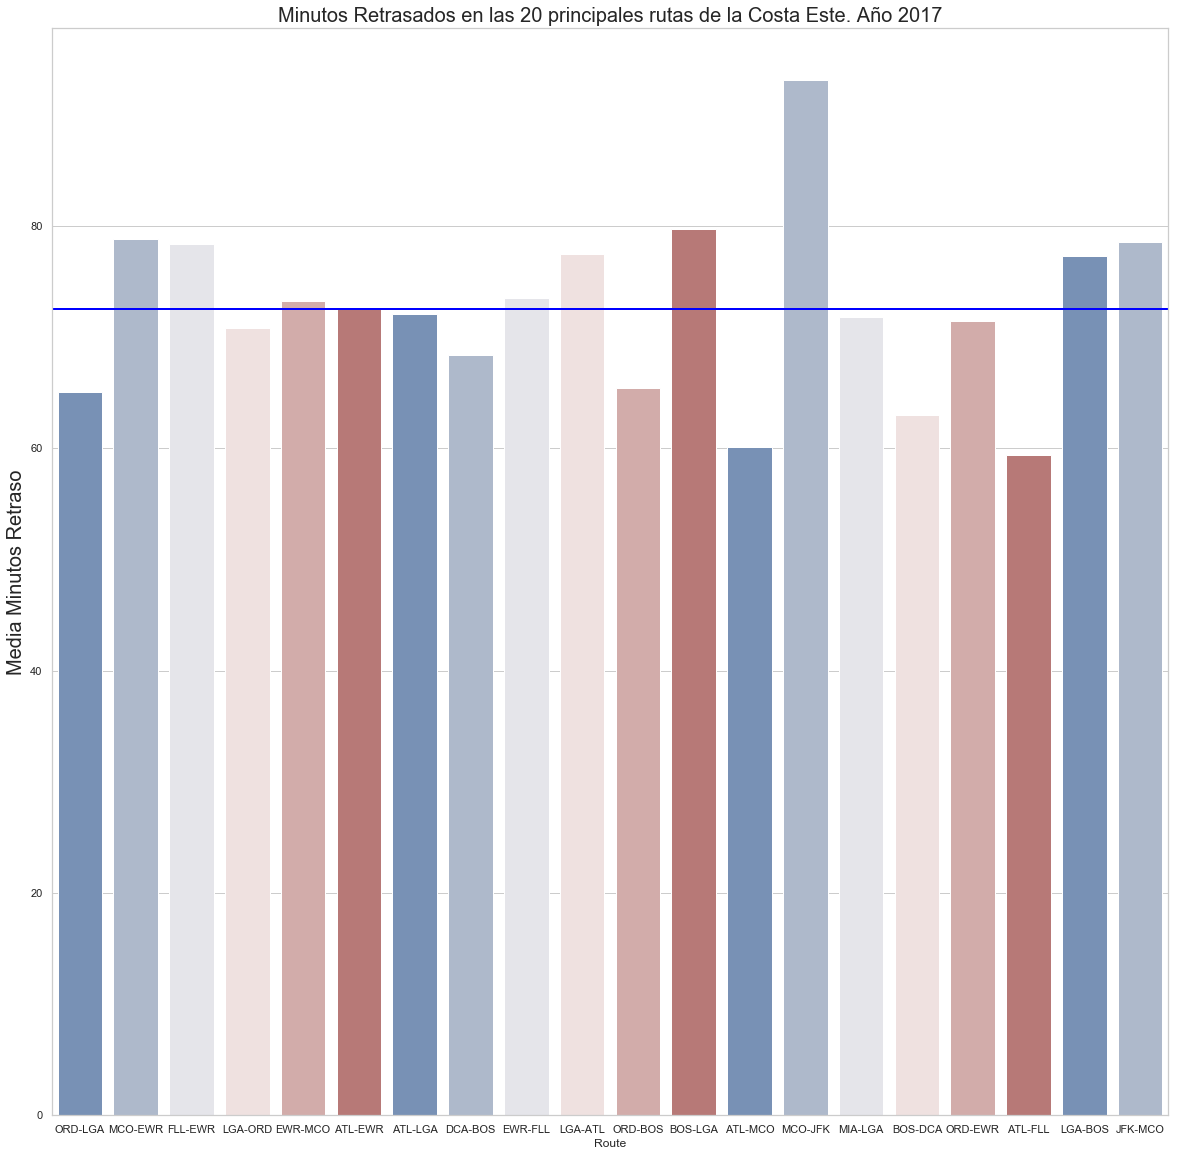

In [244]:
#retaso medio en destino  en las 20 principales rutas retrasadas de la costa Este

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=rutasVuelosTop20.index, y=rutasVuelosTop20['MediaRetrasoDestinoTotal'], palette=pal)

ax.set_ylabel("Media Minutos Retraso", fontsize=20)
ax.set_title('Minutos Retrasados en las 20 principales rutas de la Costa Este. Año ' + year, fontsize=20)

plt.axhline(rutasVuelosTop20['MediaRetrasoDestinoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

## 1.3.6 Cancelaciones de Vuelos

In [245]:
#Vuelos que se han cancelado
len(dfanual[dfanual['Cancelled'] == 1])

82693

In [246]:
vuelosCanceladosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMes = vuelosCanceladosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['Cancelled'] == 1)])}, ignore_index=True)


In [247]:
vuelosCanceladosPorMes

mes vuelos
0    1   8886
1    2   6312
2    3   8527
3    4   7398
4    5   4039
5    6   5379
6    7   5757
7    8  11007
8    9  15343
9   10   3303
10  11   1418
11  12   5324

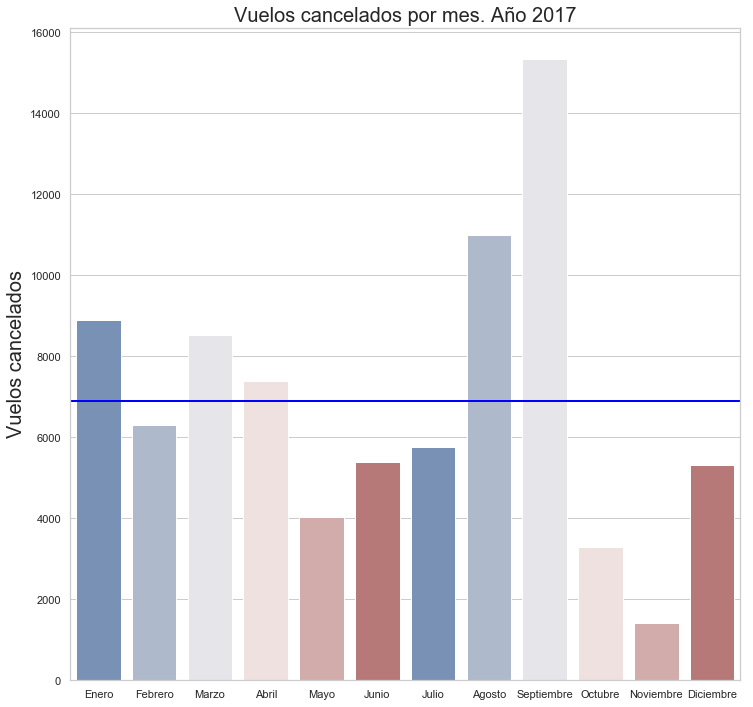

In [248]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por mes. Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [249]:
#comprobación de que tenemos o no códigos de cancelación asociados a los cancelados (entre 2001 y 2003 no tenemos)
#hay 65143
conCodigo = dfanual.CancellationCode.dropna()
len(conCodigo)

82693

Tenemos motivos de cancelación, así que vamos a estudiarlos

### 1.3.6.1 Cancelados por la Aerolínea

In [250]:
#cancelados por culpa de aerolínea
len(dfanual[dfanual['CancellationCode'] == 'A'])

18602

In [251]:
vuelosCanceladosPorAerolinea = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorAerolinea = vuelosCanceladosPorAerolinea.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'A')])}, ignore_index=True)


In [252]:
vuelosCanceladosPorAerolinea

mes vuelos
0    1   2105
1    2    744
2    3   1028
3    4   3563
4    5   1694
5    6   2019
6    7   1876
7    8   1914
8    9   1028
9   10    957
10  11    677
11  12    997

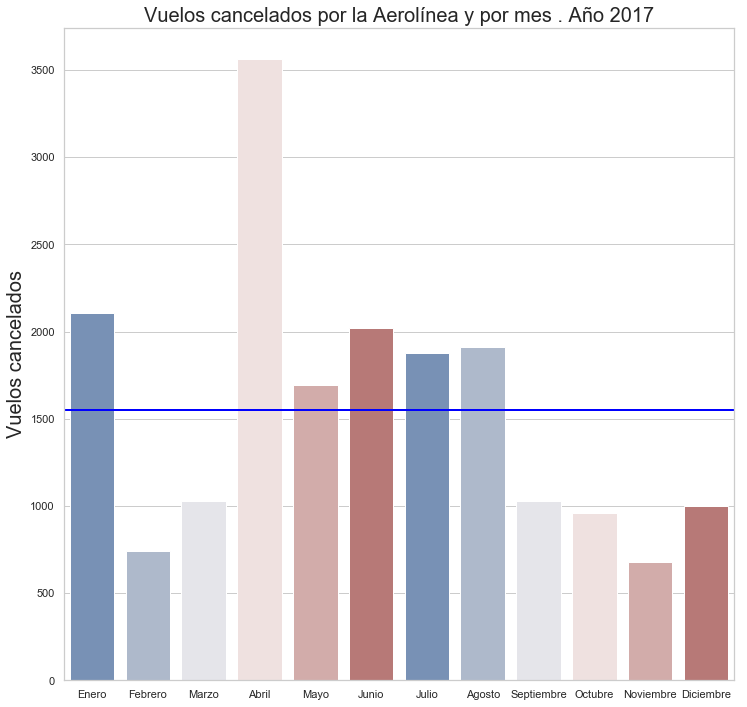

In [253]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorAerolinea['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Aerolínea y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorAerolinea['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.2 Cancelados por Meteorología

In [254]:
#cancelados por las condiciones meteorológicas
len(dfanual[dfanual['CancellationCode'] == 'B'])

48459

In [255]:
vuelosCanceladosPorMeteo = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMeteo = vuelosCanceladosPorMeteo.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'B')])}, ignore_index=True)


In [256]:
vuelosCanceladosPorMeteo

mes vuelos
0    1   5327
1    2   4701
2    3   6350
3    4   2720
4    5    877
5    6   2056
6    7   2208
7    8   7227
8    9  12372
9   10   1170
10  11    504
11  12   2947

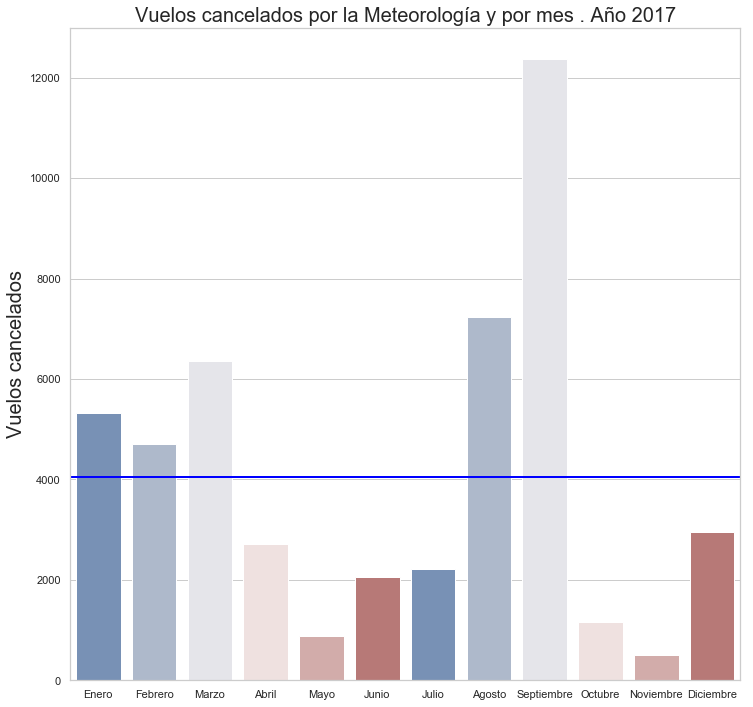

In [257]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMeteo['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Meteorología y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMeteo['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.3 Cancelados por Espacio Aéreo

In [258]:
#cancelados por el Espacio Aéreo
len(dfanual[dfanual['CancellationCode'] == 'C'])

15313

In [259]:
vuelosCanceladosPorNAS = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorNAS = vuelosCanceladosPorNAS.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'C')])}, ignore_index=True)


In [260]:
vuelosCanceladosPorNAS

mes vuelos
0    1   1167
1    2    867
2    3   1149
3    4   1115
4    5   1468
5    6   1301
6    7   1673
7    8   1866
8    9   1943
9   10   1176
10  11    208
11  12   1380

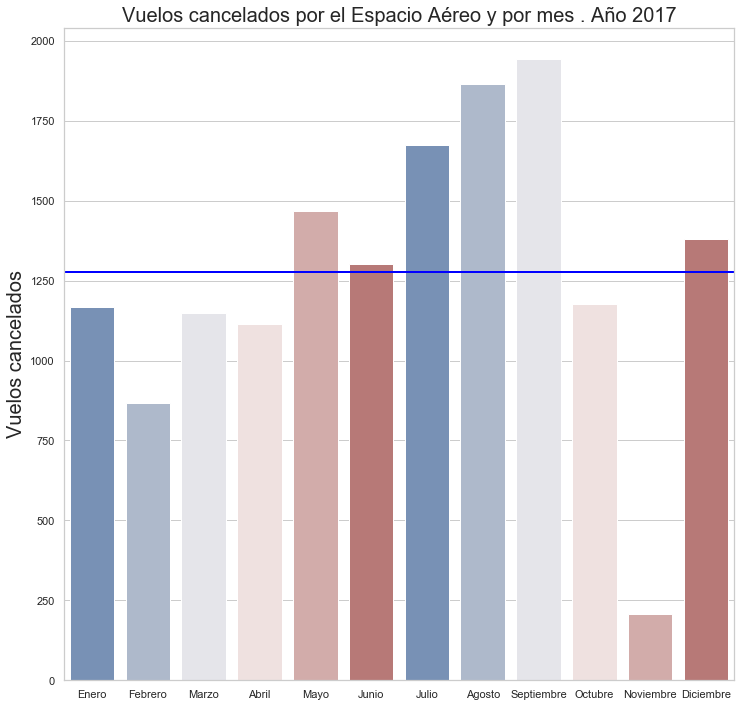

In [261]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorNAS['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por el Espacio Aéreo y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorNAS['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.4 Cancelación por motivos de Seguridad

In [262]:
#cancelados por Seguridad (física)
len(dfanual[dfanual['CancellationCode'] == 'D'])

319

In [263]:
vuelosCanceladosPorSeguridad = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorSeguridad = vuelosCanceladosPorSeguridad.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'D')])}, ignore_index=True)

In [264]:
vuelosCanceladosPorSeguridad

mes vuelos
0    1    287
1    2      0
2    3      0
3    4      0
4    5      0
5    6      3
6    7      0
7    8      0
8    9      0
9   10      0
10  11     29
11  12      0

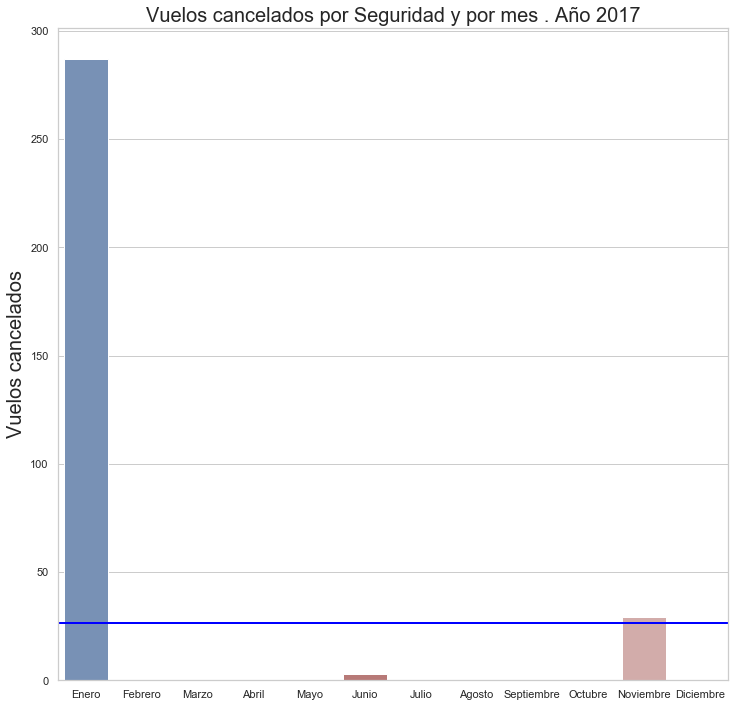

In [265]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorSeguridad['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por Seguridad y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.5 Cancelaciones distribuidas por aerolíneas

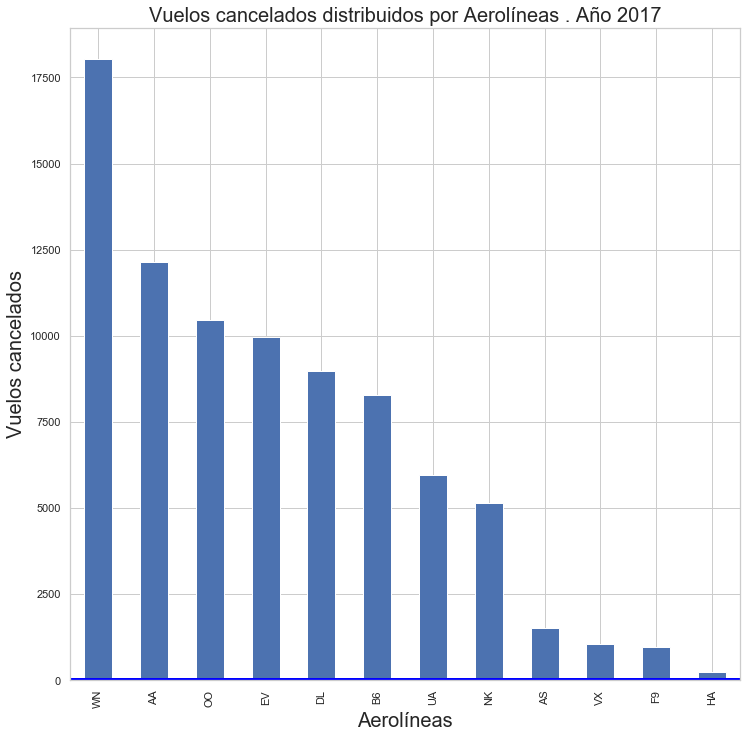

In [266]:
plt.figure(figsize=(12, 12))

ax = dfanual[dfanual['Cancelled'] == 1].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar')

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_xlabel("Aerolíneas", fontsize=20)
ax.set_title('Vuelos cancelados distribuidos por Aerolíneas . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

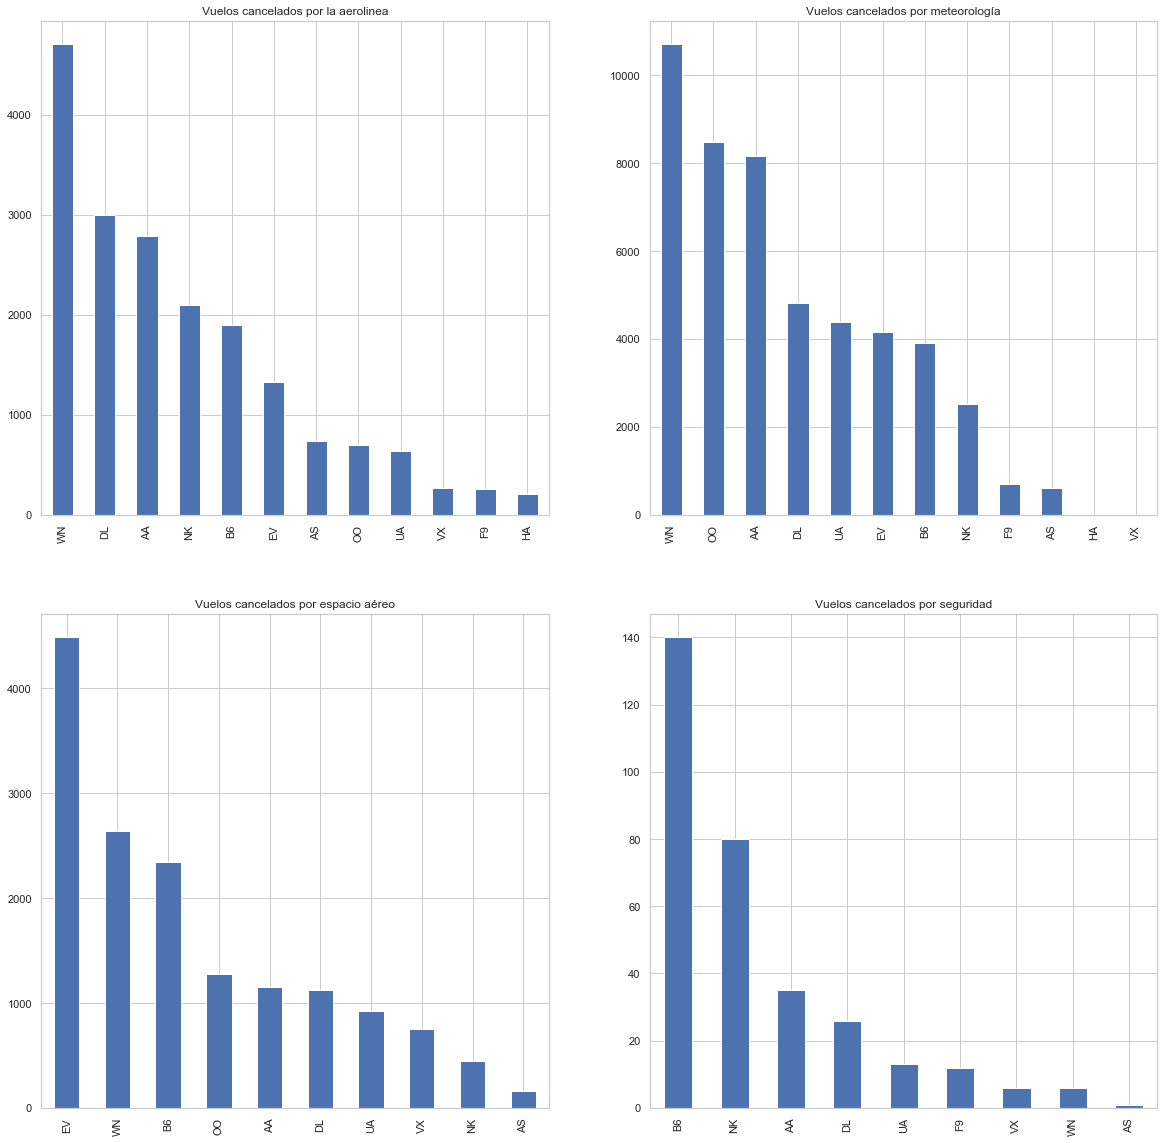

In [267]:
#Sacamos gráficos por compañía
plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
dfanual[dfanual['CancellationCode'] == 'A'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por la aerolinea')

plt.subplot(2,2,2)
dfanual[dfanual['CancellationCode'] == 'B'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por meteorología')

plt.subplot(2,2,3)
dfanual[dfanual['CancellationCode'] == 'C'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por espacio aéreo')

plt.subplot(2,2,4)
dfanual[dfanual['CancellationCode'] == 'D'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por seguridad')


### 1.3.6.6 Cancelaciones por Rutas

Mostramos aquellas rutas con más cancelaciones

#### 1.3.6.6.1 Vuelos cancelados por Ruta por la Aerolínea

In [268]:
rutasVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Route.value_counts(sort=True))

In [269]:
rutasVuelosCanceladosAerolinea.shape

(2878, 1)

In [270]:
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.rename(columns={'Route': 'VuelosCancelados'})

In [271]:
rutasVuelosCanceladosAerolinea.head(10)

VuelosCancelados
DAL-HOU               202
HOU-DAL               185
LAX-SFO               172
SFO-LAX               166
LAX-OAK               119
OAK-LAX               112
DCA-BOS               101
BUR-OAK                99
OAK-BUR                97
BOS-DCA                89

In [272]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.head(20)

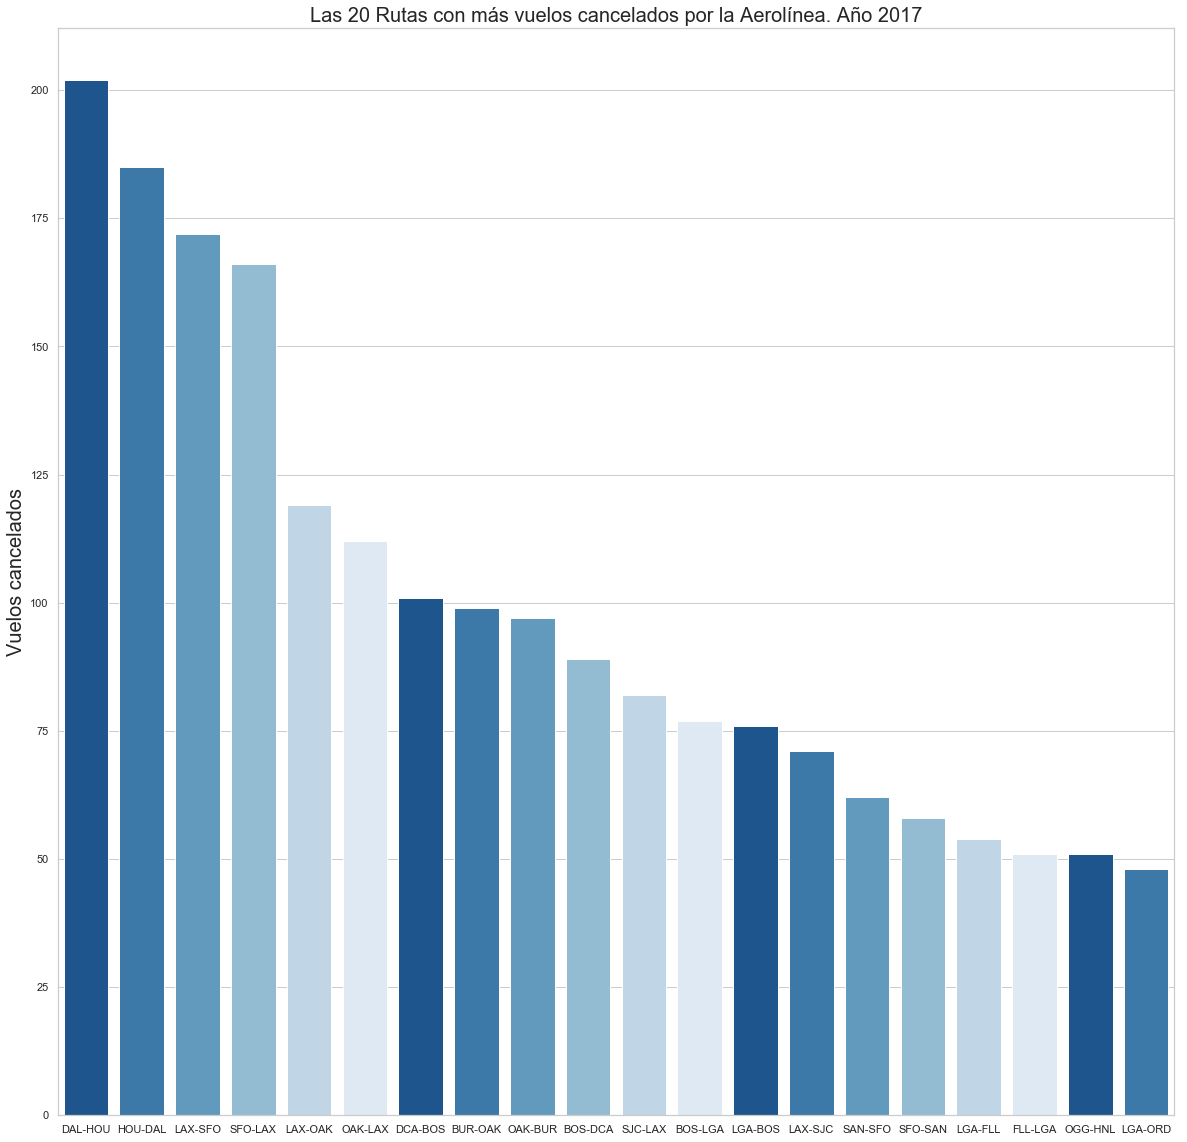

In [273]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=rutasVuelosCanceladosAerolinea.index, y=rutasVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.2 Vuelos cancelados por Ruta por la Meteorología

In [274]:
rutasVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Route.value_counts(sort=True))

In [275]:
rutasVuelosCanceladosMeteo.shape

(3556, 1)

In [276]:
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.rename(columns={'Route': 'VuelosCancelados'})

In [277]:
rutasVuelosCanceladosMeteo.head(10)

VuelosCancelados
HOU-DAL               205
DAL-HOU               195
MIA-LGA               165
LGA-MIA               164
LGA-ORD               155
ORD-LGA               146
EWR-FLL               142
FLL-EWR               141
EWR-MCO               130
MCO-EWR               127

In [278]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

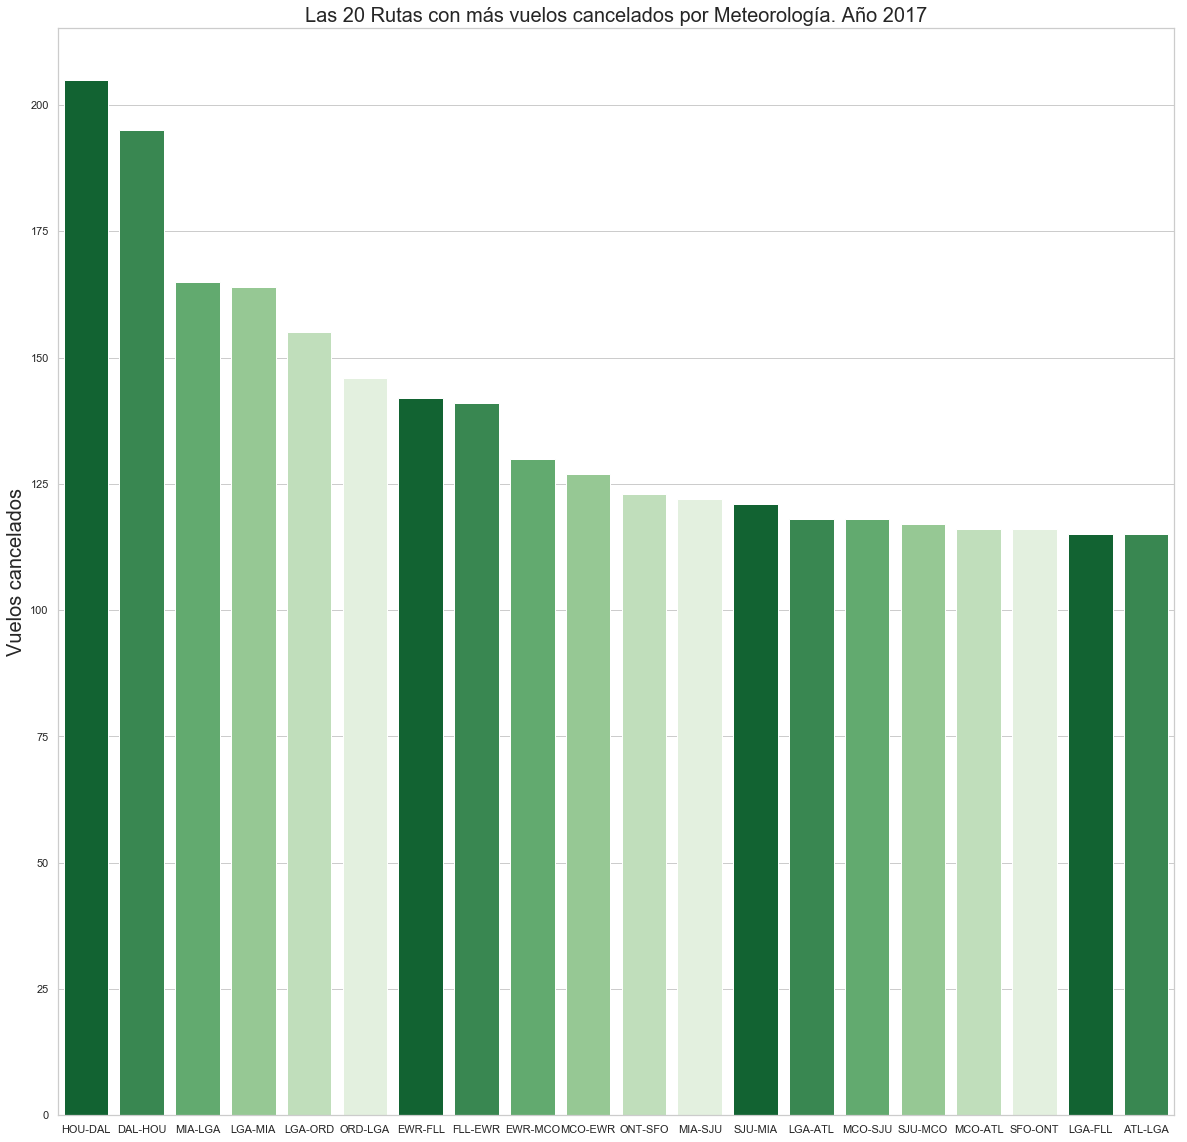

In [279]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

In [280]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

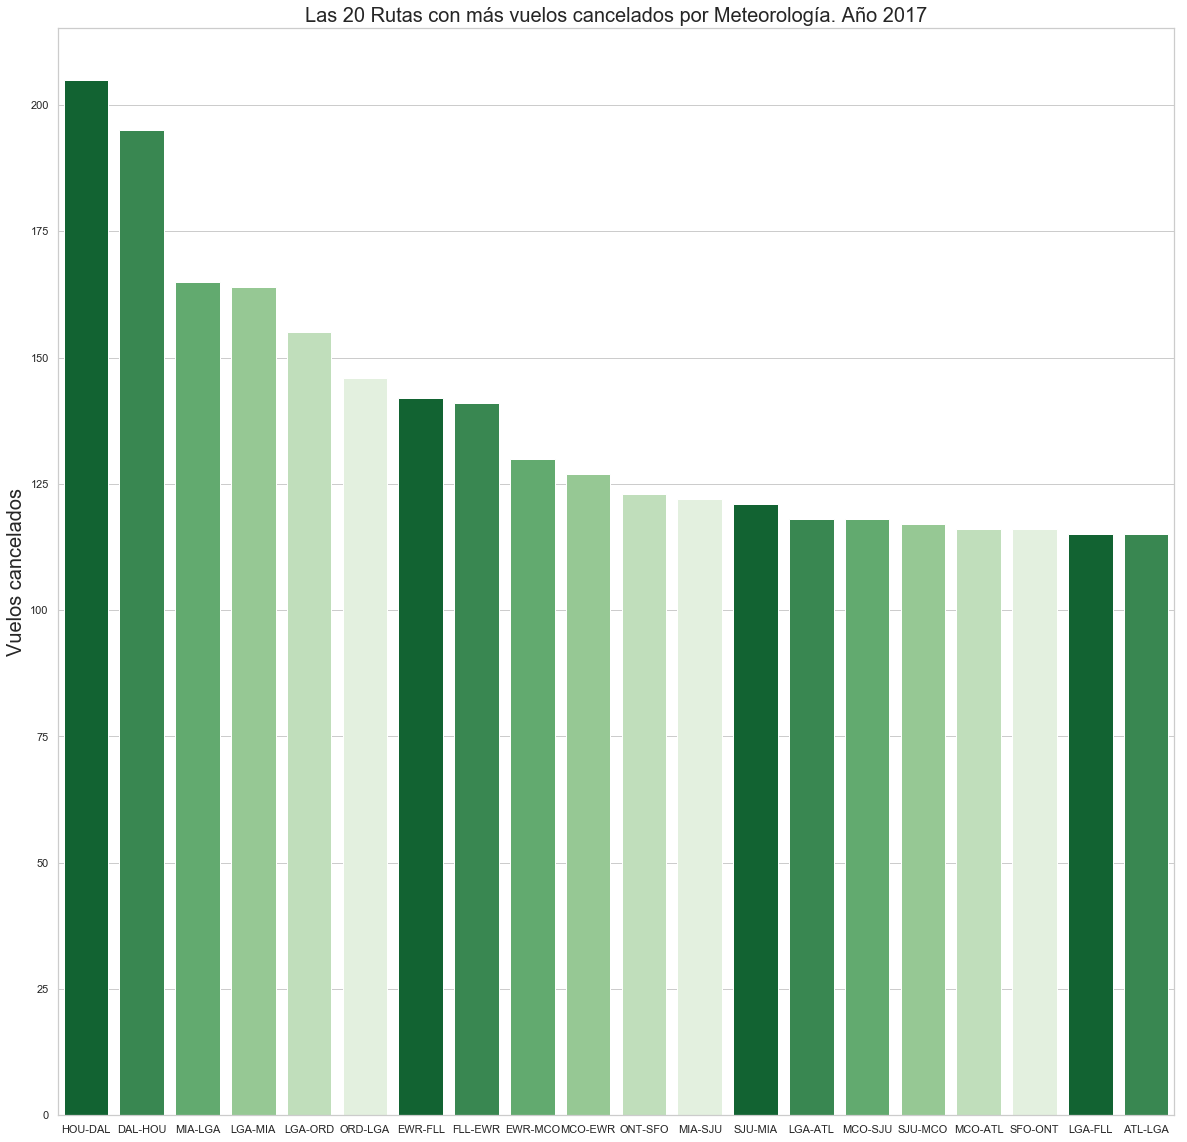

In [281]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.3 Vuelos cancelados por Ruta por la Espacio Aéreo

In [282]:
rutasVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Route.value_counts(sort=True))

In [283]:
rutasVuelosCanceladosNAS.shape

(1982, 1)

In [284]:
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosNAS.head(10)

VuelosCancelados
SFO-LAX               330
LAX-SFO               321
SAN-SFO               181
SFO-SAN               163
DCA-EWR               117
EWR-DCA               110
SFO-SEA               104
BOS-LGA               103
LGA-BOS               100
LGA-CLE                95

In [285]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.head(20)

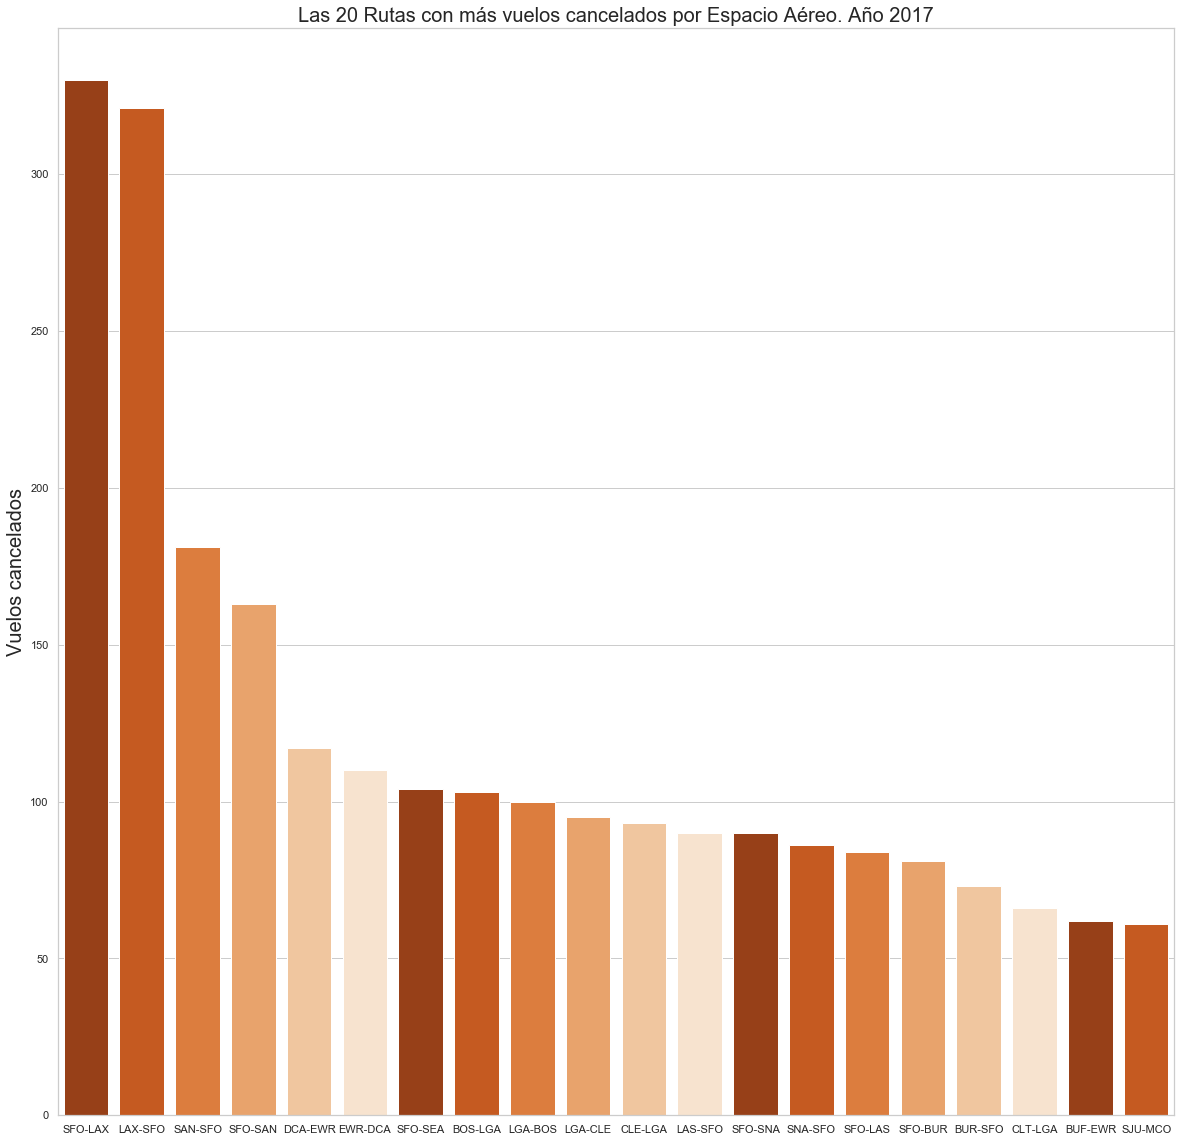

In [286]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=rutasVuelosCanceladosNAS.index, y=rutasVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.4 Vuelos cancelados por Ruta por Seguridad

In [287]:
rutasVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Route.value_counts(sort=True))

In [288]:
rutasVuelosCanceladosSeguridad.shape

(161, 1)

In [289]:
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosSeguridad.head(10)

VuelosCancelados
FLL-EWR                12
EWR-FLL                 9
FLL-LGA                 9
LGA-FLL                 8
DCA-FLL                 7
ATL-FLL                 7
FLL-DCA                 7
DTW-FLL                 6
FLL-JFK                 6
JFK-FLL                 6

In [290]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.head(20)

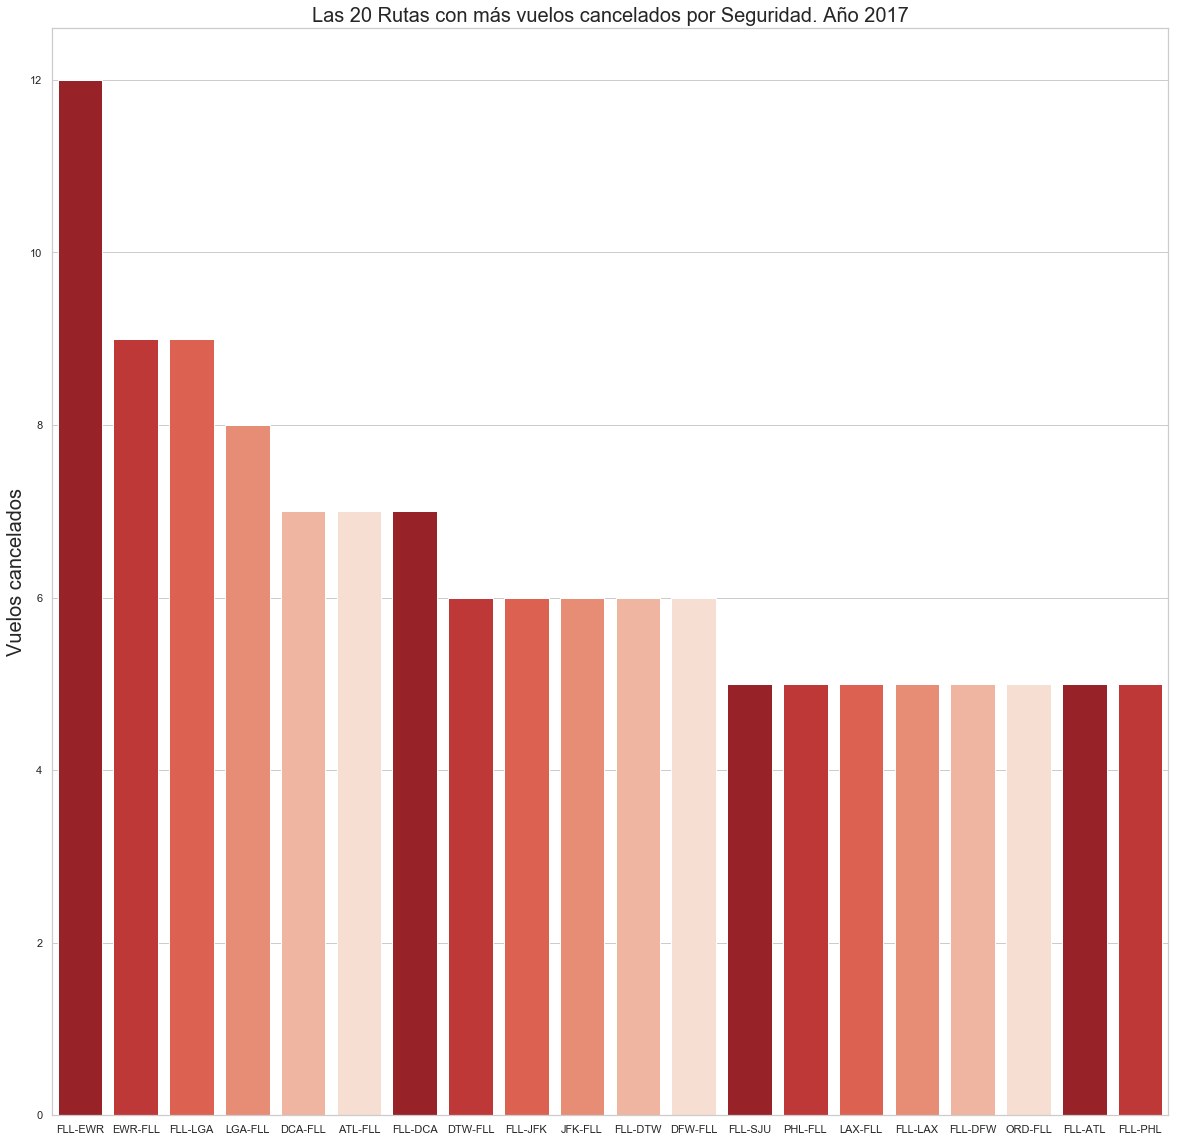

In [291]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=rutasVuelosCanceladosSeguridad.index, y=rutasVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

### 1.3.6.7 Cancelaciones por Aeropuertos

#### 1.3.6.7.1 Vuelos cancelados en aeropuertos por la Aerolínea

In [292]:
aeropuertosVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Origin.value_counts(sort=True))

In [293]:
aeropuertosVuelosCanceladosAerolinea.shape

(269, 1)

In [294]:
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosAerolinea.head(10)

VuelosCancelados
ATL              1408
LAX               810
DFW               645
LGA               587
BOS               573
ORD               555
LAS               554
SFO               551
FLL               524
MCO               506

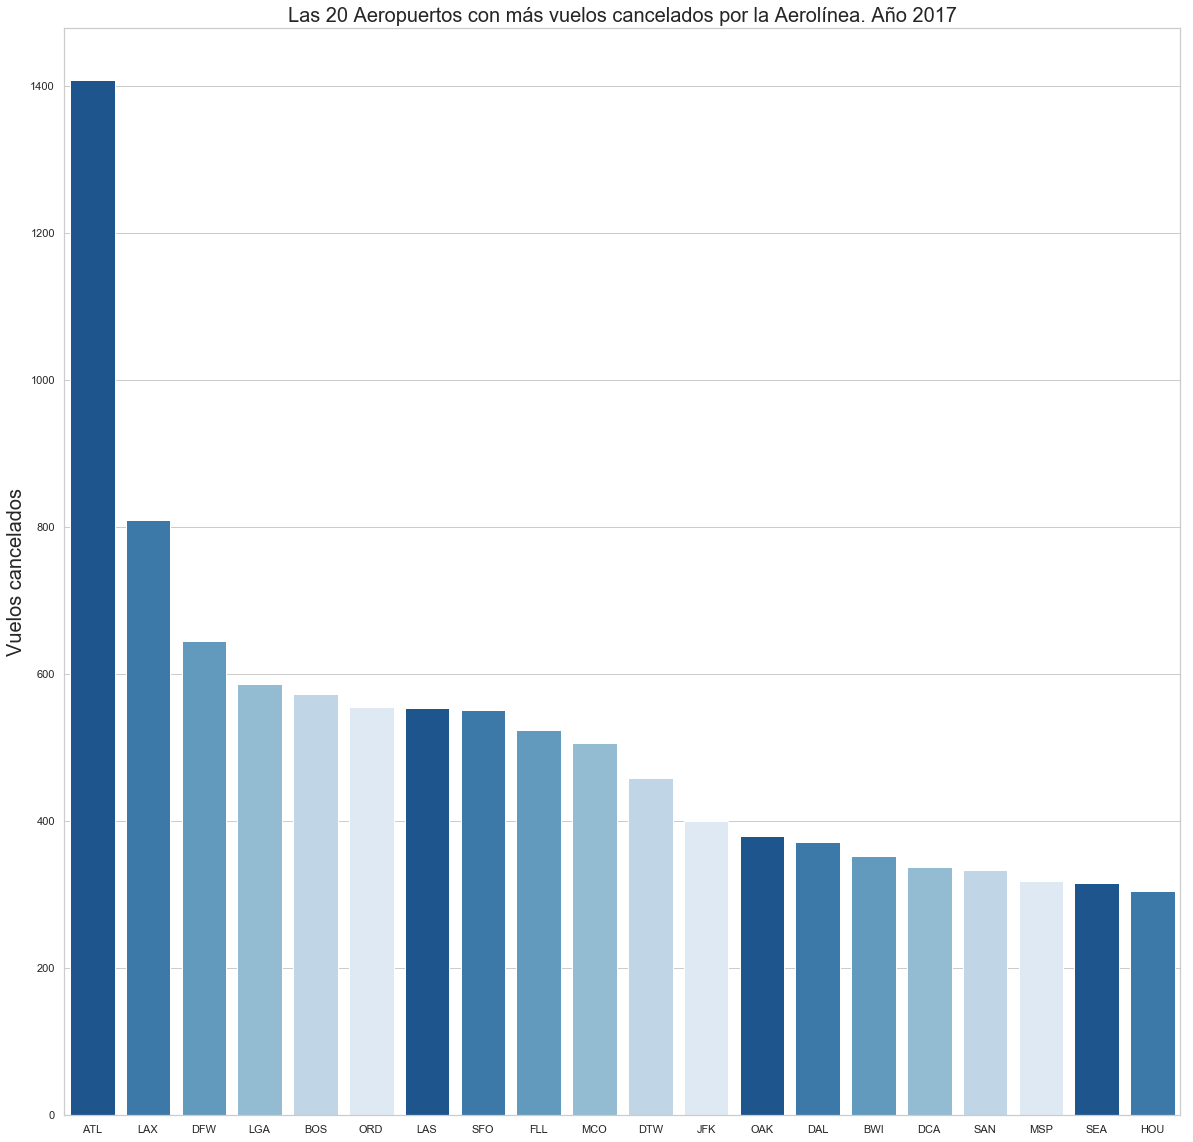

In [295]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosAerolinea.index, y=aeropuertosVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.2 Vuelos cancelados en aeropuertos por Meteorología

In [296]:
aeropuertosVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosMeteo.shape

(296, 1)

In [297]:
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosMeteo.head(10)

VuelosCancelados
ATL              3295
IAH              2637
ORD              2476
MCO              1824
BOS              1560
FLL              1523
LGA              1504
SFO              1492
HOU              1448
MIA              1432

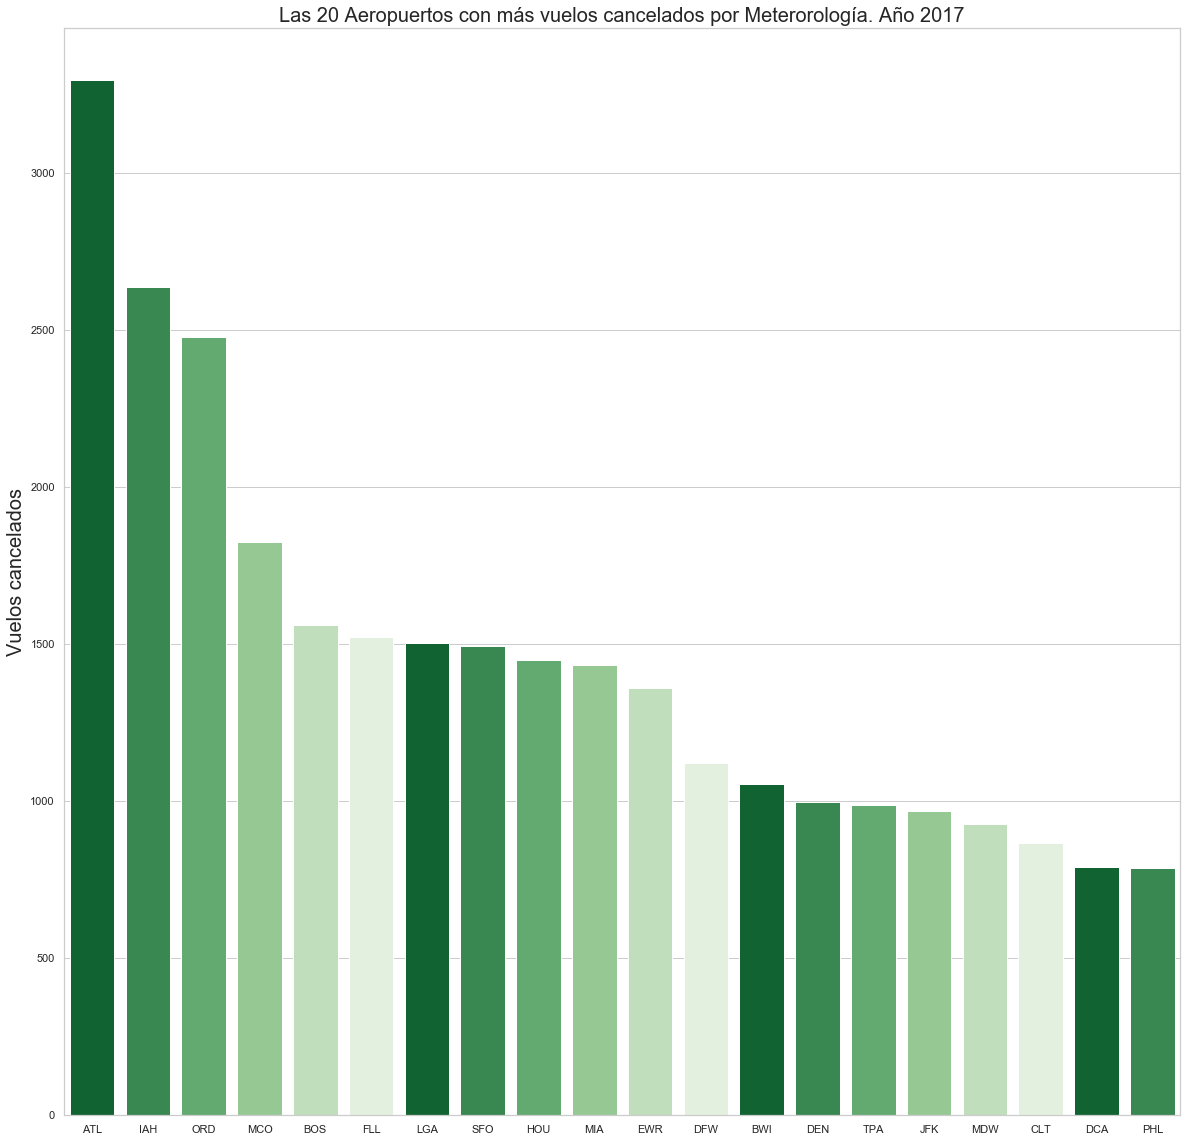

In [298]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosMeteo.index, y=aeropuertosVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Meterorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.3 Vuelos cancelados en aeropuertos por Espacio Aéreo

In [299]:
aeropuertosVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosNAS.shape

(232, 1)

In [300]:
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosNAS.head(10)

VuelosCancelados
EWR              1358
SFO              1252
LGA               918
ATL               707
JFK               699
IAH               695
ORD               682
LAX               584
BOS               525
DCA               352

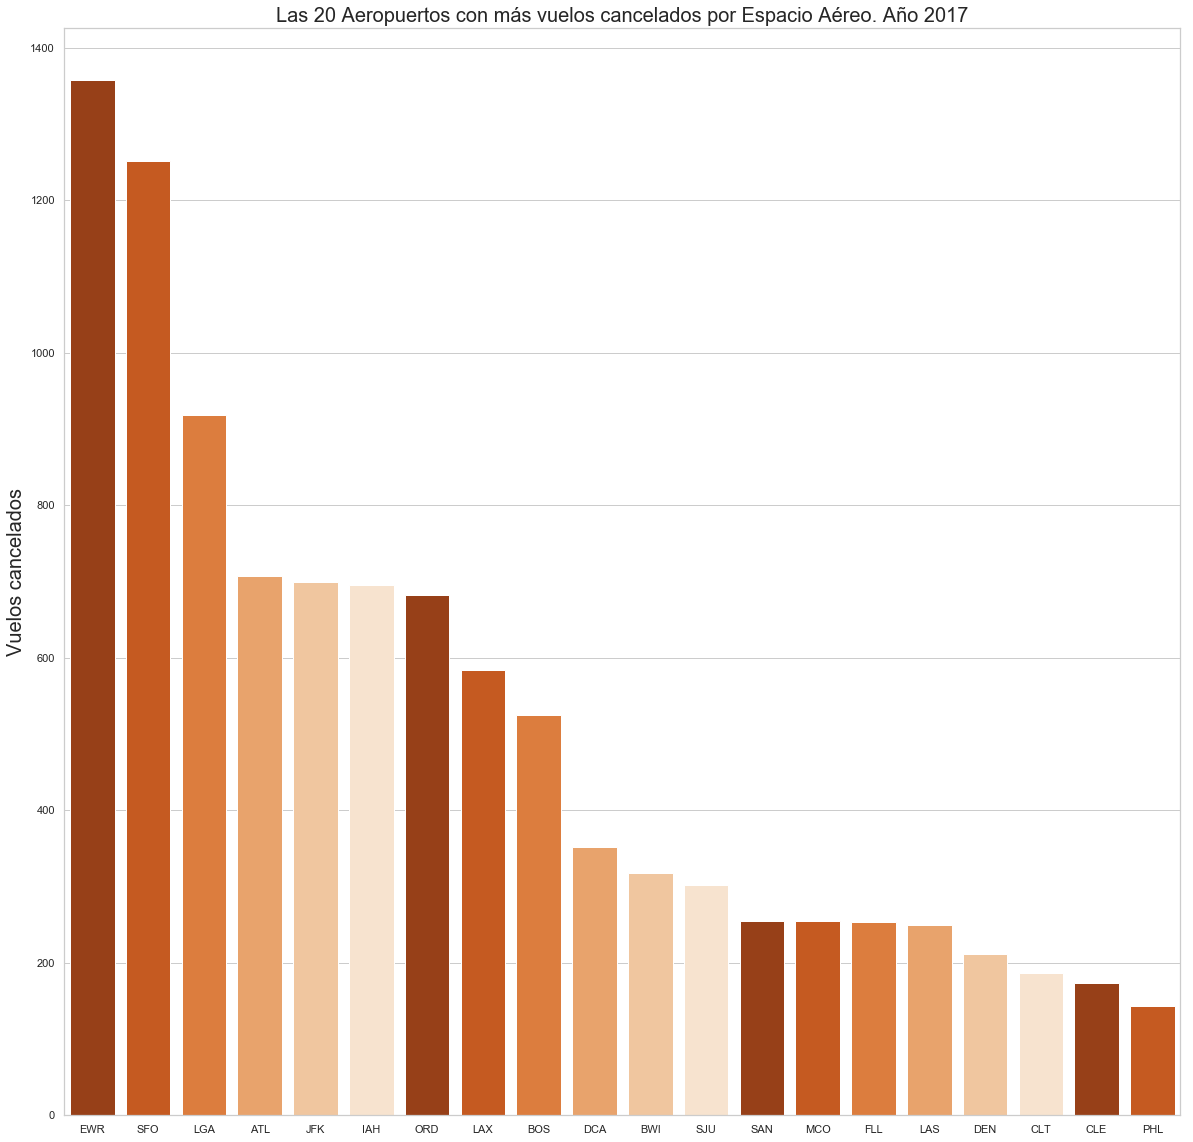

In [301]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosNAS.index, y=aeropuertosVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.4 Vuelos cancelados en aeropuertos por Seguridad

In [302]:
aeropuertosVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosSeguridad.shape

(56, 1)

In [303]:
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosSeguridad.head(10)

VuelosCancelados
FLL               128
MCO                21
EWR                13
LAX                10
ATL                 9
LGA                 9
DCA                 9
JFK                 8
PHL                 7
BOS                 7

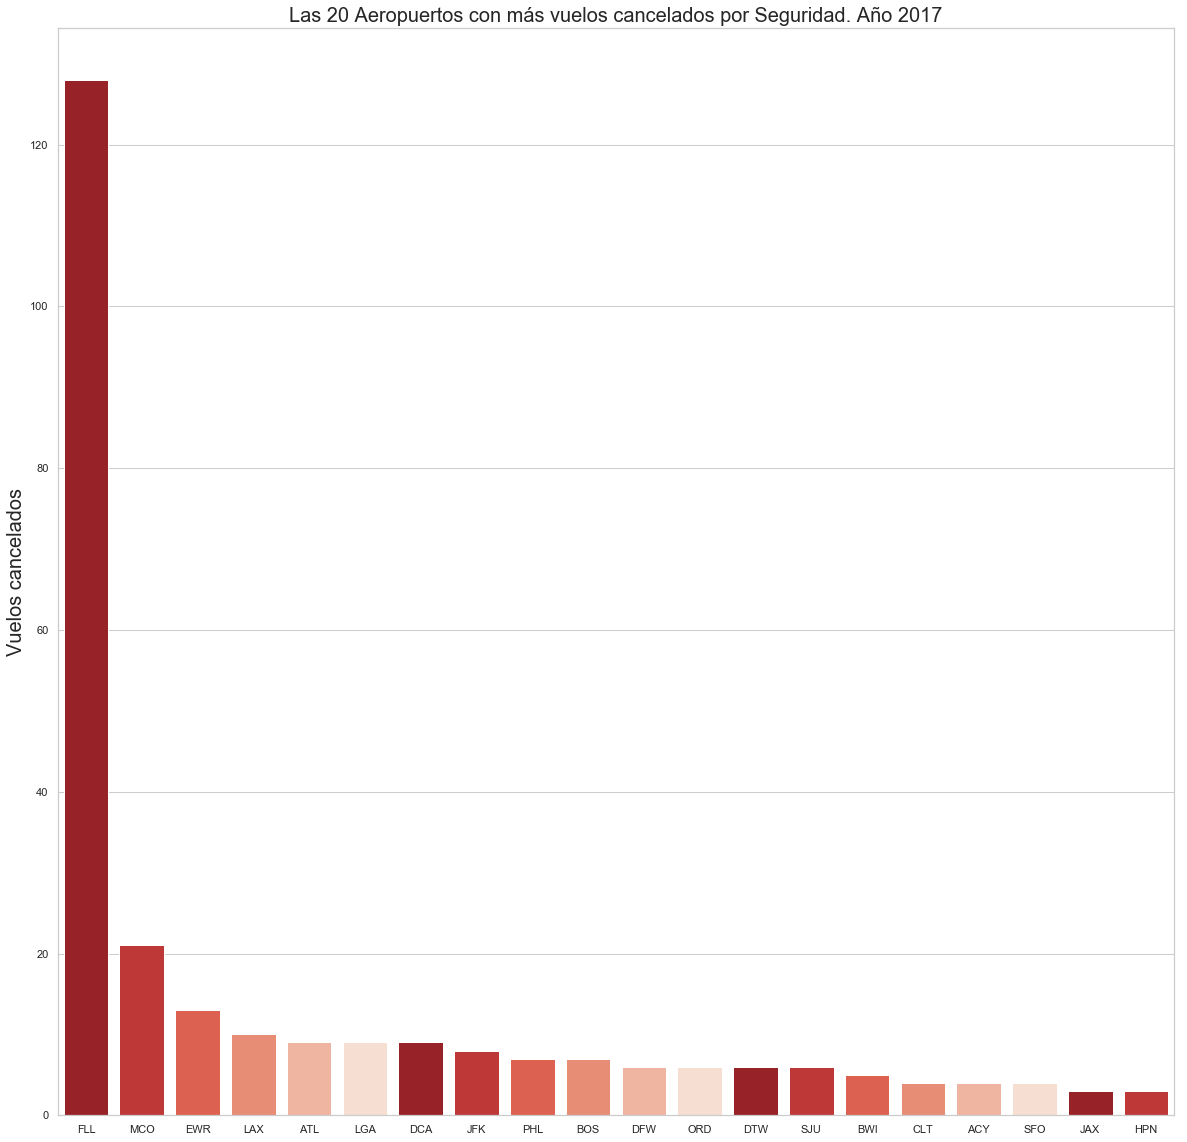

In [304]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosSeguridad.index, y=aeropuertosVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

## 2. Áreas geográficas
Vamos a ver cómo asignar áreas geográficos a los diferentes aeropuertos para identificar mejor en qué zona están y ver si merece la pena hacer un modelo de predicción /clasificación por zonas geográficas.
Para ello tenemos los Estados en los que se ubica cada aeropuerto, indicado en el campo "OriginState", por lo que hemos hecho un csv mapeando los Estados con zonas geográficas que hemos estimado inicialmente, en función tanto de la geografía, como del posible clima.
1. Por geografía: dividimos el país en 4 partes: Este, Central y Oeste(incluye Hawai).
2. Por clima: a las 3 divisiones del contiennte, los subdividimos en Norte y Sur, ya que seria razonable pensar que  en cada una de estas 3 divisiones el clima varía bastante, a lo largo del año, entre norte y sur.

In [305]:
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv("/Users/moncholv/Documents/Proyecto AIr/datasets/geo/" + 'ZonasEstados.csv', delimiter=';')

In [306]:
zonaEstados.head(5)

State GeoCluster
0    AL         ES
1    AK         WN
2    AZ         WS
3    AR         CS
4    CA         WS

In [307]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [308]:
#hacemos el join por el Estado Origen del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='OriginState', how='inner')

In [309]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='DestState', how='inner')

In [310]:
#comprobamos
dfanual[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          NY        EN        CA      WS
1          NY        EN        CA      WS
2          NY        EN        CA      WS
3          NY        EN        CA      WS
4          NY        EN        CA      WS

Revisemos por las zonas geográficas, algunos de los datos principales de retrasos, cancelaciones y número de vuelos totales, para comprobar si estamos en lo cierto con respecto a la intuición de los datos por aeropuertos y rutas que hemos visto en el apartado 1.3

In [311]:
#primero contamos todos los retrasos por Zonas de Origen del vuelo
retrasosSalidaPorZonasOrigen = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1].OriginGeo.value_counts(sort=True))

In [312]:
retrasosSalidaPorZonasOrigen = retrasosSalidaPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosRetrasados'})
retrasosSalidaPorZonasOrigen

VuelosRetrasados
EN            322983
WS            230087
ES            226776
CS            167422
CN             46865
WN             17815

In [313]:
#vuelos totales por zona
vuelosTotalesPorZonasOrigen = pd.DataFrame(dfanual.OriginGeo.value_counts(sort=True))

In [314]:
vuelosTotalesPorZonasOrigen = vuelosTotalesPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosTotales'})
vuelosTotalesPorZonasOrigen

VuelosTotales
EN        1775425
ES        1280164
WS        1201759
CS         943411
CN         329370
WN         133018

In [315]:
#los unimos
#hacemos el join por el Estado Destino del vuelo
datosZonasOrigen = pd.merge(vuelosTotalesPorZonasOrigen, retrasosSalidaPorZonasOrigen, left_index=True, right_index=True)

In [316]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados
EN        1775425            322983
ES        1280164            226776
WS        1201759            230087
CS         943411            167422
CN         329370             46865
WN         133018             17815

In [317]:
#retrasos en Zona Origen por culpa de la llegada tarde del vuelo anterior
#sacamos las medias de retrasos por llegada tarde del vuelo anterior
retrasosSalidasteAircraftPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

In [318]:
retrasosSalidasteAircraftPorGeo = pd.DataFrame(retrasosSalidasteAircraftPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasteAircraftPorGeo = retrasosSalidasteAircraftPorGeo.rename(columns={'OriginGeo': 'VuelosLateArrival', 'DepDelay': 'MediaLateArrival'})

In [319]:
retrasosSalidasteAircraftPorGeo

VuelosLateArrival  MediaLateArrival
OriginGeo                                     
CN                     12648         77.171173
CS                     41002         70.726135
EN                     77752         79.486354
ES                     49321         77.355629
WN                      5528         71.257959
WS                     65036         66.702042

In [320]:
#retrasos en Zona Origen por culpa de la Aerolínea
#sacamos las medias
retrasosSalidasAerolineaPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['LateAircraftDelay'] == 0) & (dfanual['CarrierDelay'] > 0)])
retrasosSalidasAerolineaPorGeo = pd.DataFrame(retrasosSalidasAerolineaPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasAerolineaPorGeo = retrasosSalidasAerolineaPorGeo.rename(columns={'OriginGeo': 'VuelosAerolinea', 'DepDelay': 'MediaAerolinea'})

In [321]:
retrasosSalidasAerolineaPorGeo

VuelosAerolinea  MediaAerolinea
OriginGeo                                 
CN                    9397      103.957220
CS                   33850       72.945672
EN                   67502       83.670395
ES                   48401       79.582240
WN                    3381       89.519373
WS                   35502       74.587770

In [322]:
#vuelos totales cancelados por Zona Origen
vuelosCanceladosPorGeo = pd.DataFrame(dfanual[(dfanual['Cancelled'] == 1)])
vuelosCanceladosPorGeo = pd.DataFrame(vuelosCanceladosPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosPorGeo = vuelosCanceladosPorGeo.rename(columns={'OriginGeo': 'VuelosCancelados'})

In [323]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     2892
CS                    13508
EN                    30085
ES                    21516
WN                     1470
WS                    12619

In [324]:
#vuelos cancelados por Meteo Zona Origen
vuelosCanceladosMeteoPorGeo = pd.DataFrame(dfanual[(dfanual['CancellationCode'] == 'B')])
vuelosCanceladosMeteoPorGeo = pd.DataFrame(vuelosCanceladosMeteoPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosMeteoPorGeo = vuelosCanceladosMeteoPorGeo.rename(columns={'OriginGeo': 'VuelosCanceladosMeteo'})

In [325]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     2892
CS                    13508
EN                    30085
ES                    21516
WN                     1470
WS                    12619

In [326]:
# terminamos de fusionar todos los datasets
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasteAircraftPorGeo, left_index=True, right_index=True)

In [327]:
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasAerolineaPorGeo, left_index=True, right_index=True)

In [328]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosPorGeo, left_index=True, right_index=True)

In [329]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosMeteoPorGeo, left_index=True, right_index=True)

In [330]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        1775425            322983              77752         79.486354   
ES        1280164            226776              49321         77.355629   
WS        1201759            230087              65036         66.702042   
CS         943411            167422              41002         70.726135   
CN         329370             46865              12648         77.171173   
WN         133018             17815               5528         71.257959   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  
EN            67502       83.670395             30085                  16863  
ES            48401       79.582240             21516                  13948  
WS            35502       74.587770             12619                   5356  
CS            33850       72.945672             13508                   9150  
CN             9397      103.957220              2892                   1748  
WN             3381       89.519373              1470                    931

In [331]:
#por último sacamos porcentajes sobre los vuelos totales, para conocer la proporción real
datosZonasOrigen['PctVuelosRetrasados'] = (datosZonasOrigen['VuelosRetrasados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosLateArrival'] = (datosZonasOrigen['VuelosLateArrival'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosAerolinea'] = (datosZonasOrigen['VuelosAerolinea'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCancelados'] = (datosZonasOrigen['VuelosCancelados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCanceladosMeteo'] = (datosZonasOrigen['VuelosCanceladosMeteo'] / datosZonasOrigen['VuelosTotales'])*100


In [332]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        1775425            322983              77752         79.486354   
ES        1280164            226776              49321         77.355629   
WS        1201759            230087              65036         66.702042   
CS         943411            167422              41002         70.726135   
CN         329370             46865              12648         77.171173   
WN         133018             17815               5528         71.257959   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  \
EN            67502       83.670395             30085                  16863   
ES            48401       79.582240             21516                  13948   
WS            35502       74.587770             12619                   5356   
CS            33850       72.945672             13508                   9150   
CN             9397      103.957220              2892                   1748   
WN             3381       89.519373              1470                    931   

    PctVuelosRetrasados  PctVuelosLateArrival  PctVuelosAerolinea  \
EN            18.191870              4.379346            3.802019   
ES            17.714605              3.852709            3.780844   
WS            19.145852              5.411734            2.954170   
CS            17.746454              4.346144            3.588044   
CN            14.228679              3.840058            2.853022   
WN            13.392924              4.155829            2.541761   

    PctVuelosCancelados  PctVuelosCanceladosMeteo  
EN             1.694524                  0.949801  
ES             1.680722                  1.089548  
WS             1.050044                  0.445680  
CS             1.431826                  0.969885  
CN             0.878040                  0.530710  
WN             1.105114                  0.699905

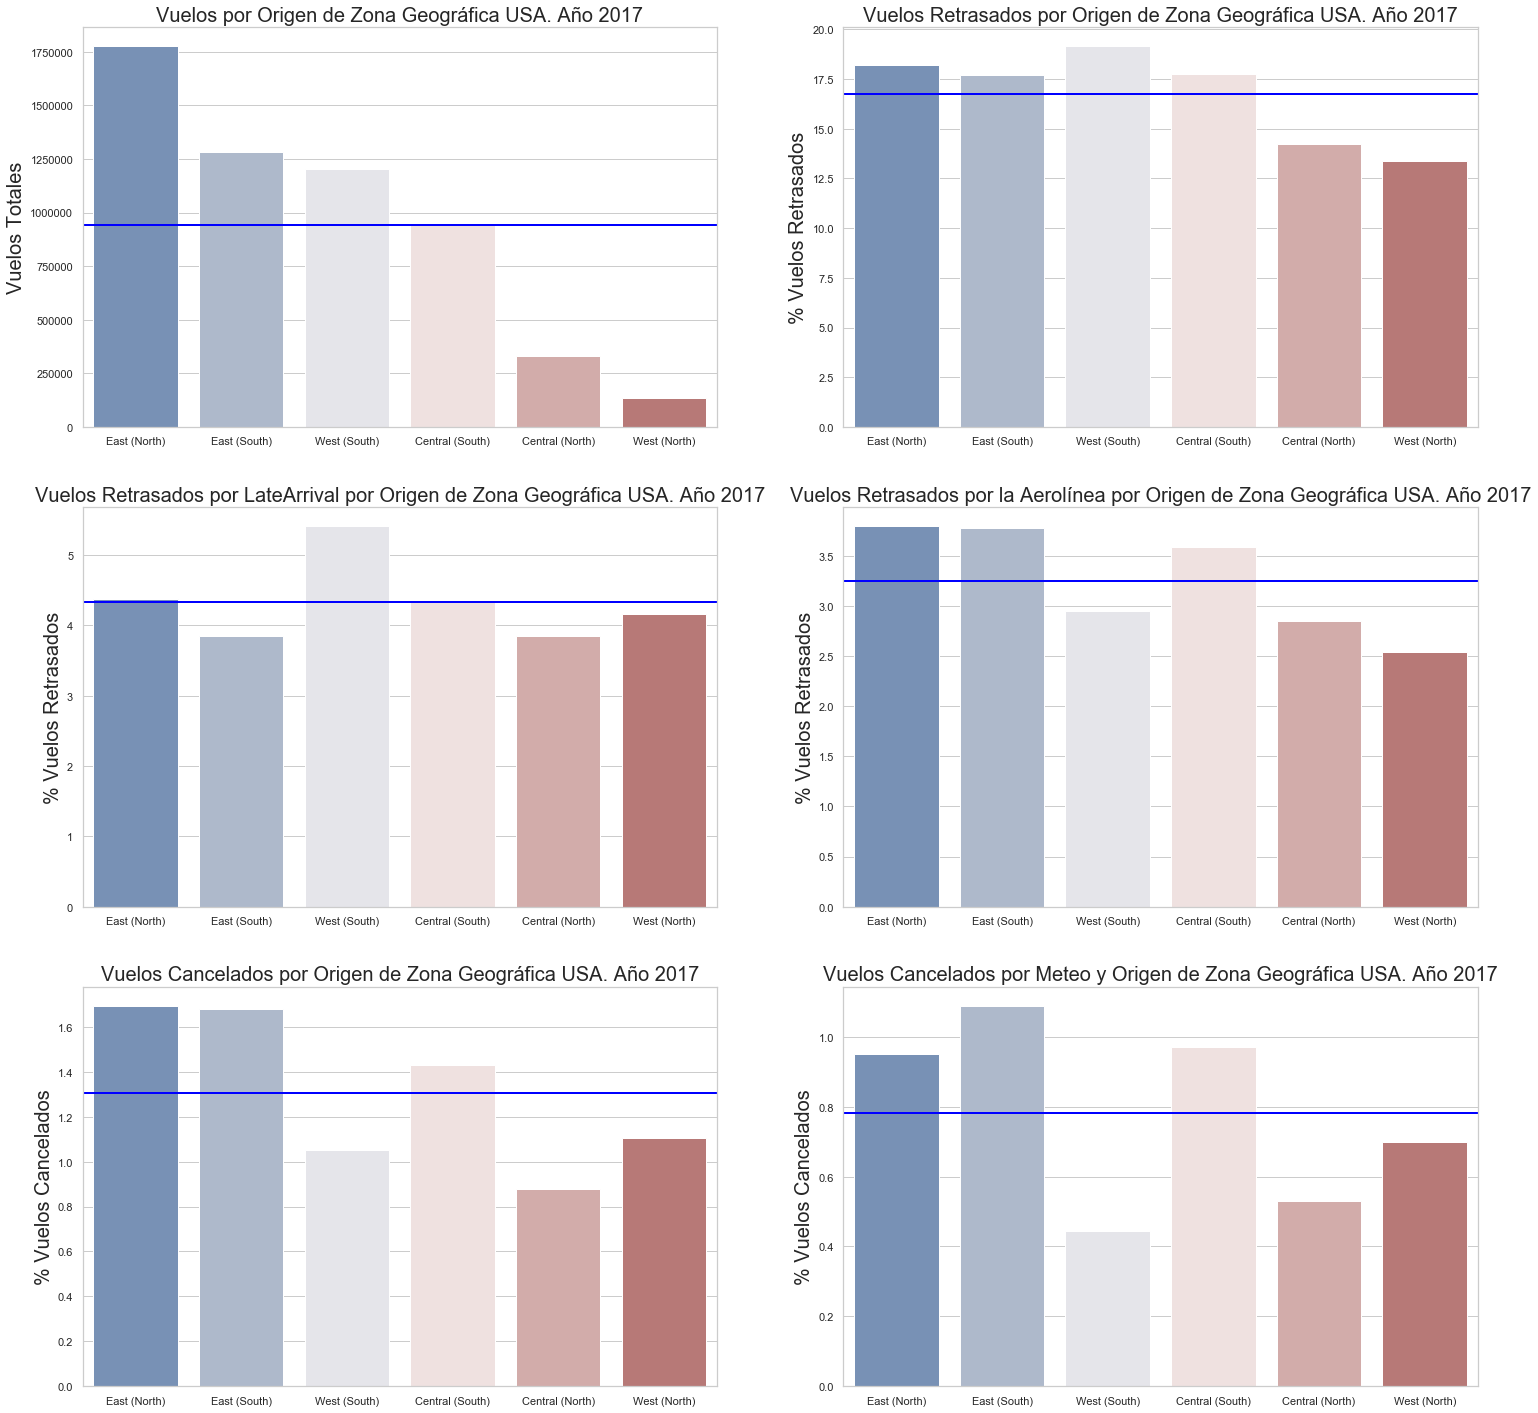

In [333]:
#a pintar

my_xticks=['East (North)', 'East (South)', 'West (South)', 'Central (South)', 'Central (North)', 'West (North)']

#Sacamos gráficos
plt.figure(figsize=(25, 25))

#Vuelos por Origen de Zona Geográfica USA
plt.subplot(3,2,1)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['VuelosTotales'], palette=pal)

ax.set_ylabel("Vuelos Totales", fontsize=20)
ax.set_title('Vuelos por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['VuelosTotales'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por Origen de Zona Geográfica USA
plt.subplot(3,2,2)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosRetrasados'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosRetrasados'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA
plt.subplot(3,2,3)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosLateArrival'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosLateArrival'].mean(), color='Blue', linewidth=2)


#uelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA
plt.subplot(3,2,4)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosAerolinea'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosAerolinea'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Origen de Zona Geográfica USA
plt.subplot(3,2,5)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCancelados'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCancelados'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Meteo y por Origen de Zona Geográfica USA
plt.subplot(3,2,6)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCanceladosMeteo'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Meteo y Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCanceladosMeteo'].mean(), color='Blue', linewidth=2)


plt.show()

1. Se ve claramente que la cantidad de vuelos del Este de USA es muy superior al del Oeste y Centro del país.
2. En cuanto a retrasos, porcentualmente destacan, un poco por encima el Este y el Centro Sur, y en el caso de retrasos por la aerolínea es similar.
3. En cuanto a vuelos cancelados, claramente el Este y el Centro sobresalen, el resto está por de debajo de la media, y parece que el factor meteo es uno de los clave, dado que las zonas de huracanes, tornados y heladas, prevalecen en el Este y Centro Sur de USA. En el Oeste Norte, está también encuadrado Alaska y el estado de Washington, por lo que también destaca. La mejor zona del pais en cuanto a cancelaciones por meteo es claramente la Costa Oeste Sur del país, California, Nevada y Arizona.